In [30]:
from glob import glob 
import numpy as np
import pandas as pd
import keras,cv2,os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint
from tqdm import tqdm_notebook,trange
import matplotlib.pyplot as plt
import gc
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

In [31]:
#map images and labels
path = "Z:/DSBA/DL/Project/" 
train_path = path + 'train/'
df = pd.DataFrame({'path': glob(os.path.join(train_path,'*.tif'))})
#print(df)
df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0]) 
#print(df)
labels = pd.read_csv(path+"train_labels.csv") 
df = df.merge(labels, on = "id") 
print(df) 

                                                     path  \
0       Z:/DSBA/DL/Project/train\00001b2b5609af42ab0ab...   
1       Z:/DSBA/DL/Project/train\000020de2aa6193f4c160...   
2       Z:/DSBA/DL/Project/train\00004aab08381d25d3153...   
3       Z:/DSBA/DL/Project/train\0000d563d5cfafc4e68ac...   
4       Z:/DSBA/DL/Project/train\0000da768d06b879e5754...   
...                                                   ...   
220020  Z:/DSBA/DL/Project/train\fffe6c73afcf5f5da5818...   
220021  Z:/DSBA/DL/Project/train\fffeb3f5361ea57e728fb...   
220022  Z:/DSBA/DL/Project/train\fffeca85b16452a7709d1...   
220023  Z:/DSBA/DL/Project/train\fffeeb1297fd4e26f247a...   
220024  Z:/DSBA/DL/Project/train\ffffe55093358954f38bb...   

                                              id  label  
0       00001b2b5609af42ab0ab276dd4cd41c3e7745b5      1  
1       000020de2aa6193f4c160e398a8edea95b1da598      0  
2       00004aab08381d25d315384d646f5ce413ea24b1      0  
3       0000d563d5cfafc4e68acb7c982

In [32]:
#function to load images and labels
def load_data(N,df):
    X = np.zeros([N,96,96,3],dtype=np.uint8) 
    y = np.squeeze(df.as_matrix(columns=['label']))[0:N]
    for i, row in tqdm_notebook(df.iterrows(), total=N):
        print(row)
        if i == N:
            break
        X[i] = cv2.imread(row['path'])
          
    return X,y

In [33]:
N=10564
X,y = load_data(N=N,df=df) 

C:\Users\Sabhahit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


path     Z:/DSBA/DL/Project/train\00001b2b5609af42ab0ab...
id                00001b2b5609af42ab0ab276dd4cd41c3e7745b5
label                                                    1
Name: 0, dtype: object
path     Z:/DSBA/DL/Project/train\000020de2aa6193f4c160...
id                000020de2aa6193f4c160e398a8edea95b1da598
label                                                    0
Name: 1, dtype: object
path     Z:/DSBA/DL/Project/train\00004aab08381d25d3153...
id                00004aab08381d25d315384d646f5ce413ea24b1
label                                                    0
Name: 2, dtype: object
path     Z:/DSBA/DL/Project/train\0000d563d5cfafc4e68ac...
id                0000d563d5cfafc4e68acb7c9829258a298d9b6a
label                                                    0
Name: 3, dtype: object
path     Z:/DSBA/DL/Project/train\0000da768d06b879e5754...
id                0000da768d06b879e5754c43e2298ce48726f722
label                                                    1
Name: 4, dtype: object


Name: 40, dtype: object
path     Z:/DSBA/DL/Project/train\0009577b1a52f1136188d...
id                0009577b1a52f1136188d679127ca813f938106c
label                                                    0
Name: 41, dtype: object
path     Z:/DSBA/DL/Project/train\000967aaca227fa0f6af2...
id                000967aaca227fa0f6af20dd1e2f3484fbe1f8e5
label                                                    1
Name: 42, dtype: object
path     Z:/DSBA/DL/Project/train\0009b2a2a66f229272509...
id                0009b2a2a66f2292725096e3ad11c4774f697413
label                                                    0
Name: 43, dtype: object
path     Z:/DSBA/DL/Project/train\0009f3c387f65eae948ec...
id                0009f3c387f65eae948ec4dce88b2951deb4a7b4
label                                                    0
Name: 44, dtype: object
path     Z:/DSBA/DL/Project/train\000a2a35668f04edebc0b...
id                000a2a35668f04edebc0b06d5d133ad90c93a044
label                                                 

Name: 81, dtype: object
path     Z:/DSBA/DL/Project/train\00149645bae4ec1c2450e...
id                00149645bae4ec1c2450eb179c0ddbd9581ec141
label                                                    0
Name: 82, dtype: object
path     Z:/DSBA/DL/Project/train\0014b1a5a9682c3f15a21...
id                0014b1a5a9682c3f15a21f54f9aefa031ad4548f
label                                                    1
Name: 83, dtype: object
path     Z:/DSBA/DL/Project/train\0014d82c35091030e1ef2...
id                0014d82c35091030e1ef2e4cf9df5f1d35cd52af
label                                                    0
Name: 84, dtype: object
path     Z:/DSBA/DL/Project/train\001514e67fb8e46783731...
id                001514e67fb8e4678373106c491fbf172378232c
label                                                    1
Name: 85, dtype: object
path     Z:/DSBA/DL/Project/train\001522991c0eab8b47769...
id                001522991c0eab8b47769f2a0f852bc0891c3af2
label                                                 

Name: 122, dtype: object
path     Z:/DSBA/DL/Project/train\001eae55cd64655548521...
id                001eae55cd64655548521eb32074cb5dfe857495
label                                                    0
Name: 123, dtype: object
path     Z:/DSBA/DL/Project/train\001ee9679b82132638bd6...
id                001ee9679b82132638bd63fb4872a5132f27b8b0
label                                                    0
Name: 124, dtype: object
path     Z:/DSBA/DL/Project/train\001f1406370b27af6e528...
id                001f1406370b27af6e528f62c106ef4e1c295317
label                                                    1
Name: 125, dtype: object
path     Z:/DSBA/DL/Project/train\001f19ac3fe967b27c470...
id                001f19ac3fe967b27c470fe31cf4cd29faba5bb9
label                                                    0
Name: 126, dtype: object
path     Z:/DSBA/DL/Project/train\001fc83a7ea46389e525f...
id                001fc83a7ea46389e525f851b5a8978e44a43078
label                                            

Name: 163, dtype: object
path     Z:/DSBA/DL/Project/train\002e1087d08cc3bbbf197...
id                002e1087d08cc3bbbf197a2e1dfbd04a5ac00323
label                                                    0
Name: 164, dtype: object
path     Z:/DSBA/DL/Project/train\002e35594a68111e31c05...
id                002e35594a68111e31c05c9a4a9724a7b41001bf
label                                                    0
Name: 165, dtype: object
path     Z:/DSBA/DL/Project/train\002e696710069df8fe708...
id                002e696710069df8fe708df33b32ff834afbc6df
label                                                    0
Name: 166, dtype: object
path     Z:/DSBA/DL/Project/train\002ed97d136f701a87ecb...
id                002ed97d136f701a87ecbd15feaf9f9d7f2ee576
label                                                    1
Name: 167, dtype: object
path     Z:/DSBA/DL/Project/train\002efbb86c22ee7257287...
id                002efbb86c22ee7257287405c1632dfbfe5d2148
label                                            

Name: 204, dtype: object
path     Z:/DSBA/DL/Project/train\0037f55a37a6549f1b552...
id                0037f55a37a6549f1b552e20206d380c24217ec4
label                                                    0
Name: 205, dtype: object
path     Z:/DSBA/DL/Project/train\0037f999261b4f9385772...
id                0037f999261b4f9385772a39a1efa7f12d0ec1ca
label                                                    0
Name: 206, dtype: object
path     Z:/DSBA/DL/Project/train\00385855f214589922cc5...
id                00385855f214589922cc50672b9187f7983d191b
label                                                    1
Name: 207, dtype: object
path     Z:/DSBA/DL/Project/train\00387920d5d8a36f98d21...
id                00387920d5d8a36f98d21db8234ca08e3e0b5fd0
label                                                    1
Name: 208, dtype: object
path     Z:/DSBA/DL/Project/train\0038ee22653a69294588b...
id                0038ee22653a69294588be9707bc5009ecf546ce
label                                            

Name: 245, dtype: object
path     Z:/DSBA/DL/Project/train\0043c12289c7810634661...
id                0043c12289c78106346614caf7bd1a525f40b1d7
label                                                    1
Name: 246, dtype: object
path     Z:/DSBA/DL/Project/train\0043d677fd6f24fbbd206...
id                0043d677fd6f24fbbd206190025594d15c1abf3e
label                                                    0
Name: 247, dtype: object
path     Z:/DSBA/DL/Project/train\0043f20e46038846be8ae...
id                0043f20e46038846be8aea6cbacf75f7f17716ee
label                                                    0
Name: 248, dtype: object
path     Z:/DSBA/DL/Project/train\00440e6fecac3f22c5e61...
id                00440e6fecac3f22c5e61d1a842cc59058161f91
label                                                    0
Name: 249, dtype: object
path     Z:/DSBA/DL/Project/train\0044244f208eeea950c3b...
id                0044244f208eeea950c3b2566172e760a9f8bd6e
label                                            

Name: 286, dtype: object
path     Z:/DSBA/DL/Project/train\004f8f54558d31cc154a8...
id                004f8f54558d31cc154a8dd12e39fd79e1c52d1d
label                                                    1
Name: 287, dtype: object
path     Z:/DSBA/DL/Project/train\00503166d433bc74d8346...
id                00503166d433bc74d8346c07e3dd2abc202a0e89
label                                                    1
Name: 288, dtype: object
path     Z:/DSBA/DL/Project/train\00504f401ef7fe22d0004...
id                00504f401ef7fe22d0004cc7c968bf2983252ea0
label                                                    1
Name: 289, dtype: object
path     Z:/DSBA/DL/Project/train\005065fc263e4f4b966e2...
id                005065fc263e4f4b966e2f98ffa8a585e4a5ad43
label                                                    1
Name: 290, dtype: object
path     Z:/DSBA/DL/Project/train\00507bba55500322ac70f...
id                00507bba55500322ac70f8836237998506789ea0
label                                            

Name: 327, dtype: object
path     Z:/DSBA/DL/Project/train\005b1c9b5c8e607cb5cd2...
id                005b1c9b5c8e607cb5cd26403c26d1dea54a77c9
label                                                    0
Name: 328, dtype: object
path     Z:/DSBA/DL/Project/train\005b40ca27e1ecfc88705...
id                005b40ca27e1ecfc88705830e04ecd4df92e9a88
label                                                    1
Name: 329, dtype: object
path     Z:/DSBA/DL/Project/train\005b61e77edf7f45acba2...
id                005b61e77edf7f45acba245bddc9b6a9ad787c2c
label                                                    1
Name: 330, dtype: object
path     Z:/DSBA/DL/Project/train\005b8007e3a7cf9fd5179...
id                005b8007e3a7cf9fd517924bd515e1b2d9883ed6
label                                                    1
Name: 331, dtype: object
path     Z:/DSBA/DL/Project/train\005bf889a19adbca1a1cc...
id                005bf889a19adbca1a1cc1eb9785d1ca1b7c8d31
label                                            

Name: 368, dtype: object
path     Z:/DSBA/DL/Project/train\00657a7059f71bef207a4...
id                00657a7059f71bef207a49a5a464e55a68c4edc6
label                                                    1
Name: 369, dtype: object
path     Z:/DSBA/DL/Project/train\006581ecdfd63186b061b...
id                006581ecdfd63186b061bfe4939a37efbd51c429
label                                                    0
Name: 370, dtype: object
path     Z:/DSBA/DL/Project/train\00660c4cec1c288c27504...
id                00660c4cec1c288c27504448d07180e39e25a0c7
label                                                    0
Name: 371, dtype: object
path     Z:/DSBA/DL/Project/train\006633a0bafe4085db4a8...
id                006633a0bafe4085db4a8dee4529151eda619b52
label                                                    1
Name: 372, dtype: object
path     Z:/DSBA/DL/Project/train\0066ae8c1d0199490af7e...
id                0066ae8c1d0199490af7e2a48c4ce1d7ca6eba57
label                                            

Name: 409, dtype: object
path     Z:/DSBA/DL/Project/train\00719ee1cf52ceede22fc...
id                00719ee1cf52ceede22fc0a742d347371ca865cc
label                                                    0
Name: 410, dtype: object
path     Z:/DSBA/DL/Project/train\0071ba9e1d9276afcd627...
id                0071ba9e1d9276afcd627fc4311a16793823113e
label                                                    0
Name: 411, dtype: object
path     Z:/DSBA/DL/Project/train\0071c280bc328a97bceb9...
id                0071c280bc328a97bceb9d97d8489f43a548b1e6
label                                                    0
Name: 412, dtype: object
path     Z:/DSBA/DL/Project/train\0071cabf43b225ef088a3...
id                0071cabf43b225ef088a35ee4d3210473832c37e
label                                                    0
Name: 413, dtype: object
path     Z:/DSBA/DL/Project/train\0071f17aef20d4d34a75d...
id                0071f17aef20d4d34a75dc86ce60e1bc89441131
label                                            

Name: 450, dtype: object
path     Z:/DSBA/DL/Project/train\007fa73babf09d93f8381...
id                007fa73babf09d93f8381965feda6d18ce5e7d0e
label                                                    0
Name: 451, dtype: object
path     Z:/DSBA/DL/Project/train\007fcf180a28349702a4a...
id                007fcf180a28349702a4a6749e20554e0cb326b2
label                                                    1
Name: 452, dtype: object
path     Z:/DSBA/DL/Project/train\008004ced7e72c23ac2f4...
id                008004ced7e72c23ac2f430a74526e2896775aa3
label                                                    0
Name: 453, dtype: object
path     Z:/DSBA/DL/Project/train\008082b37a25862f3ccf1...
id                008082b37a25862f3ccf11a4135882a40b692594
label                                                    1
Name: 454, dtype: object
path     Z:/DSBA/DL/Project/train\0080a9efbf472278f81e4...
id                0080a9efbf472278f81e44bbab2707d7b881e487
label                                            

Name: 491, dtype: object
path     Z:/DSBA/DL/Project/train\008be9f0c6f490b04640d...
id                008be9f0c6f490b04640d0f4ea59d0f9082a8d2c
label                                                    0
Name: 492, dtype: object
path     Z:/DSBA/DL/Project/train\008c375d4b0f7e5e0c953...
id                008c375d4b0f7e5e0c95342a4124f522567297d7
label                                                    0
Name: 493, dtype: object
path     Z:/DSBA/DL/Project/train\008cd0c86cdd07a1007a8...
id                008cd0c86cdd07a1007a8a94903d1cd1f96424d5
label                                                    0
Name: 494, dtype: object
path     Z:/DSBA/DL/Project/train\008d04f34937043f5536b...
id                008d04f34937043f5536b97e23dce56817e6f9ca
label                                                    0
Name: 495, dtype: object
path     Z:/DSBA/DL/Project/train\008d3858b227980a610c3...
id                008d3858b227980a610c33105e2cb5d72af6d8fd
label                                            

Name: 532, dtype: object
path     Z:/DSBA/DL/Project/train\0099953d0541cb29b6594...
id                0099953d0541cb29b6594d2e8a1e336481fbf882
label                                                    1
Name: 533, dtype: object
path     Z:/DSBA/DL/Project/train\009a6320bbafb41ab32e9...
id                009a6320bbafb41ab32e957f5bd8743659911f83
label                                                    0
Name: 534, dtype: object
path     Z:/DSBA/DL/Project/train\009a8a5f573483e83eafb...
id                009a8a5f573483e83eafb3db557aa1a8f46195fa
label                                                    1
Name: 535, dtype: object
path     Z:/DSBA/DL/Project/train\009ab13f3249aa1cfbb47...
id                009ab13f3249aa1cfbb47329b0e8e6d80b37c7ef
label                                                    0
Name: 536, dtype: object
path     Z:/DSBA/DL/Project/train\009ad13e2658e363b228b...
id                009ad13e2658e363b228b5415aa8e560e2ac2007
label                                            

Name: 573, dtype: object
path     Z:/DSBA/DL/Project/train\00a49d1618311c9f55fe3...
id                00a49d1618311c9f55fe31106b252e675b6aac5c
label                                                    1
Name: 574, dtype: object
path     Z:/DSBA/DL/Project/train\00a52f6172f90648dfeed...
id                00a52f6172f90648dfeede02e9e5c2bf8b0987ed
label                                                    0
Name: 575, dtype: object
path     Z:/DSBA/DL/Project/train\00a53a40646fadf79df78...
id                00a53a40646fadf79df78fca0dc24aa87b989ccc
label                                                    0
Name: 576, dtype: object
path     Z:/DSBA/DL/Project/train\00a5c391fc33b4e377673...
id                00a5c391fc33b4e3776738abb46c8f6a3edde923
label                                                    1
Name: 577, dtype: object
path     Z:/DSBA/DL/Project/train\00a6372bfddcacceeb761...
id                00a6372bfddcacceeb76198664a65ff4fecf384f
label                                            

Name: 614, dtype: object
path     Z:/DSBA/DL/Project/train\00b0d29d89154ae845cd6...
id                00b0d29d89154ae845cd616e7bd85cdfcec15f43
label                                                    0
Name: 615, dtype: object
path     Z:/DSBA/DL/Project/train\00b149334c94feb81a13c...
id                00b149334c94feb81a13c5ead3c6a92600797eae
label                                                    1
Name: 616, dtype: object
path     Z:/DSBA/DL/Project/train\00b14fdc51d39ea241818...
id                00b14fdc51d39ea24181856751a3aeb007a3d587
label                                                    1
Name: 617, dtype: object
path     Z:/DSBA/DL/Project/train\00b1caf608b2e26137c5b...
id                00b1caf608b2e26137c5ba030d2ef6ec973fe557
label                                                    0
Name: 618, dtype: object
path     Z:/DSBA/DL/Project/train\00b2466297a062c6fd6ee...
id                00b2466297a062c6fd6eeb30506682017bb52b7f
label                                            

Name: 655, dtype: object
path     Z:/DSBA/DL/Project/train\00ba6a38a76aa396e5a02...
id                00ba6a38a76aa396e5a02f2afe6ba0c0f6516483
label                                                    0
Name: 656, dtype: object
path     Z:/DSBA/DL/Project/train\00bad5e82c7ed85fb0e20...
id                00bad5e82c7ed85fb0e200e05cd082e324b5941c
label                                                    0
Name: 657, dtype: object
path     Z:/DSBA/DL/Project/train\00bb66bf3459d7e742b42...
id                00bb66bf3459d7e742b42adab53a7820b3eb2f3c
label                                                    0
Name: 658, dtype: object
path     Z:/DSBA/DL/Project/train\00bbdfe81a0e662a8aef7...
id                00bbdfe81a0e662a8aef720045bd40e1def9e12e
label                                                    1
Name: 659, dtype: object
path     Z:/DSBA/DL/Project/train\00bbe259caf1c2d10942d...
id                00bbe259caf1c2d10942da3cdf28e1d6c1dd8628
label                                            

Name: 696, dtype: object
path     Z:/DSBA/DL/Project/train\00c8af5f6edc12923d942...
id                00c8af5f6edc12923d94202306d1463398f1b5da
label                                                    1
Name: 697, dtype: object
path     Z:/DSBA/DL/Project/train\00c9047eaf9077ea50feb...
id                00c9047eaf9077ea50feb045bd5f01d0981489a3
label                                                    1
Name: 698, dtype: object
path     Z:/DSBA/DL/Project/train\00c94a26b6afe85376679...
id                00c94a26b6afe853766790e3aee268dce6bbd155
label                                                    0
Name: 699, dtype: object
path     Z:/DSBA/DL/Project/train\00c97a30ee0952ee44906...
id                00c97a30ee0952ee449061a4aa8f8bf482fece61
label                                                    1
Name: 700, dtype: object
path     Z:/DSBA/DL/Project/train\00c9f38dd043d3005774e...
id                00c9f38dd043d3005774ee6e0503efaafeee993b
label                                            

Name: 737, dtype: object
path     Z:/DSBA/DL/Project/train\00d3f91f8e98543e8a7a7...
id                00d3f91f8e98543e8a7a74a61c3f6158bf981509
label                                                    0
Name: 738, dtype: object
path     Z:/DSBA/DL/Project/train\00d43b864bdf866b884d7...
id                00d43b864bdf866b884d764fe9195bb9a94c8d19
label                                                    1
Name: 739, dtype: object
path     Z:/DSBA/DL/Project/train\00d4f78182a5c60615fcc...
id                00d4f78182a5c60615fcc6d50b442d18982b2ed0
label                                                    1
Name: 740, dtype: object
path     Z:/DSBA/DL/Project/train\00d5093a907227c87f42e...
id                00d5093a907227c87f42ea9568ba31a1fea432c1
label                                                    0
Name: 741, dtype: object
path     Z:/DSBA/DL/Project/train\00d5a7b66384b1dbb6749...
id                00d5a7b66384b1dbb6749a8069a73068d4ad43f0
label                                            

Name: 778, dtype: object
path     Z:/DSBA/DL/Project/train\00e042c7c2416fe0fcab1...
id                00e042c7c2416fe0fcab1d397b57e4fa2448ab1c
label                                                    0
Name: 779, dtype: object
path     Z:/DSBA/DL/Project/train\00e07c977a954556f7318...
id                00e07c977a954556f7318e61ee348713fb1a048a
label                                                    0
Name: 780, dtype: object
path     Z:/DSBA/DL/Project/train\00e0a29a828c08109a1b2...
id                00e0a29a828c08109a1b22e554955dba9f517409
label                                                    0
Name: 781, dtype: object
path     Z:/DSBA/DL/Project/train\00e0e31b9037c3796357e...
id                00e0e31b9037c3796357e14e0a7ae996bc10a22f
label                                                    0
Name: 782, dtype: object
path     Z:/DSBA/DL/Project/train\00e1b4f15431c5d8d27bb...
id                00e1b4f15431c5d8d27bb8b696fd9453ec24bbe3
label                                            

Name: 819, dtype: object
path     Z:/DSBA/DL/Project/train\00ef8e0abed4db10b1099...
id                00ef8e0abed4db10b10993d888eb9f7bab935bad
label                                                    0
Name: 820, dtype: object
path     Z:/DSBA/DL/Project/train\00efd35aaa42deb8302f4...
id                00efd35aaa42deb8302f43d5f43bc579a5c5e576
label                                                    1
Name: 821, dtype: object
path     Z:/DSBA/DL/Project/train\00efe48baba18afb57870...
id                00efe48baba18afb57870a5e8ae6bbabbe59ddf1
label                                                    1
Name: 822, dtype: object
path     Z:/DSBA/DL/Project/train\00f0433f41716156a6932...
id                00f0433f41716156a693293b2cb287df8302b971
label                                                    0
Name: 823, dtype: object
path     Z:/DSBA/DL/Project/train\00f06bcd6c01d0adeb0fb...
id                00f06bcd6c01d0adeb0fb1e05f8ff3d96c236684
label                                            

Name: 860, dtype: object
path     Z:/DSBA/DL/Project/train\00fc1dc792384b9cc625c...
id                00fc1dc792384b9cc625c5cc92c75ba43af49f9a
label                                                    1
Name: 861, dtype: object
path     Z:/DSBA/DL/Project/train\00fc635ff1bf5c1579fa8...
id                00fc635ff1bf5c1579fa8c6a559351f5647dc490
label                                                    1
Name: 862, dtype: object
path     Z:/DSBA/DL/Project/train\00fc6a477df73a8a39cc3...
id                00fc6a477df73a8a39cc3f261250fb45f9983772
label                                                    0
Name: 863, dtype: object
path     Z:/DSBA/DL/Project/train\00fd1887717d80d9a6054...
id                00fd1887717d80d9a6054638ee897934e1732f6a
label                                                    1
Name: 864, dtype: object
path     Z:/DSBA/DL/Project/train\00fd3c929bd56f957c822...
id                00fd3c929bd56f957c8229e57fb4b6d67471228f
label                                            

Name: 901, dtype: object
path     Z:/DSBA/DL/Project/train\0109f611294b72b252341...
id                0109f611294b72b252341ab2d4816100d097c052
label                                                    0
Name: 902, dtype: object
path     Z:/DSBA/DL/Project/train\0109faa04ed4b0e5225d9...
id                0109faa04ed4b0e5225d94b6abce082e6bd06f90
label                                                    1
Name: 903, dtype: object
path     Z:/DSBA/DL/Project/train\010a8942199375edc8729...
id                010a8942199375edc8729323b617922b946703bb
label                                                    0
Name: 904, dtype: object
path     Z:/DSBA/DL/Project/train\010b1d1c8fda3f8e1cd6c...
id                010b1d1c8fda3f8e1cd6cfb310cf816c19db8089
label                                                    1
Name: 905, dtype: object
path     Z:/DSBA/DL/Project/train\010bd8192a71e611ee961...
id                010bd8192a71e611ee9617f0aabb4dc795db3159
label                                            

Name: 942, dtype: object
path     Z:/DSBA/DL/Project/train\0116caaaba0c50175f768...
id                0116caaaba0c50175f768f395ddda3cbc17643e3
label                                                    1
Name: 943, dtype: object
path     Z:/DSBA/DL/Project/train\0116d45f612ac8b3b6bab...
id                0116d45f612ac8b3b6bab8687d2e1b625d24ab27
label                                                    1
Name: 944, dtype: object
path     Z:/DSBA/DL/Project/train\0116d91c1753684627b9a...
id                0116d91c1753684627b9a2cdfbc7518a8dd64489
label                                                    1
Name: 945, dtype: object
path     Z:/DSBA/DL/Project/train\01177f1391ccf99311ba6...
id                01177f1391ccf99311ba629e48cbde62c05cb0a3
label                                                    0
Name: 946, dtype: object
path     Z:/DSBA/DL/Project/train\011791b6e40e9c30ff1a7...
id                011791b6e40e9c30ff1a7e8dad884db06633cf81
label                                            

Name: 983, dtype: object
path     Z:/DSBA/DL/Project/train\0125c4dd738a0461668fd...
id                0125c4dd738a0461668fdc604508d42d22466c81
label                                                    0
Name: 984, dtype: object
path     Z:/DSBA/DL/Project/train\0125f32380007db2087f7...
id                0125f32380007db2087f7a5c4874d588bcc9afec
label                                                    1
Name: 985, dtype: object
path     Z:/DSBA/DL/Project/train\01265387f319860be8f20...
id                01265387f319860be8f204804aed492c0514dfe5
label                                                    0
Name: 986, dtype: object
path     Z:/DSBA/DL/Project/train\0126d07187d0ca5c2e946...
id                0126d07187d0ca5c2e9469605e18b0fa05cd3f72
label                                                    0
Name: 987, dtype: object
path     Z:/DSBA/DL/Project/train\012711068e1f75579088f...
id                012711068e1f75579088f135d4fe971de77f485a
label                                            

Name: 1024, dtype: object
path     Z:/DSBA/DL/Project/train\0131111350827bfc651a8...
id                0131111350827bfc651a8513bebda6cd65787f54
label                                                    0
Name: 1025, dtype: object
path     Z:/DSBA/DL/Project/train\013127c041c9b73e85121...
id                013127c041c9b73e851216dd2c376327234cc494
label                                                    1
Name: 1026, dtype: object
path     Z:/DSBA/DL/Project/train\01317dd058866a4faf970...
id                01317dd058866a4faf97033bc11fa72fa4c29860
label                                                    0
Name: 1027, dtype: object
path     Z:/DSBA/DL/Project/train\01321f3d2c70e17c88db4...
id                01321f3d2c70e17c88db430f4635a7ce3c794efb
label                                                    1
Name: 1028, dtype: object
path     Z:/DSBA/DL/Project/train\01325a452bd60cca4247a...
id                01325a452bd60cca4247ac6e8f0676e8c84b51aa
label                                       

Name: 1065, dtype: object
path     Z:/DSBA/DL/Project/train\013fb31be320f2089097c...
id                013fb31be320f2089097cf224f6e155aa42db0e2
label                                                    0
Name: 1066, dtype: object
path     Z:/DSBA/DL/Project/train\013fef703928c2a914944...
id                013fef703928c2a914944b657f13af45aa406f85
label                                                    1
Name: 1067, dtype: object
path     Z:/DSBA/DL/Project/train\013ffb60b077e16802cb7...
id                013ffb60b077e16802cb7ee5186e12c80228fe64
label                                                    1
Name: 1068, dtype: object
path     Z:/DSBA/DL/Project/train\0140520115a5ddcdfdce5...
id                0140520115a5ddcdfdce598c69cad058b9224876
label                                                    1
Name: 1069, dtype: object
path     Z:/DSBA/DL/Project/train\01405dcf457d9dacb2881...
id                01405dcf457d9dacb28810ea9a0e5c561b572b6d
label                                       

Name: 1106, dtype: object
path     Z:/DSBA/DL/Project/train\014d671f121f07c1dceb3...
id                014d671f121f07c1dceb3bfb56a56e0bed43329b
label                                                    1
Name: 1107, dtype: object
path     Z:/DSBA/DL/Project/train\014d94c311e4e94fb83f1...
id                014d94c311e4e94fb83f156abda0f65a905d3d6b
label                                                    1
Name: 1108, dtype: object
path     Z:/DSBA/DL/Project/train\014db00bb65068cdfb4ae...
id                014db00bb65068cdfb4ae3ffe61d45b62834be01
label                                                    0
Name: 1109, dtype: object
path     Z:/DSBA/DL/Project/train\014df37ddc43f243be704...
id                014df37ddc43f243be7047121a0af1b119abfe04
label                                                    1
Name: 1110, dtype: object
path     Z:/DSBA/DL/Project/train\014e46962372988a6b1c3...
id                014e46962372988a6b1c33067eee72bc213721d7
label                                       

Name: 1147, dtype: object
path     Z:/DSBA/DL/Project/train\0158a1c9b7d6c00bae89d...
id                0158a1c9b7d6c00bae89d754aa1bf57523408908
label                                                    1
Name: 1148, dtype: object
path     Z:/DSBA/DL/Project/train\0158c635c7a58bc64110c...
id                0158c635c7a58bc64110c921d65ab567034823e9
label                                                    0
Name: 1149, dtype: object
path     Z:/DSBA/DL/Project/train\0158f1fe40013097b84cf...
id                0158f1fe40013097b84cf315902485c59c1a0e67
label                                                    0
Name: 1150, dtype: object
path     Z:/DSBA/DL/Project/train\01590e0842f1ff0cd04b5...
id                01590e0842f1ff0cd04b5d2322cfc40af006618e
label                                                    0
Name: 1151, dtype: object
path     Z:/DSBA/DL/Project/train\015a379c29e36f1d01352...
id                015a379c29e36f1d01352245e95659a02aa389a2
label                                       

Name: 1188, dtype: object
path     Z:/DSBA/DL/Project/train\0168b1026b416955984f5...
id                0168b1026b416955984f5263c1434cacd42619c8
label                                                    0
Name: 1189, dtype: object
path     Z:/DSBA/DL/Project/train\0169245ee75bbed36fb8b...
id                0169245ee75bbed36fb8bbbfe0b10a26f049969e
label                                                    1
Name: 1190, dtype: object
path     Z:/DSBA/DL/Project/train\0169ac41c2323d14717eb...
id                0169ac41c2323d14717eb752b645ee81f93a4e11
label                                                    1
Name: 1191, dtype: object
path     Z:/DSBA/DL/Project/train\0169b1d8693d52d010385...
id                0169b1d8693d52d0103856e54ad3922651d390f6
label                                                    0
Name: 1192, dtype: object
path     Z:/DSBA/DL/Project/train\0169ba29f8d6213c40e0a...
id                0169ba29f8d6213c40e0a30e61f653fa2f387b97
label                                       

Name: 1229, dtype: object
path     Z:/DSBA/DL/Project/train\01736e9f4ed1b2137c56d...
id                01736e9f4ed1b2137c56df67703050f136eb7076
label                                                    1
Name: 1230, dtype: object
path     Z:/DSBA/DL/Project/train\0173c3e586ae628a891c4...
id                0173c3e586ae628a891c4daf712cb24ad37e80d0
label                                                    1
Name: 1231, dtype: object
path     Z:/DSBA/DL/Project/train\017439ae958dc11a959d7...
id                017439ae958dc11a959d70be1723faaaff473ca0
label                                                    1
Name: 1232, dtype: object
path     Z:/DSBA/DL/Project/train\01743dbaf60b6b3c72429...
id                01743dbaf60b6b3c724291195e915e1dcd577712
label                                                    1
Name: 1233, dtype: object
path     Z:/DSBA/DL/Project/train\0174a5bb5a97bd47018b6...
id                0174a5bb5a97bd47018b636fdf5195b918d0c4ab
label                                       

Name: 1270, dtype: object
path     Z:/DSBA/DL/Project/train\018020aeba71c8754ebb6...
id                018020aeba71c8754ebb6b6a500e649d21a61b81
label                                                    0
Name: 1271, dtype: object
path     Z:/DSBA/DL/Project/train\0180585e5e1e52aad4afa...
id                0180585e5e1e52aad4afa7ef9bf0bbae51173960
label                                                    0
Name: 1272, dtype: object
path     Z:/DSBA/DL/Project/train\0181133120a18d39d5239...
id                0181133120a18d39d5239f5f9d86a83f3e1ce49d
label                                                    1
Name: 1273, dtype: object
path     Z:/DSBA/DL/Project/train\018140a28a1e4e55520c8...
id                018140a28a1e4e55520c892a0374902f8f30c607
label                                                    0
Name: 1274, dtype: object
path     Z:/DSBA/DL/Project/train\0181b5b29ec73d7c5ae3b...
id                0181b5b29ec73d7c5ae3b306ff5e25f646e17a4c
label                                       

Name: 1311, dtype: object
path     Z:/DSBA/DL/Project/train\018bb0be92720082075cf...
id                018bb0be92720082075cf866e9c2df9119df02c8
label                                                    0
Name: 1312, dtype: object
path     Z:/DSBA/DL/Project/train\018c7ed453a2da7e16a92...
id                018c7ed453a2da7e16a92b4bfdc300b410084c41
label                                                    0
Name: 1313, dtype: object
path     Z:/DSBA/DL/Project/train\018caae002e4d7bc8c50f...
id                018caae002e4d7bc8c50f832648e1a92fbc1c55d
label                                                    1
Name: 1314, dtype: object
path     Z:/DSBA/DL/Project/train\018d240d346c2a8134666...
id                018d240d346c2a8134666b6f4913d47102d20a1d
label                                                    1
Name: 1315, dtype: object
path     Z:/DSBA/DL/Project/train\018d5f81e460423bddf47...
id                018d5f81e460423bddf47f0d1dd6925829a87c71
label                                       

Name: 1352, dtype: object
path     Z:/DSBA/DL/Project/train\01970bd91a87c856ee07a...
id                01970bd91a87c856ee07a75e329b90fea5475293
label                                                    0
Name: 1353, dtype: object
path     Z:/DSBA/DL/Project/train\01973b2edace56b404dc6...
id                01973b2edace56b404dc649c49cb6f927d99ee6e
label                                                    0
Name: 1354, dtype: object
path     Z:/DSBA/DL/Project/train\0197f6b0d626ca931550b...
id                0197f6b0d626ca931550bda36cd6ef3d32adf72e
label                                                    1
Name: 1355, dtype: object
path     Z:/DSBA/DL/Project/train\0198c22ec55c5519dc5f0...
id                0198c22ec55c5519dc5f0a397977f30e855b7904
label                                                    1
Name: 1356, dtype: object
path     Z:/DSBA/DL/Project/train\01990c06b20f4fe175449...
id                01990c06b20f4fe17544966e22d7e5a60329f897
label                                       

Name: 1393, dtype: object
path     Z:/DSBA/DL/Project/train\01a23027ff954750d2d19...
id                01a23027ff954750d2d19feae5c79c39f5f9c1ba
label                                                    0
Name: 1394, dtype: object
path     Z:/DSBA/DL/Project/train\01a2919c4a6d3d157e95e...
id                01a2919c4a6d3d157e95e567ca801d73e5952cb4
label                                                    1
Name: 1395, dtype: object
path     Z:/DSBA/DL/Project/train\01a2a5705edbc0ce2c15d...
id                01a2a5705edbc0ce2c15dbf52d9eb03c550c6a6b
label                                                    0
Name: 1396, dtype: object
path     Z:/DSBA/DL/Project/train\01a2ba1c06970cc373f32...
id                01a2ba1c06970cc373f32a21422f24f936609cd1
label                                                    0
Name: 1397, dtype: object
path     Z:/DSBA/DL/Project/train\01a2fb8c3213c9fae2d13...
id                01a2fb8c3213c9fae2d13b4a28161f55805c984f
label                                       

Name: 1434, dtype: object
path     Z:/DSBA/DL/Project/train\01af5a67a53298ebc5e1b...
id                01af5a67a53298ebc5e1bd98bd1fe68b026a43d9
label                                                    1
Name: 1435, dtype: object
path     Z:/DSBA/DL/Project/train\01af5e49818e345cb17df...
id                01af5e49818e345cb17dfc5be88d587abb84500f
label                                                    1
Name: 1436, dtype: object
path     Z:/DSBA/DL/Project/train\01af69084811cf378874c...
id                01af69084811cf378874c27b47d2b432115ec2f2
label                                                    0
Name: 1437, dtype: object
path     Z:/DSBA/DL/Project/train\01af7b750cef79c7d3181...
id                01af7b750cef79c7d3181f7a1b9c9023eb6e7e21
label                                                    0
Name: 1438, dtype: object
path     Z:/DSBA/DL/Project/train\01b01c2a0aac268c5f7d9...
id                01b01c2a0aac268c5f7d98f61cb1d8ef9b74c18c
label                                       

Name: 1475, dtype: object
path     Z:/DSBA/DL/Project/train\01b9d74bf61f02bd2f1ee...
id                01b9d74bf61f02bd2f1ee9defbcc73c3650b856f
label                                                    1
Name: 1476, dtype: object
path     Z:/DSBA/DL/Project/train\01b9dbfe78bbd8c69d52f...
id                01b9dbfe78bbd8c69d52f5a040545ad72efa0563
label                                                    0
Name: 1477, dtype: object
path     Z:/DSBA/DL/Project/train\01b9f2effbfda1a45daad...
id                01b9f2effbfda1a45daad049414ddd9e9d47ed21
label                                                    0
Name: 1478, dtype: object
path     Z:/DSBA/DL/Project/train\01b9fe9d9bff340ac005f...
id                01b9fe9d9bff340ac005f9215a60e9450e321e67
label                                                    0
Name: 1479, dtype: object
path     Z:/DSBA/DL/Project/train\01bb1a2f2d94263aeab1c...
id                01bb1a2f2d94263aeab1c5f81a867d482dd96e16
label                                       

Name: 1516, dtype: object
path     Z:/DSBA/DL/Project/train\01c90b953b545831ab2cf...
id                01c90b953b545831ab2cfc32f92bb6838b56cba2
label                                                    0
Name: 1517, dtype: object
path     Z:/DSBA/DL/Project/train\01c9d1d6f0e0e1c868fea...
id                01c9d1d6f0e0e1c868fea7c76b39209398901317
label                                                    0
Name: 1518, dtype: object
path     Z:/DSBA/DL/Project/train\01c9f1fd63f1fd8fc603a...
id                01c9f1fd63f1fd8fc603a41e40bd112284f59b45
label                                                    1
Name: 1519, dtype: object
path     Z:/DSBA/DL/Project/train\01ca12dee89dc03c54528...
id                01ca12dee89dc03c54528c20a2769c2402b722b9
label                                                    1
Name: 1520, dtype: object
path     Z:/DSBA/DL/Project/train\01ca4aacd7904afeba784...
id                01ca4aacd7904afeba78403d162b3c0fef535944
label                                       

Name: 1557, dtype: object
path     Z:/DSBA/DL/Project/train\01d32ad216935be1c6b9a...
id                01d32ad216935be1c6b9a61b5bcc930133079a26
label                                                    0
Name: 1558, dtype: object
path     Z:/DSBA/DL/Project/train\01d32bd66d943eca741ea...
id                01d32bd66d943eca741ea8e8c061875b478f433c
label                                                    1
Name: 1559, dtype: object
path     Z:/DSBA/DL/Project/train\01d369792ffc47508ce0f...
id                01d369792ffc47508ce0fc45f60a58eb094bb281
label                                                    0
Name: 1560, dtype: object
path     Z:/DSBA/DL/Project/train\01d38027186f14c29ac1c...
id                01d38027186f14c29ac1c2f43380f1cb2014f7a3
label                                                    0
Name: 1561, dtype: object
path     Z:/DSBA/DL/Project/train\01d3c5bf9f5e25a41b6a8...
id                01d3c5bf9f5e25a41b6a83e660121b451a904ad5
label                                       

Name: 1598, dtype: object
path     Z:/DSBA/DL/Project/train\01df8b51480b66f65d25d...
id                01df8b51480b66f65d25de9965fa1185fa60d442
label                                                    1
Name: 1599, dtype: object
path     Z:/DSBA/DL/Project/train\01dfb4de64992170ac5f2...
id                01dfb4de64992170ac5f2719a6cdd20f06428203
label                                                    1
Name: 1600, dtype: object
path     Z:/DSBA/DL/Project/train\01dfcac90772113d89123...
id                01dfcac90772113d8912357573e8584bd3cd9ca3
label                                                    0
Name: 1601, dtype: object
path     Z:/DSBA/DL/Project/train\01dff459af655371d4e3b...
id                01dff459af655371d4e3bd120a0891a04abb28a8
label                                                    0
Name: 1602, dtype: object
path     Z:/DSBA/DL/Project/train\01e111362773fe6d21592...
id                01e111362773fe6d21592abb887d085c43ea85e2
label                                       

Name: 1639, dtype: object
path     Z:/DSBA/DL/Project/train\01efb20b97e3176a67f4c...
id                01efb20b97e3176a67f4cbfa6766fe6b1c1f53fb
label                                                    1
Name: 1640, dtype: object
path     Z:/DSBA/DL/Project/train\01efdd1aed8d26b858f69...
id                01efdd1aed8d26b858f696adfd0be70f671bdf91
label                                                    0
Name: 1641, dtype: object
path     Z:/DSBA/DL/Project/train\01efe7e5b7bd88acf6006...
id                01efe7e5b7bd88acf600643a761a52ac77f1c4a2
label                                                    1
Name: 1642, dtype: object
path     Z:/DSBA/DL/Project/train\01f00f6403bf185d50fb3...
id                01f00f6403bf185d50fb3a16953f16f64ec54184
label                                                    1
Name: 1643, dtype: object
path     Z:/DSBA/DL/Project/train\01f02a0da4458deba89fe...
id                01f02a0da4458deba89feb1de2f1e3345b3c8b26
label                                       

Name: 1680, dtype: object
path     Z:/DSBA/DL/Project/train\01fa8fb3ec4cb7baaa719...
id                01fa8fb3ec4cb7baaa719c50a8c5328e744dddf8
label                                                    0
Name: 1681, dtype: object
path     Z:/DSBA/DL/Project/train\01fa9a7748f8a82311286...
id                01fa9a7748f8a823112864476610c3f03f97df40
label                                                    1
Name: 1682, dtype: object
path     Z:/DSBA/DL/Project/train\01faca4c49396fb403b04...
id                01faca4c49396fb403b0419a9fd53c6faca2dce4
label                                                    0
Name: 1683, dtype: object
path     Z:/DSBA/DL/Project/train\01fbb022e477c7c2c3cf0...
id                01fbb022e477c7c2c3cf0b3162cf92510da74266
label                                                    0
Name: 1684, dtype: object
path     Z:/DSBA/DL/Project/train\01fbcbec652bfddc1f540...
id                01fbcbec652bfddc1f540ecce1c5a1c13b11894b
label                                       

Name: 1721, dtype: object
path     Z:/DSBA/DL/Project/train\0207057cf58ca15d771f0...
id                0207057cf58ca15d771f0ed7c499c43b0ff6b962
label                                                    1
Name: 1722, dtype: object
path     Z:/DSBA/DL/Project/train\020743e046e9ed66074a8...
id                020743e046e9ed66074a88d242232b8965dab579
label                                                    1
Name: 1723, dtype: object
path     Z:/DSBA/DL/Project/train\0207969aab41394dab91f...
id                0207969aab41394dab91fc82cdeb78ca23f1b90c
label                                                    1
Name: 1724, dtype: object
path     Z:/DSBA/DL/Project/train\0207e8570e8ac01cc0968...
id                0207e8570e8ac01cc096821b091c800e32e50b89
label                                                    0
Name: 1725, dtype: object
path     Z:/DSBA/DL/Project/train\0208947afa658a7126b63...
id                0208947afa658a7126b635d2b0ad0b1b94e97476
label                                       

Name: 1762, dtype: object
path     Z:/DSBA/DL/Project/train\0216419fb8c84740f9e3a...
id                0216419fb8c84740f9e3a8ed9ac3661292363996
label                                                    1
Name: 1763, dtype: object
path     Z:/DSBA/DL/Project/train\02165176f51d68f1842ab...
id                02165176f51d68f1842ab267d4bb3a752fcbf29f
label                                                    0
Name: 1764, dtype: object
path     Z:/DSBA/DL/Project/train\0218171d9c0c84f95e013...
id                0218171d9c0c84f95e013b708a30f145698bf6e8
label                                                    1
Name: 1765, dtype: object
path     Z:/DSBA/DL/Project/train\021873ffafdddd60d89e6...
id                021873ffafdddd60d89e626b6c4a0c1045b71886
label                                                    0
Name: 1766, dtype: object
path     Z:/DSBA/DL/Project/train\021885b960ba20362ef6c...
id                021885b960ba20362ef6cbf82320ba1faf404d04
label                                       

Name: 1803, dtype: object
path     Z:/DSBA/DL/Project/train\0224049ee41665bf3f4af...
id                0224049ee41665bf3f4af0640f599f0fb0f92ad3
label                                                    0
Name: 1804, dtype: object
path     Z:/DSBA/DL/Project/train\02241cc8baae549877aba...
id                02241cc8baae549877abaf43b3edc12a9ee097ba
label                                                    0
Name: 1805, dtype: object
path     Z:/DSBA/DL/Project/train\02243d720a78b1e5ada9b...
id                02243d720a78b1e5ada9b74920699eceed38f796
label                                                    0
Name: 1806, dtype: object
path     Z:/DSBA/DL/Project/train\0224ebcafa6f62a5c5107...
id                0224ebcafa6f62a5c51071b13533041d6be7fe48
label                                                    0
Name: 1807, dtype: object
path     Z:/DSBA/DL/Project/train\0225a61283959a4ac2229...
id                0225a61283959a4ac22297642d457e79977568d1
label                                       

Name: 1844, dtype: object
path     Z:/DSBA/DL/Project/train\022fcf4c468d8411db55b...
id                022fcf4c468d8411db55ba135a23de1cf3d8831a
label                                                    0
Name: 1845, dtype: object
path     Z:/DSBA/DL/Project/train\022ff39f18c791a26e585...
id                022ff39f18c791a26e585f0d6c13fe38a1a1b829
label                                                    1
Name: 1846, dtype: object
path     Z:/DSBA/DL/Project/train\023031981f3e9d75243cc...
id                023031981f3e9d75243cc52dc745637728407129
label                                                    0
Name: 1847, dtype: object
path     Z:/DSBA/DL/Project/train\02306cfaf6d9e3c388c7b...
id                02306cfaf6d9e3c388c7b2587374c79cda8eb04b
label                                                    0
Name: 1848, dtype: object
path     Z:/DSBA/DL/Project/train\02306d6cc15934cb91565...
id                02306d6cc15934cb915654a54a23a1325a0ad01b
label                                       

Name: 1885, dtype: object
path     Z:/DSBA/DL/Project/train\023ab9beb19a5e5f41385...
id                023ab9beb19a5e5f41385ba75785c007731f8cb5
label                                                    0
Name: 1886, dtype: object
path     Z:/DSBA/DL/Project/train\023af09cf23be5923746b...
id                023af09cf23be5923746b6b0f4c68f3306878cef
label                                                    0
Name: 1887, dtype: object
path     Z:/DSBA/DL/Project/train\023b635ccc634dc4f9065...
id                023b635ccc634dc4f90651a4aa7b185f0b0d97b0
label                                                    0
Name: 1888, dtype: object
path     Z:/DSBA/DL/Project/train\023b8210db332db58e0f9...
id                023b8210db332db58e0f9db2cfe3dcaec93a3904
label                                                    1
Name: 1889, dtype: object
path     Z:/DSBA/DL/Project/train\023ba36877cc514885d8d...
id                023ba36877cc514885d8da464a89ba4b1c520c6e
label                                       

Name: 1926, dtype: object
path     Z:/DSBA/DL/Project/train\02496d7f8884cefdaf969...
id                02496d7f8884cefdaf9691c4ee2f32cd26310fe2
label                                                    1
Name: 1927, dtype: object
path     Z:/DSBA/DL/Project/train\0249ce07f90fc0c71b71e...
id                0249ce07f90fc0c71b71eff2118fac18a9086f51
label                                                    1
Name: 1928, dtype: object
path     Z:/DSBA/DL/Project/train\0249db284ec8736ce7634...
id                0249db284ec8736ce763483f3c085fd798066164
label                                                    1
Name: 1929, dtype: object
path     Z:/DSBA/DL/Project/train\024a3732e157ccce13c34...
id                024a3732e157ccce13c34b19f03ae3b7e7a0df10
label                                                    0
Name: 1930, dtype: object
path     Z:/DSBA/DL/Project/train\024a4b07c5f44afed08e2...
id                024a4b07c5f44afed08e2473657acb2752200f6c
label                                       

Name: 1967, dtype: object
path     Z:/DSBA/DL/Project/train\025729772a66f8224b130...
id                025729772a66f8224b1303cdb290ea9281e27585
label                                                    0
Name: 1968, dtype: object
path     Z:/DSBA/DL/Project/train\0257aaf6684396440b382...
id                0257aaf6684396440b3829d671f81ce4646cda27
label                                                    0
Name: 1969, dtype: object
path     Z:/DSBA/DL/Project/train\0257e3e1004ff5111a4f2...
id                0257e3e1004ff5111a4f2e1303e0abf32eb1d595
label                                                    0
Name: 1970, dtype: object
path     Z:/DSBA/DL/Project/train\0257f4374ca1143ab0ffc...
id                0257f4374ca1143ab0ffc8bb43208fcc004e884b
label                                                    0
Name: 1971, dtype: object
path     Z:/DSBA/DL/Project/train\025842e9b7e718c7ff4b3...
id                025842e9b7e718c7ff4b3ef16299beb7f1a997dc
label                                       

Name: 2008, dtype: object
path     Z:/DSBA/DL/Project/train\0264c50f40636e2465488...
id                0264c50f40636e246548834aff048be70abd8f0a
label                                                    0
Name: 2009, dtype: object
path     Z:/DSBA/DL/Project/train\0264c6162dcea3c6d7449...
id                0264c6162dcea3c6d7449a4332c9c16559e4e6c9
label                                                    0
Name: 2010, dtype: object
path     Z:/DSBA/DL/Project/train\0265fc116f264ac1c6a78...
id                0265fc116f264ac1c6a789f3da13d6083cafbeaf
label                                                    0
Name: 2011, dtype: object
path     Z:/DSBA/DL/Project/train\026639dc71d8c440b759a...
id                026639dc71d8c440b759a1da567cfeb577d66951
label                                                    0
Name: 2012, dtype: object
path     Z:/DSBA/DL/Project/train\02663bdf14478a0d10055...
id                02663bdf14478a0d100558da1876ca36513c2c08
label                                       

Name: 2049, dtype: object
path     Z:/DSBA/DL/Project/train\027176f6095468f63bc3f...
id                027176f6095468f63bc3fd814c7cb7ca7f77491f
label                                                    0
Name: 2050, dtype: object
path     Z:/DSBA/DL/Project/train\02722a093a6117aa1a824...
id                02722a093a6117aa1a8240cbdd26fd3d73ef743e
label                                                    1
Name: 2051, dtype: object
path     Z:/DSBA/DL/Project/train\02723bae0fdb6af591677...
id                02723bae0fdb6af59167740c2c4f311999440789
label                                                    1
Name: 2052, dtype: object
path     Z:/DSBA/DL/Project/train\027243bcbe44a22b442c8...
id                027243bcbe44a22b442c8902b609b4ebf3ba981b
label                                                    0
Name: 2053, dtype: object
path     Z:/DSBA/DL/Project/train\02724751f550fbe0b86d6...
id                02724751f550fbe0b86d6a2b47b2894ce9eea181
label                                       

Name: 2090, dtype: object
path     Z:/DSBA/DL/Project/train\027e8f33806a9f19e7744...
id                027e8f33806a9f19e7744832d937eab7c2a98f0f
label                                                    0
Name: 2091, dtype: object
path     Z:/DSBA/DL/Project/train\027eebccc9635dfeb9241...
id                027eebccc9635dfeb9241607430629aadb26af5c
label                                                    1
Name: 2092, dtype: object
path     Z:/DSBA/DL/Project/train\027ef4a5592ded7990a1b...
id                027ef4a5592ded7990a1b805bec8c3df62702642
label                                                    0
Name: 2093, dtype: object
path     Z:/DSBA/DL/Project/train\027f26ef1512431904761...
id                027f26ef15124319047618af5c05e5052f3cc55d
label                                                    1
Name: 2094, dtype: object
path     Z:/DSBA/DL/Project/train\027fc26fac23042d5bcd9...
id                027fc26fac23042d5bcd9ebff2e33bf6d88579bf
label                                       

Name: 2131, dtype: object
path     Z:/DSBA/DL/Project/train\028a6a25bdd2d485cb219...
id                028a6a25bdd2d485cb2194a84a6bba4439e485df
label                                                    0
Name: 2132, dtype: object
path     Z:/DSBA/DL/Project/train\028a930b90152cceb1baf...
id                028a930b90152cceb1baf3202a667bb2d75444b7
label                                                    1
Name: 2133, dtype: object
path     Z:/DSBA/DL/Project/train\028a9c9a027138cffe267...
id                028a9c9a027138cffe267f82ca7830c0a2e82482
label                                                    0
Name: 2134, dtype: object
path     Z:/DSBA/DL/Project/train\028a9fd139c330166ef4f...
id                028a9fd139c330166ef4fb0ec36522dcf4e36022
label                                                    1
Name: 2135, dtype: object
path     Z:/DSBA/DL/Project/train\028adcfc2bb56fcdbf728...
id                028adcfc2bb56fcdbf728032ee0069379f76e67f
label                                       

Name: 2172, dtype: object
path     Z:/DSBA/DL/Project/train\0296919b3362fd46e0d45...
id                0296919b3362fd46e0d45a1fd03093ed08a11683
label                                                    1
Name: 2173, dtype: object
path     Z:/DSBA/DL/Project/train\0296ed50e2c98101651ea...
id                0296ed50e2c98101651ea6c5a621243af4444a90
label                                                    1
Name: 2174, dtype: object
path     Z:/DSBA/DL/Project/train\02973ee337a3bcfbc31f5...
id                02973ee337a3bcfbc31f5d7e6810401a0ceeb56b
label                                                    0
Name: 2175, dtype: object
path     Z:/DSBA/DL/Project/train\02973f11d9e4eef2e1cae...
id                02973f11d9e4eef2e1cae19bb40fa33490ae4652
label                                                    1
Name: 2176, dtype: object
path     Z:/DSBA/DL/Project/train\0297a3077190e626a964d...
id                0297a3077190e626a964dfc3e2463a4dfde5bdaa
label                                       

Name: 2213, dtype: object
path     Z:/DSBA/DL/Project/train\02a29462e7647e3833487...
id                02a29462e7647e383348737ec02b0985581c2a2e
label                                                    0
Name: 2214, dtype: object
path     Z:/DSBA/DL/Project/train\02a2edd74e09cb966ccfc...
id                02a2edd74e09cb966ccfc617b6091bd484ea55ef
label                                                    0
Name: 2215, dtype: object
path     Z:/DSBA/DL/Project/train\02a323a691891e2aabf16...
id                02a323a691891e2aabf163e90e28c966dc0ba43d
label                                                    1
Name: 2216, dtype: object
path     Z:/DSBA/DL/Project/train\02a33de2ae30ea332218b...
id                02a33de2ae30ea332218b07f180d8a01077bbd35
label                                                    0
Name: 2217, dtype: object
path     Z:/DSBA/DL/Project/train\02a3712a21b682ba7838e...
id                02a3712a21b682ba7838ee2aca39eaebd7d85cf2
label                                       

Name: 2254, dtype: object
path     Z:/DSBA/DL/Project/train\02ac9589ae4e34261ddac...
id                02ac9589ae4e34261ddacc2dfb34ec709ad28eb2
label                                                    1
Name: 2255, dtype: object
path     Z:/DSBA/DL/Project/train\02acbedc937296c5b5f12...
id                02acbedc937296c5b5f12d6ab2363dfe68d3629f
label                                                    1
Name: 2256, dtype: object
path     Z:/DSBA/DL/Project/train\02ad144e352d1c9afc2b5...
id                02ad144e352d1c9afc2b5f17eb428908abae8c34
label                                                    0
Name: 2257, dtype: object
path     Z:/DSBA/DL/Project/train\02ad98d3aa3760de49f71...
id                02ad98d3aa3760de49f71ae696a9bbb2ec273cdc
label                                                    0
Name: 2258, dtype: object
path     Z:/DSBA/DL/Project/train\02add06f8132edd873ee1...
id                02add06f8132edd873ee138563b51178481c6f29
label                                       

Name: 2295, dtype: object
path     Z:/DSBA/DL/Project/train\02b89e6df337325b607fc...
id                02b89e6df337325b607fc633ac8ff007be735a50
label                                                    1
Name: 2296, dtype: object
path     Z:/DSBA/DL/Project/train\02b8c1aff9b6f9924f30c...
id                02b8c1aff9b6f9924f30c4cb371065ec5c5801c0
label                                                    0
Name: 2297, dtype: object
path     Z:/DSBA/DL/Project/train\02b8fb2fcef7f366527c0...
id                02b8fb2fcef7f366527c0c358907a9adb457e59a
label                                                    0
Name: 2298, dtype: object
path     Z:/DSBA/DL/Project/train\02b9b91fd2725db107e66...
id                02b9b91fd2725db107e664186b61b3d351a82161
label                                                    0
Name: 2299, dtype: object
path     Z:/DSBA/DL/Project/train\02b9d42b24c2f33053881...
id                02b9d42b24c2f330538813e4919823c66307ba53
label                                       

Name: 2336, dtype: object
path     Z:/DSBA/DL/Project/train\02c3ea75a7c5516069256...
id                02c3ea75a7c5516069256a9c49fdeb6f8c2b1918
label                                                    0
Name: 2337, dtype: object
path     Z:/DSBA/DL/Project/train\02c3f3d212cc66e30ec6c...
id                02c3f3d212cc66e30ec6c6108143d3b019dc9f5b
label                                                    1
Name: 2338, dtype: object
path     Z:/DSBA/DL/Project/train\02c40f0718c9f10592643...
id                02c40f0718c9f10592643f1e78000bbcc9ddd5fd
label                                                    0
Name: 2339, dtype: object
path     Z:/DSBA/DL/Project/train\02c41cc560994e8c72373...
id                02c41cc560994e8c7237326162510ea4a94fa31b
label                                                    1
Name: 2340, dtype: object
path     Z:/DSBA/DL/Project/train\02c424a2422b4d6889c3e...
id                02c424a2422b4d6889c3eb16a6a1da773e60ab3a
label                                       

Name: 2377, dtype: object
path     Z:/DSBA/DL/Project/train\02cf490fd4d7cd04503a4...
id                02cf490fd4d7cd04503a43b5c746225d332dc4a8
label                                                    1
Name: 2378, dtype: object
path     Z:/DSBA/DL/Project/train\02cfbdcc93066a4f0e0e6...
id                02cfbdcc93066a4f0e0e6eacb2e8a3c9115f8583
label                                                    1
Name: 2379, dtype: object
path     Z:/DSBA/DL/Project/train\02cfcd49b88fbdaa2ee36...
id                02cfcd49b88fbdaa2ee36ccb9e2d2a3e5f595917
label                                                    1
Name: 2380, dtype: object
path     Z:/DSBA/DL/Project/train\02d06252a1765d5ddc7e4...
id                02d06252a1765d5ddc7e4b0db4ab7f0cb17ac2aa
label                                                    1
Name: 2381, dtype: object
path     Z:/DSBA/DL/Project/train\02d0a76c49dbfeb700322...
id                02d0a76c49dbfeb700322971910426490d9d91e3
label                                       

Name: 2418, dtype: object
path     Z:/DSBA/DL/Project/train\02de5245e2cdecf662101...
id                02de5245e2cdecf662101fd717daf1fa21edbad2
label                                                    0
Name: 2419, dtype: object
path     Z:/DSBA/DL/Project/train\02ded82fe50e967bd6355...
id                02ded82fe50e967bd635549279fc0dd6e1390328
label                                                    0
Name: 2420, dtype: object
path     Z:/DSBA/DL/Project/train\02df02f8060fa82025b08...
id                02df02f8060fa82025b08b95127cdf9db99793a5
label                                                    0
Name: 2421, dtype: object
path     Z:/DSBA/DL/Project/train\02df03746bff70fe6091f...
id                02df03746bff70fe6091fadc4b43a94b88fd8d5a
label                                                    0
Name: 2422, dtype: object
path     Z:/DSBA/DL/Project/train\02df07820444927a3189c...
id                02df07820444927a3189c71090b8237acb7b7707
label                                       

Name: 2459, dtype: object
path     Z:/DSBA/DL/Project/train\02ee2bfa4e138abe59e97...
id                02ee2bfa4e138abe59e97070b353136a6ac3b64d
label                                                    1
Name: 2460, dtype: object
path     Z:/DSBA/DL/Project/train\02ef520d8cb05399a42c4...
id                02ef520d8cb05399a42c4f17c124542ac6ca204f
label                                                    1
Name: 2461, dtype: object
path     Z:/DSBA/DL/Project/train\02ef5499433c446aebfcf...
id                02ef5499433c446aebfcff85da1cd8d23656e13f
label                                                    1
Name: 2462, dtype: object
path     Z:/DSBA/DL/Project/train\02f02cf650582a9ba9290...
id                02f02cf650582a9ba9290ca945a9dae768ca88ab
label                                                    1
Name: 2463, dtype: object
path     Z:/DSBA/DL/Project/train\02f08d5f88e7faaf0e4fe...
id                02f08d5f88e7faaf0e4fe319611c7ad8b8e3e5aa
label                                       

Name: 2500, dtype: object
path     Z:/DSBA/DL/Project/train\02fb76edb9b0e8cc6fd87...
id                02fb76edb9b0e8cc6fd878e49fd0253447fe8e83
label                                                    0
Name: 2501, dtype: object
path     Z:/DSBA/DL/Project/train\02fb808d5aebf2cea0901...
id                02fb808d5aebf2cea090186433cba11c16af6fe1
label                                                    0
Name: 2502, dtype: object
path     Z:/DSBA/DL/Project/train\02fb8978bdbfa32fc7414...
id                02fb8978bdbfa32fc7414fe207b55048cdc6e447
label                                                    0
Name: 2503, dtype: object
path     Z:/DSBA/DL/Project/train\02fb919151f236ea86610...
id                02fb919151f236ea86610aeff2ee1d13c95a95c7
label                                                    0
Name: 2504, dtype: object
path     Z:/DSBA/DL/Project/train\02fbf23b837074da31237...
id                02fbf23b837074da31237c41aad57644a7cdbd07
label                                       

Name: 2541, dtype: object
path     Z:/DSBA/DL/Project/train\03063a5fd255038984a1b...
id                03063a5fd255038984a1b2407cae5fee258ea537
label                                                    0
Name: 2542, dtype: object
path     Z:/DSBA/DL/Project/train\030640f1b96ac1d4ee669...
id                030640f1b96ac1d4ee66967a859889cca0264bfd
label                                                    0
Name: 2543, dtype: object
path     Z:/DSBA/DL/Project/train\03067b2b0d400cc156281...
id                03067b2b0d400cc1562813fe676481f7e5668d52
label                                                    0
Name: 2544, dtype: object
path     Z:/DSBA/DL/Project/train\030700a7d78f367c9cfb8...
id                030700a7d78f367c9cfb849ca16a31ec7163c64e
label                                                    1
Name: 2545, dtype: object
path     Z:/DSBA/DL/Project/train\030728bca10d5ade8a886...
id                030728bca10d5ade8a8867d79fac106645b5a99d
label                                       

Name: 2582, dtype: object
path     Z:/DSBA/DL/Project/train\03140e736d895615df272...
id                03140e736d895615df272a23f93643bcf2ada17e
label                                                    0
Name: 2583, dtype: object
path     Z:/DSBA/DL/Project/train\0314a7296a252e11fe78c...
id                0314a7296a252e11fe78cca5764034db3638cb9d
label                                                    1
Name: 2584, dtype: object
path     Z:/DSBA/DL/Project/train\03151313bb101a908ddd1...
id                03151313bb101a908ddd16abac1c9d52012bf54a
label                                                    1
Name: 2585, dtype: object
path     Z:/DSBA/DL/Project/train\03156460e12ddb04cc5b5...
id                03156460e12ddb04cc5b59f3c5f1eb2cc8672b5f
label                                                    0
Name: 2586, dtype: object
path     Z:/DSBA/DL/Project/train\03157ee06591d5ae4aafe...
id                03157ee06591d5ae4aafe4c3cee20ba6a2246f88
label                                       

Name: 2623, dtype: object
path     Z:/DSBA/DL/Project/train\031fc67094a3313826a1a...
id                031fc67094a3313826a1a61c05eb694b37b6fd3f
label                                                    1
Name: 2624, dtype: object
path     Z:/DSBA/DL/Project/train\031fe3ff5b57197ef3102...
id                031fe3ff5b57197ef3102a9e3797b7fe1e570195
label                                                    0
Name: 2625, dtype: object
path     Z:/DSBA/DL/Project/train\031fe443a35677cbcb1e0...
id                031fe443a35677cbcb1e0a1274c5c00ea5a0c33e
label                                                    0
Name: 2626, dtype: object
path     Z:/DSBA/DL/Project/train\032006bacd61332a00861...
id                032006bacd61332a0086173a8e252fc57ce2b572
label                                                    0
Name: 2627, dtype: object
path     Z:/DSBA/DL/Project/train\03202d71c155e5be97a7b...
id                03202d71c155e5be97a7bf77e5de220c92e62d2c
label                                       

Name: 2664, dtype: object
path     Z:/DSBA/DL/Project/train\032b1704f4e22b5a06538...
id                032b1704f4e22b5a06538006980dcde72206c880
label                                                    0
Name: 2665, dtype: object
path     Z:/DSBA/DL/Project/train\032b659967b3c887bb5fd...
id                032b659967b3c887bb5fdf315ebf308c3e32d39e
label                                                    0
Name: 2666, dtype: object
path     Z:/DSBA/DL/Project/train\032b85e0734a769ee4be0...
id                032b85e0734a769ee4be06f7dd93928d7c9aa442
label                                                    0
Name: 2667, dtype: object
path     Z:/DSBA/DL/Project/train\032bb1099392618bb37f9...
id                032bb1099392618bb37f97a040c893c85b19b058
label                                                    1
Name: 2668, dtype: object
path     Z:/DSBA/DL/Project/train\032c3526ae07f07ff0084...
id                032c3526ae07f07ff0084fd1150d31c24fe7f64f
label                                       

Name: 2705, dtype: object
path     Z:/DSBA/DL/Project/train\03366390d9e6d0c799542...
id                03366390d9e6d0c799542d752c071f2dcb9c7868
label                                                    0
Name: 2706, dtype: object
path     Z:/DSBA/DL/Project/train\03369088fab0e97752220...
id                03369088fab0e9775222078bede30321cacbeb9e
label                                                    1
Name: 2707, dtype: object
path     Z:/DSBA/DL/Project/train\03369665ed5cae53adeb5...
id                03369665ed5cae53adeb53976ef1961db6750a4e
label                                                    1
Name: 2708, dtype: object
path     Z:/DSBA/DL/Project/train\03369866d62eb9b85af8b...
id                03369866d62eb9b85af8b3159801b43e894146ac
label                                                    0
Name: 2709, dtype: object
path     Z:/DSBA/DL/Project/train\0336c956194eca0fa6d8c...
id                0336c956194eca0fa6d8c0e50cfe3f94464190e7
label                                       

Name: 2746, dtype: object
path     Z:/DSBA/DL/Project/train\034063d890936c3413db3...
id                034063d890936c3413db34dc32e3c22c10662a4a
label                                                    1
Name: 2747, dtype: object
path     Z:/DSBA/DL/Project/train\03407c151e61e256a1173...
id                03407c151e61e256a11733aa55343a30bb67bebe
label                                                    0
Name: 2748, dtype: object
path     Z:/DSBA/DL/Project/train\0340b0737e8b4e4e91dce...
id                0340b0737e8b4e4e91dce3be4f286c5302f89379
label                                                    1
Name: 2749, dtype: object
path     Z:/DSBA/DL/Project/train\0340b63b6d89e995bc7c1...
id                0340b63b6d89e995bc7c1cc2d1afcc775be94a36
label                                                    0
Name: 2750, dtype: object
path     Z:/DSBA/DL/Project/train\034159effd44addb7ac50...
id                034159effd44addb7ac50b5e0f066901cdc80343
label                                       

Name: 2787, dtype: object
path     Z:/DSBA/DL/Project/train\034d8bbdeead1477ac46e...
id                034d8bbdeead1477ac46eb52bb12d5c33fed4352
label                                                    0
Name: 2788, dtype: object
path     Z:/DSBA/DL/Project/train\034dd0520818446568c93...
id                034dd0520818446568c93a4ae836c1a98e3235c2
label                                                    1
Name: 2789, dtype: object
path     Z:/DSBA/DL/Project/train\034ddda8f3b5d1e31b970...
id                034ddda8f3b5d1e31b97023b777f6f9f45e2c9e1
label                                                    1
Name: 2790, dtype: object
path     Z:/DSBA/DL/Project/train\034e175a936286a50b325...
id                034e175a936286a50b325a2b291a1c6d82ef2224
label                                                    1
Name: 2791, dtype: object
path     Z:/DSBA/DL/Project/train\034ec240f2693131ee37a...
id                034ec240f2693131ee37ab34df496dfb4432a7e8
label                                       

Name: 2828, dtype: object
path     Z:/DSBA/DL/Project/train\035ae4d15ce6a702fa41d...
id                035ae4d15ce6a702fa41d79c07435488ca10d7ec
label                                                    1
Name: 2829, dtype: object
path     Z:/DSBA/DL/Project/train\035af7f328ce85142a163...
id                035af7f328ce85142a163a0efd84eb9601769428
label                                                    1
Name: 2830, dtype: object
path     Z:/DSBA/DL/Project/train\035b17d4903e22ee4bc0d...
id                035b17d4903e22ee4bc0d4090296c728cef89614
label                                                    1
Name: 2831, dtype: object
path     Z:/DSBA/DL/Project/train\035b41b7382385efc625a...
id                035b41b7382385efc625a951e40795693f0c1d83
label                                                    0
Name: 2832, dtype: object
path     Z:/DSBA/DL/Project/train\035b632e5553fdd7fda67...
id                035b632e5553fdd7fda67e46c5acafc95ad92032
label                                       

Name: 2869, dtype: object
path     Z:/DSBA/DL/Project/train\0363632c959170692c965...
id                0363632c959170692c965c0e1b725630b70f1154
label                                                    1
Name: 2870, dtype: object
path     Z:/DSBA/DL/Project/train\0363874408bdc3a933999...
id                0363874408bdc3a933999a00b9a9a8774d138eb4
label                                                    1
Name: 2871, dtype: object
path     Z:/DSBA/DL/Project/train\0363b476f63fa70b43a9a...
id                0363b476f63fa70b43a9a59bc8e5dc579a8823a8
label                                                    0
Name: 2872, dtype: object
path     Z:/DSBA/DL/Project/train\0363c5c380d80ea0168e4...
id                0363c5c380d80ea0168e4ca03ece2e437f028f9a
label                                                    0
Name: 2873, dtype: object
path     Z:/DSBA/DL/Project/train\0363cca54a84619defa4e...
id                0363cca54a84619defa4e42c758726a7372c2397
label                                       

Name: 2910, dtype: object
path     Z:/DSBA/DL/Project/train\036deac8a3cea94d41633...
id                036deac8a3cea94d41633401b6a7434e91f027d9
label                                                    0
Name: 2911, dtype: object
path     Z:/DSBA/DL/Project/train\036e1a3c9cdc8333447d6...
id                036e1a3c9cdc8333447d67deacbc253a318f4992
label                                                    0
Name: 2912, dtype: object
path     Z:/DSBA/DL/Project/train\036e4255d98ea4947b337...
id                036e4255d98ea4947b33747684863aa8f90e9fa2
label                                                    1
Name: 2913, dtype: object
path     Z:/DSBA/DL/Project/train\036e7a3423fe02eac78a7...
id                036e7a3423fe02eac78a79c877127dc6dba6be75
label                                                    1
Name: 2914, dtype: object
path     Z:/DSBA/DL/Project/train\036e8339ed90031e072dd...
id                036e8339ed90031e072dd35c18f57153709780c6
label                                       

Name: 2951, dtype: object
path     Z:/DSBA/DL/Project/train\037ba2ee5c3b4c4f51948...
id                037ba2ee5c3b4c4f5194804954b86822789ba968
label                                                    0
Name: 2952, dtype: object
path     Z:/DSBA/DL/Project/train\037baa80cc237fc9b2f26...
id                037baa80cc237fc9b2f265a11dc5c30339a974de
label                                                    0
Name: 2953, dtype: object
path     Z:/DSBA/DL/Project/train\037c1cf2829bfcdb3f415...
id                037c1cf2829bfcdb3f415a626e62a7eea57e6510
label                                                    0
Name: 2954, dtype: object
path     Z:/DSBA/DL/Project/train\037c771aa809c7eabbdad...
id                037c771aa809c7eabbdad593cd70fb931a0baf90
label                                                    0
Name: 2955, dtype: object
path     Z:/DSBA/DL/Project/train\037c9c00ac3cf341d8d28...
id                037c9c00ac3cf341d8d289083212dbc99281acad
label                                       

Name: 2992, dtype: object
path     Z:/DSBA/DL/Project/train\038b1668f907f8defce33...
id                038b1668f907f8defce333cd892a398320a3f132
label                                                    0
Name: 2993, dtype: object
path     Z:/DSBA/DL/Project/train\038b23ebebe2bf52ef7a9...
id                038b23ebebe2bf52ef7a96965ae8f169585ebaff
label                                                    1
Name: 2994, dtype: object
path     Z:/DSBA/DL/Project/train\038be143337c10b6b8b6a...
id                038be143337c10b6b8b6acdebbf7bdd2582ab878
label                                                    1
Name: 2995, dtype: object
path     Z:/DSBA/DL/Project/train\038bfbfb5bf69498768ba...
id                038bfbfb5bf69498768ba76d96bee8b3125ee5f7
label                                                    0
Name: 2996, dtype: object
path     Z:/DSBA/DL/Project/train\038cab22a18d7814825d5...
id                038cab22a18d7814825d59cf9b1e822882ad3df8
label                                       

Name: 3033, dtype: object
path     Z:/DSBA/DL/Project/train\0399b1960c29f64916bde...
id                0399b1960c29f64916bde761affb952986e19c99
label                                                    1
Name: 3034, dtype: object
path     Z:/DSBA/DL/Project/train\0399fb71979253c9547ea...
id                0399fb71979253c9547eae8aab8dbc806710d5d2
label                                                    0
Name: 3035, dtype: object
path     Z:/DSBA/DL/Project/train\039a09ca2db51cba08374...
id                039a09ca2db51cba08374a083cf9836bca112a8e
label                                                    0
Name: 3036, dtype: object
path     Z:/DSBA/DL/Project/train\039a4c33d8698097ccece...
id                039a4c33d8698097ccece30f9456aabb5123566c
label                                                    0
Name: 3037, dtype: object
path     Z:/DSBA/DL/Project/train\039b46d718143ceb8a698...
id                039b46d718143ceb8a698c733be76ea8b7f8bef5
label                                       

Name: 3074, dtype: object
path     Z:/DSBA/DL/Project/train\03a800c11e211ab9f1a01...
id                03a800c11e211ab9f1a01c33b96d80118c38e9e0
label                                                    0
Name: 3075, dtype: object
path     Z:/DSBA/DL/Project/train\03a805179cbf883628961...
id                03a805179cbf883628961eb0847e6d2e61beb9a0
label                                                    1
Name: 3076, dtype: object
path     Z:/DSBA/DL/Project/train\03a81203f4c9864a37a49...
id                03a81203f4c9864a37a49dd8378b10960c5536ba
label                                                    1
Name: 3077, dtype: object
path     Z:/DSBA/DL/Project/train\03a957f6d7ea2e40a1f73...
id                03a957f6d7ea2e40a1f7345a4a537bf072a9ba45
label                                                    0
Name: 3078, dtype: object
path     Z:/DSBA/DL/Project/train\03a9c5b5868e286d6b03f...
id                03a9c5b5868e286d6b03f17f38aea66aa4bae275
label                                       

Name: 3115, dtype: object
path     Z:/DSBA/DL/Project/train\03b60ac1fe289037e8671...
id                03b60ac1fe289037e8671f9614b4178b07417f09
label                                                    1
Name: 3116, dtype: object
path     Z:/DSBA/DL/Project/train\03b65a789974fe8d9f5a4...
id                03b65a789974fe8d9f5a4c76358241dd945a2556
label                                                    1
Name: 3117, dtype: object
path     Z:/DSBA/DL/Project/train\03b678d5f4e7e1c584458...
id                03b678d5f4e7e1c58445809e3d1510a94cb763d2
label                                                    1
Name: 3118, dtype: object
path     Z:/DSBA/DL/Project/train\03b6a5adf529712169b4b...
id                03b6a5adf529712169b4b6542e0e6d96eda449c8
label                                                    1
Name: 3119, dtype: object
path     Z:/DSBA/DL/Project/train\03b6da71edc7055f5225c...
id                03b6da71edc7055f5225cda5a80376c889ce57e7
label                                       

Name: 3156, dtype: object
path     Z:/DSBA/DL/Project/train\03c49f4cda7b9a12c3233...
id                03c49f4cda7b9a12c3233c35dca0840f53d2ed7e
label                                                    0
Name: 3157, dtype: object
path     Z:/DSBA/DL/Project/train\03c4cbfd5048ead2fc9a1...
id                03c4cbfd5048ead2fc9a17aa1a48bc689cc08822
label                                                    1
Name: 3158, dtype: object
path     Z:/DSBA/DL/Project/train\03c4d508cf05c67e2c365...
id                03c4d508cf05c67e2c3650d9c0ab0cdfe7bc4500
label                                                    1
Name: 3159, dtype: object
path     Z:/DSBA/DL/Project/train\03c4eef2d743a8a86f020...
id                03c4eef2d743a8a86f020849eefa8cb8b51d6b90
label                                                    1
Name: 3160, dtype: object
path     Z:/DSBA/DL/Project/train\03c504a9372b33951e5ef...
id                03c504a9372b33951e5ef048f12df41ee243c69d
label                                       

Name: 3197, dtype: object
path     Z:/DSBA/DL/Project/train\03cd715f6c43f1a4d8193...
id                03cd715f6c43f1a4d8193e8a50b1bcae9196773d
label                                                    0
Name: 3198, dtype: object
path     Z:/DSBA/DL/Project/train\03cda0b8d8f8d470ec9ee...
id                03cda0b8d8f8d470ec9eeca71abb610e229e957b
label                                                    1
Name: 3199, dtype: object
path     Z:/DSBA/DL/Project/train\03cda7bca24dc5e25713f...
id                03cda7bca24dc5e25713f9ad5ba72f488f560561
label                                                    1
Name: 3200, dtype: object
path     Z:/DSBA/DL/Project/train\03cdf4b44ee0fcd9a3dc8...
id                03cdf4b44ee0fcd9a3dc866d3d60196f643525d5
label                                                    1
Name: 3201, dtype: object
path     Z:/DSBA/DL/Project/train\03cdf52becef860512544...
id                03cdf52becef8605125442223bfe330a11052b54
label                                       

Name: 3238, dtype: object
path     Z:/DSBA/DL/Project/train\03d70003ed450716ed94d...
id                03d70003ed450716ed94de5aeb66208d3723614d
label                                                    0
Name: 3239, dtype: object
path     Z:/DSBA/DL/Project/train\03d74717e79e9a2c3977b...
id                03d74717e79e9a2c3977bc4f609406c6b1363f01
label                                                    1
Name: 3240, dtype: object
path     Z:/DSBA/DL/Project/train\03d76bade476c946a9add...
id                03d76bade476c946a9add9762eb0dc05778d7723
label                                                    0
Name: 3241, dtype: object
path     Z:/DSBA/DL/Project/train\03d7a5bb8dba2b1e2a7b4...
id                03d7a5bb8dba2b1e2a7b4c078b62875a13e3b876
label                                                    1
Name: 3242, dtype: object
path     Z:/DSBA/DL/Project/train\03d8b4b61c890c2e9b15a...
id                03d8b4b61c890c2e9b15a2b48f78de407e7bf2ee
label                                       

Name: 3279, dtype: object
path     Z:/DSBA/DL/Project/train\03e51517b3be2b635e83d...
id                03e51517b3be2b635e83d57a306e99fa410a0d09
label                                                    0
Name: 3280, dtype: object
path     Z:/DSBA/DL/Project/train\03e51f6a2612b4b472ad1...
id                03e51f6a2612b4b472ad1691f9844f4ac4f09c13
label                                                    0
Name: 3281, dtype: object
path     Z:/DSBA/DL/Project/train\03e57dae1e39de2db83d3...
id                03e57dae1e39de2db83d3bdb27d0d0b518e261f5
label                                                    1
Name: 3282, dtype: object
path     Z:/DSBA/DL/Project/train\03e690d84f422b803ef7b...
id                03e690d84f422b803ef7bd0d743383150c391133
label                                                    1
Name: 3283, dtype: object
path     Z:/DSBA/DL/Project/train\03e69a4cf526e6dcecfec...
id                03e69a4cf526e6dcecfec4dbde6858640d0cd266
label                                       

Name: 3320, dtype: object
path     Z:/DSBA/DL/Project/train\03f147b295910dcc204ab...
id                03f147b295910dcc204abfabbfa7cbd0ad161004
label                                                    0
Name: 3321, dtype: object
path     Z:/DSBA/DL/Project/train\03f1961e9b914aeca8105...
id                03f1961e9b914aeca8105f9a91efd97d9d09f38c
label                                                    0
Name: 3322, dtype: object
path     Z:/DSBA/DL/Project/train\03f1f4668de80811f7f06...
id                03f1f4668de80811f7f069fd3850b7e05dc7b381
label                                                    1
Name: 3323, dtype: object
path     Z:/DSBA/DL/Project/train\03f20823f59e01aee832c...
id                03f20823f59e01aee832cbe3f07d5840f0d3cbf9
label                                                    1
Name: 3324, dtype: object
path     Z:/DSBA/DL/Project/train\03f25c27330214e5baa46...
id                03f25c27330214e5baa46c5c4130f7763b4da78a
label                                       

Name: 3361, dtype: object
path     Z:/DSBA/DL/Project/train\03fd10633d67685c39023...
id                03fd10633d67685c390239f3c45fe1d1a8cd0c60
label                                                    0
Name: 3362, dtype: object
path     Z:/DSBA/DL/Project/train\03fd1644f51684e3e6b55...
id                03fd1644f51684e3e6b558598f293e717d86ea96
label                                                    1
Name: 3363, dtype: object
path     Z:/DSBA/DL/Project/train\03fd4a4218ccceb10615a...
id                03fd4a4218ccceb10615a1cbb33c7e27607fedea
label                                                    0
Name: 3364, dtype: object
path     Z:/DSBA/DL/Project/train\03fd506ec76f2b9b93f78...
id                03fd506ec76f2b9b93f78252f413fa0ffd96c5af
label                                                    0
Name: 3365, dtype: object
path     Z:/DSBA/DL/Project/train\03fd583f9a46a1da098a1...
id                03fd583f9a46a1da098a140a31b519d33154d064
label                                       

Name: 3402, dtype: object
path     Z:/DSBA/DL/Project/train\0409ac9d07360d36cb937...
id                0409ac9d07360d36cb93728adb30e8756aeb2d79
label                                                    1
Name: 3403, dtype: object
path     Z:/DSBA/DL/Project/train\0409bfcecd7a44dd04050...
id                0409bfcecd7a44dd0405098c37913d2cb4b57a1e
label                                                    0
Name: 3404, dtype: object
path     Z:/DSBA/DL/Project/train\0409d9f935ad98c3b8dd4...
id                0409d9f935ad98c3b8dd474c147edc4b6a74bc4f
label                                                    1
Name: 3405, dtype: object
path     Z:/DSBA/DL/Project/train\0409da95b7476bf990eb5...
id                0409da95b7476bf990eb5655899c301d53efcd8d
label                                                    1
Name: 3406, dtype: object
path     Z:/DSBA/DL/Project/train\040a01d65b23df4d5c048...
id                040a01d65b23df4d5c0480311c16cc106e5e8fd4
label                                       

Name: 3443, dtype: object
path     Z:/DSBA/DL/Project/train\0414c169741fde93a07b6...
id                0414c169741fde93a07b6e9883e7302b418ac8d4
label                                                    0
Name: 3444, dtype: object
path     Z:/DSBA/DL/Project/train\041514f89fdf6dad5f9ee...
id                041514f89fdf6dad5f9eea1d7e7862b1b658d1bb
label                                                    0
Name: 3445, dtype: object
path     Z:/DSBA/DL/Project/train\0415695ac79accbac4e29...
id                0415695ac79accbac4e29e1a33cde138aec38d2e
label                                                    0
Name: 3446, dtype: object
path     Z:/DSBA/DL/Project/train\04158f867a5cb518e386b...
id                04158f867a5cb518e386bd07da68b975700a842e
label                                                    0
Name: 3447, dtype: object
path     Z:/DSBA/DL/Project/train\041688d9c25d45e2c9433...
id                041688d9c25d45e2c943366089adfc489a011af4
label                                       

Name: 3484, dtype: object
path     Z:/DSBA/DL/Project/train\04240a78c6fd844a26ca0...
id                04240a78c6fd844a26ca00da8528827baab47a2c
label                                                    0
Name: 3485, dtype: object
path     Z:/DSBA/DL/Project/train\0424d45b8421824888998...
id                0424d45b84218248889981b9ef3d96b3d43579be
label                                                    0
Name: 3486, dtype: object
path     Z:/DSBA/DL/Project/train\0424fa7c7eb54d6261f41...
id                0424fa7c7eb54d6261f411c0d7179e65b3194536
label                                                    1
Name: 3487, dtype: object
path     Z:/DSBA/DL/Project/train\042520208e2b3527552a2...
id                042520208e2b3527552a24f6e1adf4cc3ad70800
label                                                    0
Name: 3488, dtype: object
path     Z:/DSBA/DL/Project/train\0425239d3accb8056c6f1...
id                0425239d3accb8056c6f1505b14d91b2d79f4b1c
label                                       

Name: 3525, dtype: object
path     Z:/DSBA/DL/Project/train\04313be12f13ababfec8a...
id                04313be12f13ababfec8a4b2a5c8e6168eb5528b
label                                                    0
Name: 3526, dtype: object
path     Z:/DSBA/DL/Project/train\0431716001ac9b5a0c3d3...
id                0431716001ac9b5a0c3d3018f93fec7254c1b4b4
label                                                    0
Name: 3527, dtype: object
path     Z:/DSBA/DL/Project/train\0431a367cf2687d07fb34...
id                0431a367cf2687d07fb344c1575aca0864df597b
label                                                    1
Name: 3528, dtype: object
path     Z:/DSBA/DL/Project/train\04321964d28bb8f0b1757...
id                04321964d28bb8f0b17575eda5df715e539f37c0
label                                                    0
Name: 3529, dtype: object
path     Z:/DSBA/DL/Project/train\043228f0e0229a6965777...
id                043228f0e0229a69657776a88fe4a0d446f6dafc
label                                       

Name: 3566, dtype: object
path     Z:/DSBA/DL/Project/train\04404130014b4e1f1993d...
id                04404130014b4e1f1993d55a280b29f9e7681545
label                                                    0
Name: 3567, dtype: object
path     Z:/DSBA/DL/Project/train\0440c24c47e9ef7d9371b...
id                0440c24c47e9ef7d9371b9de1fa324bf3549812c
label                                                    0
Name: 3568, dtype: object
path     Z:/DSBA/DL/Project/train\0440fba3b4dfcb1c7aaa8...
id                0440fba3b4dfcb1c7aaa833cf35cd8e4f7c69e2c
label                                                    0
Name: 3569, dtype: object
path     Z:/DSBA/DL/Project/train\0440ff8fe464ae5759b60...
id                0440ff8fe464ae5759b6067287e5510ff47142b0
label                                                    1
Name: 3570, dtype: object
path     Z:/DSBA/DL/Project/train\044112e86171774ecac65...
id                044112e86171774ecac65d6f581a2c27589b48af
label                                       

Name: 3607, dtype: object
path     Z:/DSBA/DL/Project/train\044cb9ed2718aa95438c5...
id                044cb9ed2718aa95438c51bb2b850736a20ff8d0
label                                                    0
Name: 3608, dtype: object
path     Z:/DSBA/DL/Project/train\044d9f8914ea93b28ed31...
id                044d9f8914ea93b28ed31b89cbd69ba90e8b2ab8
label                                                    1
Name: 3609, dtype: object
path     Z:/DSBA/DL/Project/train\044db657952e1b2a377e0...
id                044db657952e1b2a377e07c5fa45ffe0f6198a7b
label                                                    0
Name: 3610, dtype: object
path     Z:/DSBA/DL/Project/train\044e5b74a1d88647f64eb...
id                044e5b74a1d88647f64ebb9508cdbd061e4d7d43
label                                                    0
Name: 3611, dtype: object
path     Z:/DSBA/DL/Project/train\044e81eacde5eda541416...
id                044e81eacde5eda54141697baac9b39152382a19
label                                       

Name: 3648, dtype: object
path     Z:/DSBA/DL/Project/train\04572e2e0dc6ca177be37...
id                04572e2e0dc6ca177be37e69690fe07835e02e50
label                                                    0
Name: 3649, dtype: object
path     Z:/DSBA/DL/Project/train\045743e9746b7124bf69c...
id                045743e9746b7124bf69ca615fae1e7202bb8532
label                                                    1
Name: 3650, dtype: object
path     Z:/DSBA/DL/Project/train\04576307404a0e3d19834...
id                04576307404a0e3d19834f6e1b0ac29a9c81dbcd
label                                                    1
Name: 3651, dtype: object
path     Z:/DSBA/DL/Project/train\04579031997d3e33145d2...
id                04579031997d3e33145d2f50c8f0e46213b6ca87
label                                                    1
Name: 3652, dtype: object
path     Z:/DSBA/DL/Project/train\0457a4f9c0a3e02bd9ef0...
id                0457a4f9c0a3e02bd9ef018608042193c4d77578
label                                       

Name: 3689, dtype: object
path     Z:/DSBA/DL/Project/train\0460787f95f372670942c...
id                0460787f95f372670942c264ccda1c4c557bf8cd
label                                                    0
Name: 3690, dtype: object
path     Z:/DSBA/DL/Project/train\0460c29084f5e58a40d1c...
id                0460c29084f5e58a40d1c9010dcf734aed6fecfd
label                                                    0
Name: 3691, dtype: object
path     Z:/DSBA/DL/Project/train\0460ec6602731f9d2440a...
id                0460ec6602731f9d2440a13c079afcba3bea375e
label                                                    0
Name: 3692, dtype: object
path     Z:/DSBA/DL/Project/train\0461326059009f9605915...
id                0461326059009f9605915f4ad542ad9a4168005c
label                                                    1
Name: 3693, dtype: object
path     Z:/DSBA/DL/Project/train\046132f4728679204becb...
id                046132f4728679204becbdad3bb0ab7fdb57ff35
label                                       

Name: 3730, dtype: object
path     Z:/DSBA/DL/Project/train\046b4218e15d06dbeb726...
id                046b4218e15d06dbeb726c435bd1aa370add8500
label                                                    0
Name: 3731, dtype: object
path     Z:/DSBA/DL/Project/train\046bd2164ecbd7b3923f9...
id                046bd2164ecbd7b3923f9ebeb69637503c7f73dc
label                                                    1
Name: 3732, dtype: object
path     Z:/DSBA/DL/Project/train\046cbc28408353998058b...
id                046cbc28408353998058b8614b2cbe53be5a04b5
label                                                    0
Name: 3733, dtype: object
path     Z:/DSBA/DL/Project/train\046d0de413fab4201e302...
id                046d0de413fab4201e3029f528e5e9a83df5f59d
label                                                    0
Name: 3734, dtype: object
path     Z:/DSBA/DL/Project/train\046d12cdacf04c6119f6b...
id                046d12cdacf04c6119f6bb375c66e89b8bef746b
label                                       

Name: 3771, dtype: object
path     Z:/DSBA/DL/Project/train\0476d9397bfb0b76cefef...
id                0476d9397bfb0b76cefef65eb3d10ab95a262ca6
label                                                    0
Name: 3772, dtype: object
path     Z:/DSBA/DL/Project/train\0476f134c7169dbda2fdb...
id                0476f134c7169dbda2fdbc9ddf0016e26033ab53
label                                                    0
Name: 3773, dtype: object
path     Z:/DSBA/DL/Project/train\047729c5919147f55555e...
id                047729c5919147f55555e57bd07657a687918721
label                                                    1
Name: 3774, dtype: object
path     Z:/DSBA/DL/Project/train\047780560d1013840b1be...
id                047780560d1013840b1becbe0c34cce81abdae1f
label                                                    0
Name: 3775, dtype: object
path     Z:/DSBA/DL/Project/train\04780b35f4b7ced571c2b...
id                04780b35f4b7ced571c2b517465c58b4af6dc222
label                                       

Name: 3812, dtype: object
path     Z:/DSBA/DL/Project/train\047fd95a2d69c139523e4...
id                047fd95a2d69c139523e4e8007e33dc37b75ed5c
label                                                    0
Name: 3813, dtype: object
path     Z:/DSBA/DL/Project/train\047fe675853159832b897...
id                047fe675853159832b897e3a1a532c0cec5a30a9
label                                                    0
Name: 3814, dtype: object
path     Z:/DSBA/DL/Project/train\04800601050d47e81e7d7...
id                04800601050d47e81e7d726076fd6b5446f51883
label                                                    1
Name: 3815, dtype: object
path     Z:/DSBA/DL/Project/train\048016b1198c74f3bd303...
id                048016b1198c74f3bd303c27cc0841eccfcedf42
label                                                    0
Name: 3816, dtype: object
path     Z:/DSBA/DL/Project/train\048039f4710e0bbc39c7d...
id                048039f4710e0bbc39c7d01672b23c866a2cdd6b
label                                       

Name: 3853, dtype: object
path     Z:/DSBA/DL/Project/train\048db42e96d580ad93853...
id                048db42e96d580ad938535999125db1fa4f1e27a
label                                                    1
Name: 3854, dtype: object
path     Z:/DSBA/DL/Project/train\048e71719162e4dab22c6...
id                048e71719162e4dab22c63d657380180307b7473
label                                                    0
Name: 3855, dtype: object
path     Z:/DSBA/DL/Project/train\048e8249ba9fae7bbcd15...
id                048e8249ba9fae7bbcd15620c38041a5901ad6ab
label                                                    0
Name: 3856, dtype: object
path     Z:/DSBA/DL/Project/train\048ebb866edeb5e3df5b5...
id                048ebb866edeb5e3df5b57d4640474377bedd5c1
label                                                    0
Name: 3857, dtype: object
path     Z:/DSBA/DL/Project/train\048edef4b4cb381f340d1...
id                048edef4b4cb381f340d1a011fbc3f1368a4519e
label                                       

Name: 3894, dtype: object
path     Z:/DSBA/DL/Project/train\0499f5dd885e31d3c3f26...
id                0499f5dd885e31d3c3f26ffe1018ab22e5488df3
label                                                    0
Name: 3895, dtype: object
path     Z:/DSBA/DL/Project/train\049a3091064835da00ba7...
id                049a3091064835da00ba7b83785fb5debdceb0b2
label                                                    0
Name: 3896, dtype: object
path     Z:/DSBA/DL/Project/train\049a35df8a27c4e0ff5f8...
id                049a35df8a27c4e0ff5f853b58866e82e40d9b42
label                                                    1
Name: 3897, dtype: object
path     Z:/DSBA/DL/Project/train\049a3a1c11ad2685b6183...
id                049a3a1c11ad2685b6183a1fc3fd0116fb6bc4eb
label                                                    1
Name: 3898, dtype: object
path     Z:/DSBA/DL/Project/train\049aef5960b1503996d4e...
id                049aef5960b1503996d4e518bf33c4012090bd49
label                                       

Name: 3935, dtype: object
path     Z:/DSBA/DL/Project/train\04a4c46c073bbd549bf4c...
id                04a4c46c073bbd549bf4c5ab284e8aeb9b95a78e
label                                                    0
Name: 3936, dtype: object
path     Z:/DSBA/DL/Project/train\04a50522a91d31619c068...
id                04a50522a91d31619c0688a4cc4fbe1fc79e12d4
label                                                    0
Name: 3937, dtype: object
path     Z:/DSBA/DL/Project/train\04a50b42bb6172452e6fb...
id                04a50b42bb6172452e6fb79efead5727be8c3737
label                                                    0
Name: 3938, dtype: object
path     Z:/DSBA/DL/Project/train\04a541b5f15ea37ed8926...
id                04a541b5f15ea37ed8926586fa1c8338148c78ac
label                                                    1
Name: 3939, dtype: object
path     Z:/DSBA/DL/Project/train\04a603e5f9738dfd3cc66...
id                04a603e5f9738dfd3cc663d61ce9ed310dbd6550
label                                       

Name: 3976, dtype: object
path     Z:/DSBA/DL/Project/train\04afd5fd85192b8fe5273...
id                04afd5fd85192b8fe52736204e2487d24bedd749
label                                                    0
Name: 3977, dtype: object
path     Z:/DSBA/DL/Project/train\04b0117e3e2d365db0ec5...
id                04b0117e3e2d365db0ec5cd1251f01a8329de396
label                                                    1
Name: 3978, dtype: object
path     Z:/DSBA/DL/Project/train\04b0366ca294348b7fe3d...
id                04b0366ca294348b7fe3d71534363c9ba03f2768
label                                                    0
Name: 3979, dtype: object
path     Z:/DSBA/DL/Project/train\04b046c6a55ff5465eaed...
id                04b046c6a55ff5465eaedf629711ccee92bedd0b
label                                                    0
Name: 3980, dtype: object
path     Z:/DSBA/DL/Project/train\04b0ae3cc5faf91151811...
id                04b0ae3cc5faf9115181181362f615845f717411
label                                       

Name: 4017, dtype: object
path     Z:/DSBA/DL/Project/train\04bab785eb1ef47ab3be5...
id                04bab785eb1ef47ab3be5ece47d134b5bd643bc0
label                                                    0
Name: 4018, dtype: object
path     Z:/DSBA/DL/Project/train\04bb68e5fecbb1bbaaf9a...
id                04bb68e5fecbb1bbaaf9a2eaf717a439a65a8299
label                                                    0
Name: 4019, dtype: object
path     Z:/DSBA/DL/Project/train\04bbf7e57b8c92e28dc78...
id                04bbf7e57b8c92e28dc787ca8719c2d6f9e83bc7
label                                                    1
Name: 4020, dtype: object
path     Z:/DSBA/DL/Project/train\04bca5b65480c9c9a14f2...
id                04bca5b65480c9c9a14f2136bbd9ff1ea8d6245c
label                                                    1
Name: 4021, dtype: object
path     Z:/DSBA/DL/Project/train\04bcc6a2f566d35edc991...
id                04bcc6a2f566d35edc99194b66816e5b76ce194a
label                                       

Name: 4058, dtype: object
path     Z:/DSBA/DL/Project/train\04c9111bff2a2db9bc71c...
id                04c9111bff2a2db9bc71c87e5d272d3de55da5ca
label                                                    0
Name: 4059, dtype: object
path     Z:/DSBA/DL/Project/train\04c91a97afba7428bd037...
id                04c91a97afba7428bd0378c2be607abfdc8dd356
label                                                    0
Name: 4060, dtype: object
path     Z:/DSBA/DL/Project/train\04c92d85c6218edbb6291...
id                04c92d85c6218edbb6291a6ffa5f3cffafbdc7c7
label                                                    0
Name: 4061, dtype: object
path     Z:/DSBA/DL/Project/train\04c9409f0a56c8343ede4...
id                04c9409f0a56c8343ede435bdbddd8861808894c
label                                                    0
Name: 4062, dtype: object
path     Z:/DSBA/DL/Project/train\04c9acff560e53d931dec...
id                04c9acff560e53d931dec0a8495d28dd6d01e774
label                                       

Name: 4099, dtype: object
path     Z:/DSBA/DL/Project/train\04d3c653a4e2620029a6d...
id                04d3c653a4e2620029a6d89da9948fcbbb2b6523
label                                                    0
Name: 4100, dtype: object
path     Z:/DSBA/DL/Project/train\04d44888259e9df463dea...
id                04d44888259e9df463dead1921af603467049b1c
label                                                    1
Name: 4101, dtype: object
path     Z:/DSBA/DL/Project/train\04d49df03ff39dfdc1281...
id                04d49df03ff39dfdc1281dd9b5794085b7aedb69
label                                                    1
Name: 4102, dtype: object
path     Z:/DSBA/DL/Project/train\04d4d0271d4280e778280...
id                04d4d0271d4280e7782801bb8ec3b92cfcbd065b
label                                                    0
Name: 4103, dtype: object
path     Z:/DSBA/DL/Project/train\04d4d5a907cf89797436b...
id                04d4d5a907cf89797436bd6a85097ae4d60f5028
label                                       

Name: 4140, dtype: object
path     Z:/DSBA/DL/Project/train\04deba002788ce34cae1e...
id                04deba002788ce34cae1e326429a4c90fde28dfb
label                                                    0
Name: 4141, dtype: object
path     Z:/DSBA/DL/Project/train\04dec488e3fb99a2cce17...
id                04dec488e3fb99a2cce17837b9780d2a2bac4746
label                                                    1
Name: 4142, dtype: object
path     Z:/DSBA/DL/Project/train\04dee466f61399dfa2420...
id                04dee466f61399dfa242057c56268f0831579775
label                                                    0
Name: 4143, dtype: object
path     Z:/DSBA/DL/Project/train\04df1c2672c47ad50b94b...
id                04df1c2672c47ad50b94b0b28f388aa363970d04
label                                                    0
Name: 4144, dtype: object
path     Z:/DSBA/DL/Project/train\04df432a7ef84e2eb01cc...
id                04df432a7ef84e2eb01cc53750d0ed17dc3486a9
label                                       

Name: 4181, dtype: object
path     Z:/DSBA/DL/Project/train\04ea32f9bbdc61b9ec1aa...
id                04ea32f9bbdc61b9ec1aa776fb2d99d61548cb71
label                                                    0
Name: 4182, dtype: object
path     Z:/DSBA/DL/Project/train\04ea80d0898ba4d21a603...
id                04ea80d0898ba4d21a60307e487d8441f822c1b7
label                                                    0
Name: 4183, dtype: object
path     Z:/DSBA/DL/Project/train\04ea98b808f3f00e1b716...
id                04ea98b808f3f00e1b7160192c3faebbaad63d7a
label                                                    0
Name: 4184, dtype: object
path     Z:/DSBA/DL/Project/train\04eabd2990fe75a059f80...
id                04eabd2990fe75a059f80d114708760bb334e8a5
label                                                    1
Name: 4185, dtype: object
path     Z:/DSBA/DL/Project/train\04ebc01b591baa1f5528a...
id                04ebc01b591baa1f5528a83d13b012ce715e134f
label                                       

Name: 4222, dtype: object
path     Z:/DSBA/DL/Project/train\04f7c7679d630df410c58...
id                04f7c7679d630df410c58a38cc800b5b88fe25b7
label                                                    1
Name: 4223, dtype: object
path     Z:/DSBA/DL/Project/train\04f81eb013e99c8ce1cc5...
id                04f81eb013e99c8ce1cc507b9e70525905f9328d
label                                                    0
Name: 4224, dtype: object
path     Z:/DSBA/DL/Project/train\04f889eb07c8c09abded5...
id                04f889eb07c8c09abded569be1298ad68d4d6bed
label                                                    0
Name: 4225, dtype: object
path     Z:/DSBA/DL/Project/train\04f8d0a84f0ab81137dad...
id                04f8d0a84f0ab81137dad17288862c0e96a7bd03
label                                                    1
Name: 4226, dtype: object
path     Z:/DSBA/DL/Project/train\04f8d77ac22901bd88878...
id                04f8d77ac22901bd88878330c9b0a7191c3e6963
label                                       

Name: 4263, dtype: object
path     Z:/DSBA/DL/Project/train\0503192c158031d1464fc...
id                0503192c158031d1464fceb84535011061ea9396
label                                                    0
Name: 4264, dtype: object
path     Z:/DSBA/DL/Project/train\050362aaf832c3436f65d...
id                050362aaf832c3436f65dbb052b045a2dfa39ce0
label                                                    1
Name: 4265, dtype: object
path     Z:/DSBA/DL/Project/train\0503a764f232eadd90c63...
id                0503a764f232eadd90c63e96a93029ca83a0da61
label                                                    1
Name: 4266, dtype: object
path     Z:/DSBA/DL/Project/train\0503ec428822b2df7722d...
id                0503ec428822b2df7722d73315347f96ff19d184
label                                                    0
Name: 4267, dtype: object
path     Z:/DSBA/DL/Project/train\0504504ad7fcf30157833...
id                0504504ad7fcf30157833ebd565dcf0e8763ba2e
label                                       

Name: 4304, dtype: object
path     Z:/DSBA/DL/Project/train\050ef10519c82de0abd03...
id                050ef10519c82de0abd034d471b56ba38b5b5d1f
label                                                    0
Name: 4305, dtype: object
path     Z:/DSBA/DL/Project/train\050f41b24bb4a48d08074...
id                050f41b24bb4a48d08074922b74f873fcf77063a
label                                                    1
Name: 4306, dtype: object
path     Z:/DSBA/DL/Project/train\050f6dbf192d36c779104...
id                050f6dbf192d36c779104d4c0bcf4fab412ed673
label                                                    0
Name: 4307, dtype: object
path     Z:/DSBA/DL/Project/train\050f894c359043cfba11f...
id                050f894c359043cfba11fb723e468398f9bf8e18
label                                                    1
Name: 4308, dtype: object
path     Z:/DSBA/DL/Project/train\050f92e6eab4b3e1551a5...
id                050f92e6eab4b3e1551a55d786b0dedb1e6b046b
label                                       

Name: 4345, dtype: object
path     Z:/DSBA/DL/Project/train\0519584ba1b6a7feadbc2...
id                0519584ba1b6a7feadbc2b23ee083fce5c7182b5
label                                                    0
Name: 4346, dtype: object
path     Z:/DSBA/DL/Project/train\05195e9f3b3a17ee47428...
id                05195e9f3b3a17ee4742852b0dcf23ab82b29627
label                                                    1
Name: 4347, dtype: object
path     Z:/DSBA/DL/Project/train\05196e6fb34bfe485e3db...
id                05196e6fb34bfe485e3db2766b6f67d4cc87fec9
label                                                    0
Name: 4348, dtype: object
path     Z:/DSBA/DL/Project/train\05198573096f7fd9dc160...
id                05198573096f7fd9dc1607ef8ae7f1f2a6ca8f37
label                                                    0
Name: 4349, dtype: object
path     Z:/DSBA/DL/Project/train\051a783b6334ff6885290...
id                051a783b6334ff68852901405e805d805c317184
label                                       

Name: 4386, dtype: object
path     Z:/DSBA/DL/Project/train\0525480c560ce4a357232...
id                0525480c560ce4a3572320e3084651415a4c53a9
label                                                    0
Name: 4387, dtype: object
path     Z:/DSBA/DL/Project/train\0525a46bcc5a904f9b857...
id                0525a46bcc5a904f9b857e5c5142fbc60a22eb0f
label                                                    0
Name: 4388, dtype: object
path     Z:/DSBA/DL/Project/train\0525d69e5d403a7c0dd17...
id                0525d69e5d403a7c0dd17732a81df1a20c1bc6c5
label                                                    1
Name: 4389, dtype: object
path     Z:/DSBA/DL/Project/train\052614f1baa34cc2fb5dc...
id                052614f1baa34cc2fb5dc59a2e388547fc26e166
label                                                    0
Name: 4390, dtype: object
path     Z:/DSBA/DL/Project/train\052743fae63f2065b508c...
id                052743fae63f2065b508c6abe3455d0972c3f1f8
label                                       

Name: 4427, dtype: object
path     Z:/DSBA/DL/Project/train\0531f579df0c1bc9919c0...
id                0531f579df0c1bc9919c09ba915326de1a0c5748
label                                                    1
Name: 4428, dtype: object
path     Z:/DSBA/DL/Project/train\0532176b87d95703da578...
id                0532176b87d95703da578e19c0d401d7a165d1a1
label                                                    0
Name: 4429, dtype: object
path     Z:/DSBA/DL/Project/train\0532a7b355a2ae0af4587...
id                0532a7b355a2ae0af4587f5a836895cd8bb5d41a
label                                                    1
Name: 4430, dtype: object
path     Z:/DSBA/DL/Project/train\0532f96bd080e57dce2a5...
id                0532f96bd080e57dce2a53210570fc05dda144d4
label                                                    1
Name: 4431, dtype: object
path     Z:/DSBA/DL/Project/train\05336ebb34922aca59833...
id                05336ebb34922aca598330be7a4420f51cc97055
label                                       

Name: 4468, dtype: object
path     Z:/DSBA/DL/Project/train\053bdcc3ebd78178860fb...
id                053bdcc3ebd78178860fb35c46ea10811507e119
label                                                    0
Name: 4469, dtype: object
path     Z:/DSBA/DL/Project/train\053c3fce845dc2cde5335...
id                053c3fce845dc2cde533533168ef9deffc372e87
label                                                    0
Name: 4470, dtype: object
path     Z:/DSBA/DL/Project/train\053c64afb64ec02d715be...
id                053c64afb64ec02d715bef622bc928bc6d41b544
label                                                    0
Name: 4471, dtype: object
path     Z:/DSBA/DL/Project/train\053cf1c6c01389147e759...
id                053cf1c6c01389147e75923b2118a3ffb2278750
label                                                    1
Name: 4472, dtype: object
path     Z:/DSBA/DL/Project/train\053d7cb9c9d4b8b07eac8...
id                053d7cb9c9d4b8b07eac83095c8dc4d41e6b4d80
label                                       

Name: 4509, dtype: object
path     Z:/DSBA/DL/Project/train\0547fa7cf6052430765e4...
id                0547fa7cf6052430765e4aa6e0982fad4b330842
label                                                    1
Name: 4510, dtype: object
path     Z:/DSBA/DL/Project/train\05483592fdf0c7ee9c5bb...
id                05483592fdf0c7ee9c5bb186be011de9da7cb8f2
label                                                    0
Name: 4511, dtype: object
path     Z:/DSBA/DL/Project/train\054847b9f72d1485acd31...
id                054847b9f72d1485acd312403ff082e7b72d814e
label                                                    1
Name: 4512, dtype: object
path     Z:/DSBA/DL/Project/train\0548513dec7d3e4586330...
id                0548513dec7d3e4586330acf720922d58fe72855
label                                                    0
Name: 4513, dtype: object
path     Z:/DSBA/DL/Project/train\05488ab4a3f884d35b7fb...
id                05488ab4a3f884d35b7fb8c1efe895dca919be5e
label                                       

Name: 4550, dtype: object
path     Z:/DSBA/DL/Project/train\05524a834bf2f1e99204c...
id                05524a834bf2f1e99204c0efb31f12ca2c3e8a3b
label                                                    1
Name: 4551, dtype: object
path     Z:/DSBA/DL/Project/train\0552c9f93faa4391aa9a9...
id                0552c9f93faa4391aa9a9df584f5394f5441ce0f
label                                                    0
Name: 4552, dtype: object
path     Z:/DSBA/DL/Project/train\0553067c259ec56368fdc...
id                0553067c259ec56368fdcbf78527c52967052a8b
label                                                    1
Name: 4553, dtype: object
path     Z:/DSBA/DL/Project/train\055317733e0a7d088d691...
id                055317733e0a7d088d691150145d373833b11423
label                                                    0
Name: 4554, dtype: object
path     Z:/DSBA/DL/Project/train\05538c87b1d1cc9aa6885...
id                05538c87b1d1cc9aa6885f6deeea10000ceceab0
label                                       

Name: 4591, dtype: object
path     Z:/DSBA/DL/Project/train\055de9b425b9cff82511f...
id                055de9b425b9cff82511f864473a83e8f2dba771
label                                                    0
Name: 4592, dtype: object
path     Z:/DSBA/DL/Project/train\055df6a364d931a8e7816...
id                055df6a364d931a8e781654886a63a5291759b01
label                                                    1
Name: 4593, dtype: object
path     Z:/DSBA/DL/Project/train\055e688eab182b7535dfa...
id                055e688eab182b7535dfa5495ea11e58f8a87292
label                                                    1
Name: 4594, dtype: object
path     Z:/DSBA/DL/Project/train\055ebc49d5d8bc055f4b3...
id                055ebc49d5d8bc055f4b3a60ecf0241c8e365ed9
label                                                    1
Name: 4595, dtype: object
path     Z:/DSBA/DL/Project/train\055edbb830cdb79f55602...
id                055edbb830cdb79f55602e06d4e0777db5cce51b
label                                       

Name: 4632, dtype: object
path     Z:/DSBA/DL/Project/train\05696f8ce915e048af02a...
id                05696f8ce915e048af02a122012348a784c59ed8
label                                                    0
Name: 4633, dtype: object
path     Z:/DSBA/DL/Project/train\056985fd574b050dbb01d...
id                056985fd574b050dbb01d46db948647f7a693d62
label                                                    1
Name: 4634, dtype: object
path     Z:/DSBA/DL/Project/train\056a21ad079dd54c709b1...
id                056a21ad079dd54c709b1c994474a8aa42ef51b4
label                                                    0
Name: 4635, dtype: object
path     Z:/DSBA/DL/Project/train\056a35c220f4faea29602...
id                056a35c220f4faea29602617a770789bb7efa9be
label                                                    0
Name: 4636, dtype: object
path     Z:/DSBA/DL/Project/train\056b254c121151a4566d0...
id                056b254c121151a4566d063f0ca90f2b12bed24e
label                                       

Name: 4673, dtype: object
path     Z:/DSBA/DL/Project/train\0578bfcf43ba938a14d7b...
id                0578bfcf43ba938a14d7b52b9ae48d6bdac60c2b
label                                                    1
Name: 4674, dtype: object
path     Z:/DSBA/DL/Project/train\0579007b55b9ca24e14c6...
id                0579007b55b9ca24e14c6a2027440d0633979e7d
label                                                    1
Name: 4675, dtype: object
path     Z:/DSBA/DL/Project/train\05791ee46f1c9240ae748...
id                05791ee46f1c9240ae748039d2cf03358c44ab98
label                                                    1
Name: 4676, dtype: object
path     Z:/DSBA/DL/Project/train\057938c60e2aff42a2d67...
id                057938c60e2aff42a2d6725b837e0ba71e6a118d
label                                                    0
Name: 4677, dtype: object
path     Z:/DSBA/DL/Project/train\0579d26441e5679ebdf1f...
id                0579d26441e5679ebdf1fcb71ce75f98fdd7e486
label                                       

Name: 4714, dtype: object
path     Z:/DSBA/DL/Project/train\0583e87cfc26677347a79...
id                0583e87cfc26677347a79d46a024289e268c1c07
label                                                    0
Name: 4715, dtype: object
path     Z:/DSBA/DL/Project/train\058474d6b0b609229d1fa...
id                058474d6b0b609229d1fa93d5c6dbf4b57ca21e6
label                                                    0
Name: 4716, dtype: object
path     Z:/DSBA/DL/Project/train\05848b39297b27eb15d17...
id                05848b39297b27eb15d17e8347860f5980772c2a
label                                                    1
Name: 4717, dtype: object
path     Z:/DSBA/DL/Project/train\05851233633d4cf5880a9...
id                05851233633d4cf5880a973707b4693d750cfb60
label                                                    0
Name: 4718, dtype: object
path     Z:/DSBA/DL/Project/train\05853666cb209604776ec...
id                05853666cb209604776ecc933a1d3b58afdc2770
label                                       

Name: 4755, dtype: object
path     Z:/DSBA/DL/Project/train\0590079459312f06a7067...
id                0590079459312f06a706764d6bde520eb5eadc8d
label                                                    1
Name: 4756, dtype: object
path     Z:/DSBA/DL/Project/train\059024381162f5c2c3fa5...
id                059024381162f5c2c3fa5cd48279a512ca002596
label                                                    1
Name: 4757, dtype: object
path     Z:/DSBA/DL/Project/train\0590ac2bb1779bd847dca...
id                0590ac2bb1779bd847dca977ddbe8d0611ada3f2
label                                                    1
Name: 4758, dtype: object
path     Z:/DSBA/DL/Project/train\0590b3a828c192344e29a...
id                0590b3a828c192344e29ae8e2a2b0cc2d3f6ca38
label                                                    1
Name: 4759, dtype: object
path     Z:/DSBA/DL/Project/train\0590c7c7c05c2f8d8a807...
id                0590c7c7c05c2f8d8a807bc026a56bf95d4d04b6
label                                       

Name: 4796, dtype: object
path     Z:/DSBA/DL/Project/train\059cb2ab29a9f15ae1c2f...
id                059cb2ab29a9f15ae1c2f69e21ec6984ad43e292
label                                                    0
Name: 4797, dtype: object
path     Z:/DSBA/DL/Project/train\059d2e9a903301faa080a...
id                059d2e9a903301faa080a1500b04a1f6bc64248b
label                                                    0
Name: 4798, dtype: object
path     Z:/DSBA/DL/Project/train\059d9b39aafc892f76c70...
id                059d9b39aafc892f76c7070d092ef35c62f5a2a3
label                                                    0
Name: 4799, dtype: object
path     Z:/DSBA/DL/Project/train\059da071a764c2e8c44f6...
id                059da071a764c2e8c44f6298bda4e229418b93e9
label                                                    0
Name: 4800, dtype: object
path     Z:/DSBA/DL/Project/train\059e651a49e879ff6338d...
id                059e651a49e879ff6338da5e77834ae8cba0482d
label                                       

Name: 4837, dtype: object
path     Z:/DSBA/DL/Project/train\05a95912986e4497ff6a0...
id                05a95912986e4497ff6a0ea96ee5077e4ac83426
label                                                    0
Name: 4838, dtype: object
path     Z:/DSBA/DL/Project/train\05a96bf0e1cdafe37a978...
id                05a96bf0e1cdafe37a9787eeb0882e6d1f4f16dd
label                                                    1
Name: 4839, dtype: object
path     Z:/DSBA/DL/Project/train\05a9955e2fd2d215ed769...
id                05a9955e2fd2d215ed7694fc7792afe932fdae9b
label                                                    1
Name: 4840, dtype: object
path     Z:/DSBA/DL/Project/train\05a9d05a6b495a0fa3239...
id                05a9d05a6b495a0fa3239de54f89258caf9c23ed
label                                                    0
Name: 4841, dtype: object
path     Z:/DSBA/DL/Project/train\05a9fed4a95dd3b11da38...
id                05a9fed4a95dd3b11da3865c28a24457845981ee
label                                       

Name: 4878, dtype: object
path     Z:/DSBA/DL/Project/train\05b36428111b2e5c6f97e...
id                05b36428111b2e5c6f97eb2903b86fb1bd407854
label                                                    1
Name: 4879, dtype: object
path     Z:/DSBA/DL/Project/train\05b38d9d4fd5ad2c7a707...
id                05b38d9d4fd5ad2c7a707dbcd3e3b4ddd6147228
label                                                    1
Name: 4880, dtype: object
path     Z:/DSBA/DL/Project/train\05b3e10a73357c2c86b04...
id                05b3e10a73357c2c86b04890793004c85d040c87
label                                                    0
Name: 4881, dtype: object
path     Z:/DSBA/DL/Project/train\05b46d481cecee82a7e42...
id                05b46d481cecee82a7e42187f244224e376567cc
label                                                    1
Name: 4882, dtype: object
path     Z:/DSBA/DL/Project/train\05b46fe8889b827b5b0c9...
id                05b46fe8889b827b5b0c95291f47d173cbc7593f
label                                       

Name: 4919, dtype: object
path     Z:/DSBA/DL/Project/train\05c1bed244c874fe3c38d...
id                05c1bed244c874fe3c38d0dcdf8b519e457db354
label                                                    0
Name: 4920, dtype: object
path     Z:/DSBA/DL/Project/train\05c21a6a6d453f125be1f...
id                05c21a6a6d453f125be1f06d5e88d4ab50a100ee
label                                                    1
Name: 4921, dtype: object
path     Z:/DSBA/DL/Project/train\05c263d2cb454f71c6298...
id                05c263d2cb454f71c62986bf9935b17e5145ebcc
label                                                    1
Name: 4922, dtype: object
path     Z:/DSBA/DL/Project/train\05c2f621837ddef37c84d...
id                05c2f621837ddef37c84dc6b30300628ed0081cf
label                                                    0
Name: 4923, dtype: object
path     Z:/DSBA/DL/Project/train\05c3233f8977bec72bab9...
id                05c3233f8977bec72bab9282b16768ce35cc2107
label                                       

Name: 4960, dtype: object
path     Z:/DSBA/DL/Project/train\05c99ea837458c0f4b8f6...
id                05c99ea837458c0f4b8f603085fb0fe2bf1f686f
label                                                    0
Name: 4961, dtype: object
path     Z:/DSBA/DL/Project/train\05c9da1de364c3a952bc3...
id                05c9da1de364c3a952bc39552e5784d9108e0faa
label                                                    0
Name: 4962, dtype: object
path     Z:/DSBA/DL/Project/train\05c9e0df90484d2de3c52...
id                05c9e0df90484d2de3c52a5b56757ff8627679f4
label                                                    0
Name: 4963, dtype: object
path     Z:/DSBA/DL/Project/train\05c9f0676e5bbd7ee69b2...
id                05c9f0676e5bbd7ee69b28bc9673f03d4f863843
label                                                    1
Name: 4964, dtype: object
path     Z:/DSBA/DL/Project/train\05ca646b44568669c268e...
id                05ca646b44568669c268ed7a0ace522c7a5fe4ca
label                                       

Name: 5001, dtype: object
path     Z:/DSBA/DL/Project/train\05d3b722ab0e2fa51fa9f...
id                05d3b722ab0e2fa51fa9f76d1ca26193ba73bfb0
label                                                    0
Name: 5002, dtype: object
path     Z:/DSBA/DL/Project/train\05d41a8da132efe81eca3...
id                05d41a8da132efe81eca3abc1abf168abda3a40d
label                                                    1
Name: 5003, dtype: object
path     Z:/DSBA/DL/Project/train\05d483d2dcb23ab79ea85...
id                05d483d2dcb23ab79ea85aedc95361ed4e37a24d
label                                                    1
Name: 5004, dtype: object
path     Z:/DSBA/DL/Project/train\05d4d8569b2fa7131bddc...
id                05d4d8569b2fa7131bddc7380ffd8ba418f3470b
label                                                    0
Name: 5005, dtype: object
path     Z:/DSBA/DL/Project/train\05d4f97d15eefea6a92b0...
id                05d4f97d15eefea6a92b0601eb93f6082e284054
label                                       

Name: 5042, dtype: object
path     Z:/DSBA/DL/Project/train\05e0607dbcc05811ef238...
id                05e0607dbcc05811ef23898b2cd25d03aaa33338
label                                                    0
Name: 5043, dtype: object
path     Z:/DSBA/DL/Project/train\05e087691292d34d635d9...
id                05e087691292d34d635d9b2e6c651af22fb379ee
label                                                    0
Name: 5044, dtype: object
path     Z:/DSBA/DL/Project/train\05e08f57d0335fa0afb34...
id                05e08f57d0335fa0afb34bf741798c660e22b5ff
label                                                    0
Name: 5045, dtype: object
path     Z:/DSBA/DL/Project/train\05e09d9745b13feb51fa9...
id                05e09d9745b13feb51fa9d467e42909a877a902f
label                                                    0
Name: 5046, dtype: object
path     Z:/DSBA/DL/Project/train\05e0acdccdd6f880243ad...
id                05e0acdccdd6f880243ad56fb7c2fd76f0894ee4
label                                       

Name: 5083, dtype: object
path     Z:/DSBA/DL/Project/train\05ec217584a2fd7ee0e3a...
id                05ec217584a2fd7ee0e3a769abd7d635b40b4963
label                                                    0
Name: 5084, dtype: object
path     Z:/DSBA/DL/Project/train\05ec64b5f5db4ef710cdf...
id                05ec64b5f5db4ef710cdf029d3e320ae668119ba
label                                                    1
Name: 5085, dtype: object
path     Z:/DSBA/DL/Project/train\05ecad7be543c737c19b4...
id                05ecad7be543c737c19b41ed6cf9587a737249d6
label                                                    1
Name: 5086, dtype: object
path     Z:/DSBA/DL/Project/train\05ed11ec014c31250c9d8...
id                05ed11ec014c31250c9d8fe8465c8c0acb2edcdb
label                                                    1
Name: 5087, dtype: object
path     Z:/DSBA/DL/Project/train\05ed8f4971f27eaeff7f9...
id                05ed8f4971f27eaeff7f9e69dd575f15bdab4f88
label                                       

Name: 5124, dtype: object
path     Z:/DSBA/DL/Project/train\05f6a751aedff0f8b0eef...
id                05f6a751aedff0f8b0eef84ffa5634caed1b756d
label                                                    0
Name: 5125, dtype: object
path     Z:/DSBA/DL/Project/train\05f6aae00dd89515d12ad...
id                05f6aae00dd89515d12ad5453cce76c505ca1103
label                                                    1
Name: 5126, dtype: object
path     Z:/DSBA/DL/Project/train\05f6ec122f601a84da947...
id                05f6ec122f601a84da947ca0cb747e04036e0c6a
label                                                    0
Name: 5127, dtype: object
path     Z:/DSBA/DL/Project/train\05f76b36bf306a191f1be...
id                05f76b36bf306a191f1be5be283f31c49b746b05
label                                                    1
Name: 5128, dtype: object
path     Z:/DSBA/DL/Project/train\05f793ada79afd3a27628...
id                05f793ada79afd3a27628768f62d0516c897face
label                                       

Name: 5165, dtype: object
path     Z:/DSBA/DL/Project/train\05ff539f6c717b193d01f...
id                05ff539f6c717b193d01f05fffb91ffb7d41900d
label                                                    0
Name: 5166, dtype: object
path     Z:/DSBA/DL/Project/train\05ffb07f5783eed0f1d30...
id                05ffb07f5783eed0f1d30c20bb1f033a2195797d
label                                                    0
Name: 5167, dtype: object
path     Z:/DSBA/DL/Project/train\060053f30c8bc815a2000...
id                060053f30c8bc815a20001c792779e752139973f
label                                                    1
Name: 5168, dtype: object
path     Z:/DSBA/DL/Project/train\06008de27521a6806f534...
id                06008de27521a6806f5342e7f09de861a77116b9
label                                                    0
Name: 5169, dtype: object
path     Z:/DSBA/DL/Project/train\0600c8e340c43a85c5f9c...
id                0600c8e340c43a85c5f9c2f363431acf5e9e230f
label                                       

Name: 5206, dtype: object
path     Z:/DSBA/DL/Project/train\060bf2d5c3ec9b70da1ea...
id                060bf2d5c3ec9b70da1ea2f54e0e5c84b86ec1e6
label                                                    0
Name: 5207, dtype: object
path     Z:/DSBA/DL/Project/train\060c1666c73c5bc170c42...
id                060c1666c73c5bc170c425b249be84f90a14d2a8
label                                                    0
Name: 5208, dtype: object
path     Z:/DSBA/DL/Project/train\060c71a1ea17301977791...
id                060c71a1ea173019777916dc5d642f30c94f09ed
label                                                    1
Name: 5209, dtype: object
path     Z:/DSBA/DL/Project/train\060cb2785a3c3856b66e2...
id                060cb2785a3c3856b66e26a83151940781ea5cc2
label                                                    0
Name: 5210, dtype: object
path     Z:/DSBA/DL/Project/train\060dd012606f2782a2847...
id                060dd012606f2782a284714fe09681109047d862
label                                       

Name: 5247, dtype: object
path     Z:/DSBA/DL/Project/train\061716b103158d8e31326...
id                061716b103158d8e31326ce6a7a663868b7d0cc5
label                                                    0
Name: 5248, dtype: object
path     Z:/DSBA/DL/Project/train\06171813a780242738036...
id                06171813a78024273803693f686f57ea823fdc94
label                                                    1
Name: 5249, dtype: object
path     Z:/DSBA/DL/Project/train\0617337ea729c5584fb64...
id                0617337ea729c5584fb64dca1aa9847ec35111ee
label                                                    0
Name: 5250, dtype: object
path     Z:/DSBA/DL/Project/train\0617c79c2f2d6c136ff16...
id                0617c79c2f2d6c136ff1669dce9b39e872bd99d5
label                                                    0
Name: 5251, dtype: object
path     Z:/DSBA/DL/Project/train\0618f208db89138c4e947...
id                0618f208db89138c4e9478022e345784feb3825e
label                                       

Name: 5288, dtype: object
path     Z:/DSBA/DL/Project/train\062342b021543e8ca180e...
id                062342b021543e8ca180e3342c0d700e50834b3f
label                                                    0
Name: 5289, dtype: object
path     Z:/DSBA/DL/Project/train\062350c00d7e76e0bfd32...
id                062350c00d7e76e0bfd320c691359f7af80db100
label                                                    1
Name: 5290, dtype: object
path     Z:/DSBA/DL/Project/train\06238f32a6a537234eeda...
id                06238f32a6a537234eedabf24c12c6b28ee288bd
label                                                    1
Name: 5291, dtype: object
path     Z:/DSBA/DL/Project/train\062456164ec07bf079963...
id                062456164ec07bf0799634346630e487bf5907df
label                                                    0
Name: 5292, dtype: object
path     Z:/DSBA/DL/Project/train\06246791424084942eeac...
id                06246791424084942eeac87d44d171f38da6c0e4
label                                       

Name: 5329, dtype: object
path     Z:/DSBA/DL/Project/train\0630b0b8c4739b216b6f0...
id                0630b0b8c4739b216b6f0972a6c0fe31ba64b751
label                                                    0
Name: 5330, dtype: object
path     Z:/DSBA/DL/Project/train\0630f36f580ad2bdfb474...
id                0630f36f580ad2bdfb474b545d64264ea3792d9c
label                                                    1
Name: 5331, dtype: object
path     Z:/DSBA/DL/Project/train\063141b0bedf4906ca3bc...
id                063141b0bedf4906ca3bcc13391b4bb50698c231
label                                                    0
Name: 5332, dtype: object
path     Z:/DSBA/DL/Project/train\06316d4a6cc09dab428fa...
id                06316d4a6cc09dab428faccc184f1dbb38f34f27
label                                                    0
Name: 5333, dtype: object
path     Z:/DSBA/DL/Project/train\0631c186508410713759c...
id                0631c186508410713759cd679246e2c582aeb1e1
label                                       

Name: 5370, dtype: object
path     Z:/DSBA/DL/Project/train\063c2e4a6bed1da4e5ec4...
id                063c2e4a6bed1da4e5ec4bdfacc0bb8706ebb3b6
label                                                    0
Name: 5371, dtype: object
path     Z:/DSBA/DL/Project/train\063ccebd94a9165697573...
id                063ccebd94a916569757309471c1a72b105503ec
label                                                    0
Name: 5372, dtype: object
path     Z:/DSBA/DL/Project/train\063d2edf92c6b0019d575...
id                063d2edf92c6b0019d5755bab9ec4101d18f6f1d
label                                                    0
Name: 5373, dtype: object
path     Z:/DSBA/DL/Project/train\063d6daa6a153242802e3...
id                063d6daa6a153242802e3e1000d3bfbcfefca2c9
label                                                    1
Name: 5374, dtype: object
path     Z:/DSBA/DL/Project/train\063e8328c9125ecd75b7a...
id                063e8328c9125ecd75b7a91070c0ba6cf35d9d03
label                                       

Name: 5411, dtype: object
path     Z:/DSBA/DL/Project/train\0648eb280996eca10013c...
id                0648eb280996eca10013c2170b9f211d52de7fb4
label                                                    0
Name: 5412, dtype: object
path     Z:/DSBA/DL/Project/train\0648f512c564cab469e32...
id                0648f512c564cab469e32842154bfc7ec8a29d0c
label                                                    1
Name: 5413, dtype: object
path     Z:/DSBA/DL/Project/train\064909431d880612bcd24...
id                064909431d880612bcd24367681bbf0ec6fc445d
label                                                    1
Name: 5414, dtype: object
path     Z:/DSBA/DL/Project/train\0649832520a8a166f2f91...
id                0649832520a8a166f2f91a15ffb4dd4f67994bdd
label                                                    1
Name: 5415, dtype: object
path     Z:/DSBA/DL/Project/train\0649988ef7bf351494fc6...
id                0649988ef7bf351494fc66c144b71a1186a6a5ee
label                                       

Name: 5452, dtype: object
path     Z:/DSBA/DL/Project/train\0655267bd0b611f1f0b5c...
id                0655267bd0b611f1f0b5cecda4cae40f801b4593
label                                                    1
Name: 5453, dtype: object
path     Z:/DSBA/DL/Project/train\06557988ecbd83e5000cb...
id                06557988ecbd83e5000cb37f673e4fa5e62598fb
label                                                    0
Name: 5454, dtype: object
path     Z:/DSBA/DL/Project/train\0655891cc0f8cff190a18...
id                0655891cc0f8cff190a182c0511ce12f5d9e0145
label                                                    1
Name: 5455, dtype: object
path     Z:/DSBA/DL/Project/train\06558c0a235eb278d82e5...
id                06558c0a235eb278d82e59fc550f05f9d4a92323
label                                                    1
Name: 5456, dtype: object
path     Z:/DSBA/DL/Project/train\0655b2517fde9d2bec985...
id                0655b2517fde9d2bec9851bd2c1836a935558dd6
label                                       

Name: 5493, dtype: object
path     Z:/DSBA/DL/Project/train\065d9398700367029e700...
id                065d9398700367029e700917527377b06c5866a6
label                                                    1
Name: 5494, dtype: object
path     Z:/DSBA/DL/Project/train\065dc23ba00691aea852d...
id                065dc23ba00691aea852d2f5cc14383e3e39fc8c
label                                                    0
Name: 5495, dtype: object
path     Z:/DSBA/DL/Project/train\065e068aee35bc97a02a5...
id                065e068aee35bc97a02a5be21ec1437ac907c954
label                                                    1
Name: 5496, dtype: object
path     Z:/DSBA/DL/Project/train\065e9c927cf0c748d07dc...
id                065e9c927cf0c748d07dc0b93dd2bbac3d04a758
label                                                    1
Name: 5497, dtype: object
path     Z:/DSBA/DL/Project/train\065ebf3a19ddf3124ca42...
id                065ebf3a19ddf3124ca4207afcddfaaf9d374db1
label                                       

Name: 5534, dtype: object
path     Z:/DSBA/DL/Project/train\066a8ffa3b1f477a44077...
id                066a8ffa3b1f477a44077e057d15e9c55168eeeb
label                                                    1
Name: 5535, dtype: object
path     Z:/DSBA/DL/Project/train\066a9808f24230b032d08...
id                066a9808f24230b032d08197c59fea74c5e09683
label                                                    1
Name: 5536, dtype: object
path     Z:/DSBA/DL/Project/train\066b134e9c0f6c6302125...
id                066b134e9c0f6c63021259ac070c2132a78bc503
label                                                    0
Name: 5537, dtype: object
path     Z:/DSBA/DL/Project/train\066b3c2e602affb4855a2...
id                066b3c2e602affb4855a2fbd35bdc1d3b18c87f3
label                                                    1
Name: 5538, dtype: object
path     Z:/DSBA/DL/Project/train\066b98e724610b55588a7...
id                066b98e724610b55588a71875f93bd9606ec0ed9
label                                       

Name: 5575, dtype: object
path     Z:/DSBA/DL/Project/train\067a3832fe2214d4ce272...
id                067a3832fe2214d4ce2729d8967362998924bf53
label                                                    0
Name: 5576, dtype: object
path     Z:/DSBA/DL/Project/train\067acadd895cc655258d0...
id                067acadd895cc655258d0440710894418127f5b8
label                                                    0
Name: 5577, dtype: object
path     Z:/DSBA/DL/Project/train\067c38df656ff2b660778...
id                067c38df656ff2b660778278cc646b13f2d3f627
label                                                    1
Name: 5578, dtype: object
path     Z:/DSBA/DL/Project/train\067ceed1634cbd93e5299...
id                067ceed1634cbd93e5299fcd2b0c7012459d35cf
label                                                    1
Name: 5579, dtype: object
path     Z:/DSBA/DL/Project/train\067dcd861dab828b751c2...
id                067dcd861dab828b751c29a5a0d1a470fa37aadf
label                                       

Name: 5616, dtype: object
path     Z:/DSBA/DL/Project/train\068581cffb99914de3007...
id                068581cffb99914de3007e1aa479f2945d68a4fb
label                                                    0
Name: 5617, dtype: object
path     Z:/DSBA/DL/Project/train\0686069da4a5049daf320...
id                0686069da4a5049daf320c04ec80da3345a773e3
label                                                    1
Name: 5618, dtype: object
path     Z:/DSBA/DL/Project/train\06867d46fa0c930dfd369...
id                06867d46fa0c930dfd3697a3cbe38480ae8b3018
label                                                    0
Name: 5619, dtype: object
path     Z:/DSBA/DL/Project/train\0686f48068046e9f9f96a...
id                0686f48068046e9f9f96a6c617421f92512ce3ec
label                                                    0
Name: 5620, dtype: object
path     Z:/DSBA/DL/Project/train\06871e749e8f43d0ce813...
id                06871e749e8f43d0ce8136c0fc1fa42031493a79
label                                       

Name: 5657, dtype: object
path     Z:/DSBA/DL/Project/train\06905e59c759b2a993531...
id                06905e59c759b2a9935315c6e74556b728ec160c
label                                                    1
Name: 5658, dtype: object
path     Z:/DSBA/DL/Project/train\069094ccb63ba496d4f95...
id                069094ccb63ba496d4f95369f885b55ff5fd5465
label                                                    1
Name: 5659, dtype: object
path     Z:/DSBA/DL/Project/train\0690b08c9914b4591889a...
id                0690b08c9914b4591889ae4eac57dddc6f834ced
label                                                    1
Name: 5660, dtype: object
path     Z:/DSBA/DL/Project/train\06911da1334a0e2015c86...
id                06911da1334a0e2015c86eab9a5cadb7c856a65b
label                                                    0
Name: 5661, dtype: object
path     Z:/DSBA/DL/Project/train\069145e2d46c9107cc26d...
id                069145e2d46c9107cc26d1088c689aa41f607fb5
label                                       

Name: 5698, dtype: object
path     Z:/DSBA/DL/Project/train\069b9d6398390e1a104e5...
id                069b9d6398390e1a104e500ab7e6a7f98795322a
label                                                    0
Name: 5699, dtype: object
path     Z:/DSBA/DL/Project/train\069c2f93dcb7e232a43f6...
id                069c2f93dcb7e232a43f66d5e99ed995b9d50b37
label                                                    0
Name: 5700, dtype: object
path     Z:/DSBA/DL/Project/train\069c85747867aa2574ddf...
id                069c85747867aa2574ddfbb5b707183d82d3dcd2
label                                                    0
Name: 5701, dtype: object
path     Z:/DSBA/DL/Project/train\069d3ca5c31e006554ab7...
id                069d3ca5c31e006554ab7280f65aa8cb1880be0c
label                                                    1
Name: 5702, dtype: object
path     Z:/DSBA/DL/Project/train\069d508347e6c431a6484...
id                069d508347e6c431a6484229bfe90a31cc14fda0
label                                       

Name: 5739, dtype: object
path     Z:/DSBA/DL/Project/train\06a92cb1558d4145bd57d...
id                06a92cb1558d4145bd57d70941268c8fca7d5997
label                                                    1
Name: 5740, dtype: object
path     Z:/DSBA/DL/Project/train\06a979775cd857f8b5397...
id                06a979775cd857f8b5397ace320b97ee0fed4ae8
label                                                    0
Name: 5741, dtype: object
path     Z:/DSBA/DL/Project/train\06a9a47a5d6b1854971ac...
id                06a9a47a5d6b1854971ac07088b9610ae8a585ec
label                                                    0
Name: 5742, dtype: object
path     Z:/DSBA/DL/Project/train\06aa22246ef1dc2fa50b1...
id                06aa22246ef1dc2fa50b1a109efe991d8c7d71ea
label                                                    0
Name: 5743, dtype: object
path     Z:/DSBA/DL/Project/train\06aa9ad36d424a324b6aa...
id                06aa9ad36d424a324b6aa46f2e077bcd42aeb38d
label                                       

Name: 5780, dtype: object
path     Z:/DSBA/DL/Project/train\06b4e389c253d79bb562f...
id                06b4e389c253d79bb562f977ba67f71b12d50c23
label                                                    0
Name: 5781, dtype: object
path     Z:/DSBA/DL/Project/train\06b536de036fa2203977a...
id                06b536de036fa2203977a92f0c99654e287d003b
label                                                    1
Name: 5782, dtype: object
path     Z:/DSBA/DL/Project/train\06b5377149c85e0ee2dbe...
id                06b5377149c85e0ee2dbe3ac6a48e8f399e51084
label                                                    0
Name: 5783, dtype: object
path     Z:/DSBA/DL/Project/train\06b546ead8e2fa3c423da...
id                06b546ead8e2fa3c423da707da163d31f1d954df
label                                                    1
Name: 5784, dtype: object
path     Z:/DSBA/DL/Project/train\06b61e0e435d82a28ebf4...
id                06b61e0e435d82a28ebf4c9c9952c6df3ab01e6c
label                                       

Name: 5821, dtype: object
path     Z:/DSBA/DL/Project/train\06bdaabae418b3170415c...
id                06bdaabae418b3170415c834aca3513339a1e4e4
label                                                    0
Name: 5822, dtype: object
path     Z:/DSBA/DL/Project/train\06bdf2f5781f56f36042b...
id                06bdf2f5781f56f36042bc0ade73646b7361d405
label                                                    0
Name: 5823, dtype: object
path     Z:/DSBA/DL/Project/train\06be2cf509c7fe746f6e2...
id                06be2cf509c7fe746f6e2f7090e1abadfad90e8b
label                                                    0
Name: 5824, dtype: object
path     Z:/DSBA/DL/Project/train\06be2ded0d2b17deb1212...
id                06be2ded0d2b17deb121291bd9936bffbd26d8a8
label                                                    0
Name: 5825, dtype: object
path     Z:/DSBA/DL/Project/train\06bea56635dc3b9ecdd6e...
id                06bea56635dc3b9ecdd6ec1d0fa34dd1ed15ccb0
label                                       

Name: 5862, dtype: object
path     Z:/DSBA/DL/Project/train\06c5ae39cf8c9968fc8c9...
id                06c5ae39cf8c9968fc8c95bb1a2ac523741e80d1
label                                                    1
Name: 5863, dtype: object
path     Z:/DSBA/DL/Project/train\06c5e2767a738d3d4df47...
id                06c5e2767a738d3d4df4780ae3c0cf35b29e6943
label                                                    0
Name: 5864, dtype: object
path     Z:/DSBA/DL/Project/train\06c67de11f05a4c3a2f6c...
id                06c67de11f05a4c3a2f6cef764d9323630e7d607
label                                                    1
Name: 5865, dtype: object
path     Z:/DSBA/DL/Project/train\06c748d3be72fa5b06e0e...
id                06c748d3be72fa5b06e0e7f5785639e1a4fed647
label                                                    0
Name: 5866, dtype: object
path     Z:/DSBA/DL/Project/train\06c7c50470d16338edb60...
id                06c7c50470d16338edb60760081823849811e375
label                                       

Name: 5903, dtype: object
path     Z:/DSBA/DL/Project/train\06d105a1d8255563473f2...
id                06d105a1d8255563473f214c914a5392b4a8e2b3
label                                                    1
Name: 5904, dtype: object
path     Z:/DSBA/DL/Project/train\06d16f6d68a414051179a...
id                06d16f6d68a414051179a8ca9bce2d2c4d15a5af
label                                                    1
Name: 5905, dtype: object
path     Z:/DSBA/DL/Project/train\06d19d945241d774d0f07...
id                06d19d945241d774d0f072bcd808f8b6fd403076
label                                                    0
Name: 5906, dtype: object
path     Z:/DSBA/DL/Project/train\06d1eced2b9cefc3962a7...
id                06d1eced2b9cefc3962a739d53f8a8666e81163d
label                                                    0
Name: 5907, dtype: object
path     Z:/DSBA/DL/Project/train\06d208b44915fff156921...
id                06d208b44915fff15692196aacc45a920ad7bc09
label                                       

Name: 5944, dtype: object
path     Z:/DSBA/DL/Project/train\06e02dd578caae6bf9c7a...
id                06e02dd578caae6bf9c7a41d1ae0d08058aac733
label                                                    0
Name: 5945, dtype: object
path     Z:/DSBA/DL/Project/train\06e02fa3d4ed122c79092...
id                06e02fa3d4ed122c79092a37fd70f074e48d2621
label                                                    0
Name: 5946, dtype: object
path     Z:/DSBA/DL/Project/train\06e048b09b08637d8e14b...
id                06e048b09b08637d8e14b38abb70f3e6d4f29b48
label                                                    0
Name: 5947, dtype: object
path     Z:/DSBA/DL/Project/train\06e04b277ac232e674d29...
id                06e04b277ac232e674d29f498e2acd40f4b3e79b
label                                                    0
Name: 5948, dtype: object
path     Z:/DSBA/DL/Project/train\06e083e684b8cc17c5325...
id                06e083e684b8cc17c5325e3a62b703c9e624af33
label                                       

Name: 5985, dtype: object
path     Z:/DSBA/DL/Project/train\06ec6741eaca053959905...
id                06ec6741eaca0539599057c4ff1c2c31ceb7f5a6
label                                                    1
Name: 5986, dtype: object
path     Z:/DSBA/DL/Project/train\06ecb3a84a24aed2b9403...
id                06ecb3a84a24aed2b9403a12614c8cafdc79d27c
label                                                    1
Name: 5987, dtype: object
path     Z:/DSBA/DL/Project/train\06ecd68d3c90a5d2da540...
id                06ecd68d3c90a5d2da5403167ba0f0340e9ee12b
label                                                    0
Name: 5988, dtype: object
path     Z:/DSBA/DL/Project/train\06ece99257cecf1a96405...
id                06ece99257cecf1a96405a16209f6a68f12051ee
label                                                    0
Name: 5989, dtype: object
path     Z:/DSBA/DL/Project/train\06ed5ed2ad8e445cf18f7...
id                06ed5ed2ad8e445cf18f79ebb23c2a63c0ffec42
label                                       

Name: 6026, dtype: object
path     Z:/DSBA/DL/Project/train\06f9650fec0aa4f18f050...
id                06f9650fec0aa4f18f0505176d23b98a2c9d25e0
label                                                    0
Name: 6027, dtype: object
path     Z:/DSBA/DL/Project/train\06f96cceae5117f1ba446...
id                06f96cceae5117f1ba4469cdcf6b792b022fe65e
label                                                    0
Name: 6028, dtype: object
path     Z:/DSBA/DL/Project/train\06f998032b697697a3d0b...
id                06f998032b697697a3d0bf2440ae465cc4bc3cfe
label                                                    0
Name: 6029, dtype: object
path     Z:/DSBA/DL/Project/train\06f9bb96e2e5a60c40dcc...
id                06f9bb96e2e5a60c40dcce8e4cb656dcf7c28d39
label                                                    0
Name: 6030, dtype: object
path     Z:/DSBA/DL/Project/train\06fac8d9137b700c3ac6e...
id                06fac8d9137b700c3ac6ece14ba538080c33ace4
label                                       

Name: 6067, dtype: object
path     Z:/DSBA/DL/Project/train\07062adb6dbbafd699e01...
id                07062adb6dbbafd699e01e2ba9a3e008b9d53276
label                                                    0
Name: 6068, dtype: object
path     Z:/DSBA/DL/Project/train\0706304e41484b2102038...
id                0706304e41484b2102038699c3faba180f78d93b
label                                                    1
Name: 6069, dtype: object
path     Z:/DSBA/DL/Project/train\07077231b8e73c1544686...
id                07077231b8e73c1544686b74c3102120c1b4a029
label                                                    1
Name: 6070, dtype: object
path     Z:/DSBA/DL/Project/train\0707b5deaa0776577607c...
id                0707b5deaa0776577607c51e782a5edf59f77fc4
label                                                    0
Name: 6071, dtype: object
path     Z:/DSBA/DL/Project/train\0707c27765c00966275f0...
id                0707c27765c00966275f042c794df9c238e0caba
label                                       

Name: 6108, dtype: object
path     Z:/DSBA/DL/Project/train\07153a1b0bee5d997ef00...
id                07153a1b0bee5d997ef00bab1bf0eaeabfca110b
label                                                    0
Name: 6109, dtype: object
path     Z:/DSBA/DL/Project/train\0715526c930db9c3da49f...
id                0715526c930db9c3da49f191f96185446d1d7481
label                                                    0
Name: 6110, dtype: object
path     Z:/DSBA/DL/Project/train\071567d689a649a3c79c3...
id                071567d689a649a3c79c37f1daf1394cabbf7f5d
label                                                    1
Name: 6111, dtype: object
path     Z:/DSBA/DL/Project/train\0715a7b243a6e75a14b5e...
id                0715a7b243a6e75a14b5e9cfa2dd970d4d7286a5
label                                                    1
Name: 6112, dtype: object
path     Z:/DSBA/DL/Project/train\07161640cc8efd5b8d0c9...
id                07161640cc8efd5b8d0c997508a69d344ceb0805
label                                       

Name: 6149, dtype: object
path     Z:/DSBA/DL/Project/train\0721f38aa6e1d7557c6c1...
id                0721f38aa6e1d7557c6c1776756b99af074d2620
label                                                    0
Name: 6150, dtype: object
path     Z:/DSBA/DL/Project/train\072232d429fb8cbbdb223...
id                072232d429fb8cbbdb2237defb48e53138f01495
label                                                    0
Name: 6151, dtype: object
path     Z:/DSBA/DL/Project/train\0723a5428c8fce9dc2800...
id                0723a5428c8fce9dc28000f67c1bbb4e15eabd25
label                                                    1
Name: 6152, dtype: object
path     Z:/DSBA/DL/Project/train\07243b792be91d1b0a8db...
id                07243b792be91d1b0a8dbde78e3d77dc026741c5
label                                                    0
Name: 6153, dtype: object
path     Z:/DSBA/DL/Project/train\072478fc2b5fc420cd454...
id                072478fc2b5fc420cd45499e54f8d1f49bb004ba
label                                       

Name: 6190, dtype: object
path     Z:/DSBA/DL/Project/train\072fcd0dbd8d566a3d7d2...
id                072fcd0dbd8d566a3d7d2f129383d291b1dd65b3
label                                                    0
Name: 6191, dtype: object
path     Z:/DSBA/DL/Project/train\07305867c5b29f8902a02...
id                07305867c5b29f8902a020b6ebfba0959868afc4
label                                                    0
Name: 6192, dtype: object
path     Z:/DSBA/DL/Project/train\073062218d4f00a3467e9...
id                073062218d4f00a3467e9be08ccd4cab6ec62f28
label                                                    0
Name: 6193, dtype: object
path     Z:/DSBA/DL/Project/train\0730b0b08c19ec6f13570...
id                0730b0b08c19ec6f13570b809025d6daf402a341
label                                                    0
Name: 6194, dtype: object
path     Z:/DSBA/DL/Project/train\0730e957956a92691c268...
id                0730e957956a92691c26831660d7ffa7a9647cc8
label                                       

Name: 6231, dtype: object
path     Z:/DSBA/DL/Project/train\073bbbca0212178aad8fa...
id                073bbbca0212178aad8fa78fed5cb157d8acaf75
label                                                    1
Name: 6232, dtype: object
path     Z:/DSBA/DL/Project/train\073beed024c54d6780f66...
id                073beed024c54d6780f66c2b504e1667d912747e
label                                                    0
Name: 6233, dtype: object
path     Z:/DSBA/DL/Project/train\073c1f191e761e3771066...
id                073c1f191e761e3771066b6e827e159de8ddf987
label                                                    0
Name: 6234, dtype: object
path     Z:/DSBA/DL/Project/train\073c4fa0e1a57c0524954...
id                073c4fa0e1a57c05249545b363b4137c7db0ae21
label                                                    1
Name: 6235, dtype: object
path     Z:/DSBA/DL/Project/train\073cfa45d2cdcb551e1a9...
id                073cfa45d2cdcb551e1a9023dba47581c9fe4ff9
label                                       

Name: 6272, dtype: object
path     Z:/DSBA/DL/Project/train\0746b1130d8e3ce24ae8e...
id                0746b1130d8e3ce24ae8e914ea095e3c2c6edcf1
label                                                    1
Name: 6273, dtype: object
path     Z:/DSBA/DL/Project/train\0747245d41a6d190d3b06...
id                0747245d41a6d190d3b0602e8afb316732ad4d9e
label                                                    0
Name: 6274, dtype: object
path     Z:/DSBA/DL/Project/train\07475006a296a2f255e53...
id                07475006a296a2f255e53d8c6500621e099fe9e4
label                                                    1
Name: 6275, dtype: object
path     Z:/DSBA/DL/Project/train\074778b7096665cd8f0b9...
id                074778b7096665cd8f0b9289f9c89269a49104a4
label                                                    1
Name: 6276, dtype: object
path     Z:/DSBA/DL/Project/train\0747d5098aff15c6221a6...
id                0747d5098aff15c6221a6a7872cd6dd725fa3fb7
label                                       

Name: 6313, dtype: object
path     Z:/DSBA/DL/Project/train\075453b6c5a97e2368c55...
id                075453b6c5a97e2368c55e4dbf71bbecffb7eaf8
label                                                    1
Name: 6314, dtype: object
path     Z:/DSBA/DL/Project/train\0754f6002eeeadd036f37...
id                0754f6002eeeadd036f3793f90a2c28b59d431c4
label                                                    1
Name: 6315, dtype: object
path     Z:/DSBA/DL/Project/train\07551e72c4bd14f7967da...
id                07551e72c4bd14f7967da4ddfe16eb84f9c9826e
label                                                    0
Name: 6316, dtype: object
path     Z:/DSBA/DL/Project/train\0755348a01dfb3ec08a8f...
id                0755348a01dfb3ec08a8fcca3e1962b1730ab61b
label                                                    0
Name: 6317, dtype: object
path     Z:/DSBA/DL/Project/train\075536fe5d56556a6d7ad...
id                075536fe5d56556a6d7ada0c7f3360e9eae55dd0
label                                       

Name: 6354, dtype: object
path     Z:/DSBA/DL/Project/train\075ecc20afbd731e64923...
id                075ecc20afbd731e6492375092d3fc9118489b7b
label                                                    1
Name: 6355, dtype: object
path     Z:/DSBA/DL/Project/train\075ef2887ba6d78cb821b...
id                075ef2887ba6d78cb821ba0d343aeeafe4031bf0
label                                                    1
Name: 6356, dtype: object
path     Z:/DSBA/DL/Project/train\075f09a1a0a29ce35b830...
id                075f09a1a0a29ce35b830f3733814943653f97e6
label                                                    1
Name: 6357, dtype: object
path     Z:/DSBA/DL/Project/train\075f775aa94a2a8ada3f1...
id                075f775aa94a2a8ada3f1ae10dc2f4d3d0009af4
label                                                    0
Name: 6358, dtype: object
path     Z:/DSBA/DL/Project/train\075fb6a495f3f0150bc39...
id                075fb6a495f3f0150bc39cda27474b1a3fa3a831
label                                       

Name: 6395, dtype: object
path     Z:/DSBA/DL/Project/train\076955067f91b3fca28d2...
id                076955067f91b3fca28d2694850f460d313337a7
label                                                    1
Name: 6396, dtype: object
path     Z:/DSBA/DL/Project/train\076a0f8ea3e4c579c7d9d...
id                076a0f8ea3e4c579c7d9d3ed1e6954351da723c3
label                                                    0
Name: 6397, dtype: object
path     Z:/DSBA/DL/Project/train\076a1d33542a010287e91...
id                076a1d33542a010287e9174bf86c98238e30c5d0
label                                                    1
Name: 6398, dtype: object
path     Z:/DSBA/DL/Project/train\076a69a1a4b4c7d1856c8...
id                076a69a1a4b4c7d1856c808ae47c42b976504ddb
label                                                    1
Name: 6399, dtype: object
path     Z:/DSBA/DL/Project/train\076aa6a056194848c239a...
id                076aa6a056194848c239a87f1ba87cefad5552a2
label                                       

Name: 6436, dtype: object
path     Z:/DSBA/DL/Project/train\07787974caaa3a3fd78d0...
id                07787974caaa3a3fd78d099cac8197c83ce5e820
label                                                    0
Name: 6437, dtype: object
path     Z:/DSBA/DL/Project/train\077a063724be3f5875c9d...
id                077a063724be3f5875c9de65b68db4aef41feed0
label                                                    1
Name: 6438, dtype: object
path     Z:/DSBA/DL/Project/train\077ad4661630e08ffe0b6...
id                077ad4661630e08ffe0b661b840d676d009702bc
label                                                    1
Name: 6439, dtype: object
path     Z:/DSBA/DL/Project/train\077b088ed9ecdbb1734ce...
id                077b088ed9ecdbb1734ceba5b364b86e46caa5b1
label                                                    1
Name: 6440, dtype: object
path     Z:/DSBA/DL/Project/train\077b258f2438a7a403b4e...
id                077b258f2438a7a403b4ea0fce0f6f8d40e2ba4f
label                                       

Name: 6477, dtype: object
path     Z:/DSBA/DL/Project/train\07877002fe1e573f0cede...
id                07877002fe1e573f0cede6860a191c44105d5d3c
label                                                    1
Name: 6478, dtype: object
path     Z:/DSBA/DL/Project/train\0787c2fe88561165f6ef1...
id                0787c2fe88561165f6ef1176afad18ab5ed05f3b
label                                                    1
Name: 6479, dtype: object
path     Z:/DSBA/DL/Project/train\0788295da0929b82473fb...
id                0788295da0929b82473fb15e4bc472309932243b
label                                                    1
Name: 6480, dtype: object
path     Z:/DSBA/DL/Project/train\07884624ac254318065ac...
id                07884624ac254318065ac931bcf0f32bd4c2da25
label                                                    0
Name: 6481, dtype: object
path     Z:/DSBA/DL/Project/train\078938d371dc41ad75193...
id                078938d371dc41ad751930fe0eb43a88c79a2895
label                                       

Name: 6518, dtype: object
path     Z:/DSBA/DL/Project/train\0796ee8d1348d8f483bf1...
id                0796ee8d1348d8f483bf1bfb361ca912283c13ee
label                                                    1
Name: 6519, dtype: object
path     Z:/DSBA/DL/Project/train\07973d1370dec153ee543...
id                07973d1370dec153ee543e411d6aa27c079ba0ab
label                                                    1
Name: 6520, dtype: object
path     Z:/DSBA/DL/Project/train\0797a53013cfa0063daf5...
id                0797a53013cfa0063daf5920595e5edbc70fdaac
label                                                    0
Name: 6521, dtype: object
path     Z:/DSBA/DL/Project/train\07985e97c7b52f4376f11...
id                07985e97c7b52f4376f11cb9ad375bb41799e68f
label                                                    0
Name: 6522, dtype: object
path     Z:/DSBA/DL/Project/train\0798c374e742f035fe530...
id                0798c374e742f035fe5305afcf32ef86a3fd8f35
label                                       

Name: 6559, dtype: object
path     Z:/DSBA/DL/Project/train\07a41e2b4db5ccaeada84...
id                07a41e2b4db5ccaeada84547f6a3ecf30eb3baec
label                                                    0
Name: 6560, dtype: object
path     Z:/DSBA/DL/Project/train\07a4b14c5485a184a2e98...
id                07a4b14c5485a184a2e98dab2a39505d717bc84a
label                                                    1
Name: 6561, dtype: object
path     Z:/DSBA/DL/Project/train\07a4df0f1c110416df0ad...
id                07a4df0f1c110416df0ad2b07caccbb2c839b86c
label                                                    0
Name: 6562, dtype: object
path     Z:/DSBA/DL/Project/train\07a4fff8d5a8408c81c44...
id                07a4fff8d5a8408c81c440b7a694d7fcae0e922f
label                                                    0
Name: 6563, dtype: object
path     Z:/DSBA/DL/Project/train\07a5412470b3b44a46cbf...
id                07a5412470b3b44a46cbfcb207517acfaa4e8b4d
label                                       

Name: 6600, dtype: object
path     Z:/DSBA/DL/Project/train\07b225a2de6742fa561b4...
id                07b225a2de6742fa561b4201f41bc7eb4badeacc
label                                                    0
Name: 6601, dtype: object
path     Z:/DSBA/DL/Project/train\07b27e3775ad51af548dc...
id                07b27e3775ad51af548dc4079e20e0e7f4247036
label                                                    0
Name: 6602, dtype: object
path     Z:/DSBA/DL/Project/train\07b2af629dda15ea9caa2...
id                07b2af629dda15ea9caa27747085e2aa6d3b6823
label                                                    0
Name: 6603, dtype: object
path     Z:/DSBA/DL/Project/train\07b2b28b0ee734c412f49...
id                07b2b28b0ee734c412f496ed4900e849a8a92ba7
label                                                    0
Name: 6604, dtype: object
path     Z:/DSBA/DL/Project/train\07b2ee314dbf3dc19d09d...
id                07b2ee314dbf3dc19d09d84e53c70bb6b0193bd4
label                                       

Name: 6641, dtype: object
path     Z:/DSBA/DL/Project/train\07c0d4324d7c850861c9e...
id                07c0d4324d7c850861c9e246497cfd80c511b103
label                                                    1
Name: 6642, dtype: object
path     Z:/DSBA/DL/Project/train\07c14946d0d808178d0e1...
id                07c14946d0d808178d0e116ff6abf00f3ff933fc
label                                                    1
Name: 6643, dtype: object
path     Z:/DSBA/DL/Project/train\07c15ffe44affa0f69111...
id                07c15ffe44affa0f69111614b40964bb9916635c
label                                                    1
Name: 6644, dtype: object
path     Z:/DSBA/DL/Project/train\07c18cba1d3751257c297...
id                07c18cba1d3751257c2971a794cc467f5d5cba29
label                                                    0
Name: 6645, dtype: object
path     Z:/DSBA/DL/Project/train\07c1d95e27aaa1d91c379...
id                07c1d95e27aaa1d91c379885b23fbcc5e3ee4d96
label                                       

Name: 6682, dtype: object
path     Z:/DSBA/DL/Project/train\07cb38dc04824da5b30b7...
id                07cb38dc04824da5b30b7ae8c7bcdc967d2556db
label                                                    0
Name: 6683, dtype: object
path     Z:/DSBA/DL/Project/train\07cb704816d06400c936f...
id                07cb704816d06400c936faec1309f52e32f968e9
label                                                    1
Name: 6684, dtype: object
path     Z:/DSBA/DL/Project/train\07cb9925ae1fe403514a1...
id                07cb9925ae1fe403514a1b1081dba76d35ca99fd
label                                                    1
Name: 6685, dtype: object
path     Z:/DSBA/DL/Project/train\07cbac3d20ec9b7d8a3c7...
id                07cbac3d20ec9b7d8a3c7222c894dea58a7c5e58
label                                                    1
Name: 6686, dtype: object
path     Z:/DSBA/DL/Project/train\07cc43693994f1b376e60...
id                07cc43693994f1b376e60dc2bd90a82d9403ced8
label                                       

Name: 6723, dtype: object
path     Z:/DSBA/DL/Project/train\07d66057be1e273fc6681...
id                07d66057be1e273fc66812c894e683620be28709
label                                                    1
Name: 6724, dtype: object
path     Z:/DSBA/DL/Project/train\07d660c170b7e66923dd5...
id                07d660c170b7e66923dd535b5fb1e637d06d23e3
label                                                    1
Name: 6725, dtype: object
path     Z:/DSBA/DL/Project/train\07d6854207726083d1cec...
id                07d6854207726083d1cec8bdca7ca98385783780
label                                                    0
Name: 6726, dtype: object
path     Z:/DSBA/DL/Project/train\07d69593ce53467130aa3...
id                07d69593ce53467130aa3e7fff41efa6123fbc05
label                                                    0
Name: 6727, dtype: object
path     Z:/DSBA/DL/Project/train\07d695db0e9bd68de7db5...
id                07d695db0e9bd68de7db5991b216ae32edb6e957
label                                       

Name: 6764, dtype: object
path     Z:/DSBA/DL/Project/train\07e0b0c82952b4a1745ef...
id                07e0b0c82952b4a1745ef6cd6bd68ac8d9ef04d0
label                                                    0
Name: 6765, dtype: object
path     Z:/DSBA/DL/Project/train\07e0c4832804da80e93a6...
id                07e0c4832804da80e93a673906600b027647dfea
label                                                    0
Name: 6766, dtype: object
path     Z:/DSBA/DL/Project/train\07e0dadada2981088f5ca...
id                07e0dadada2981088f5cac154057fe242edb8f73
label                                                    0
Name: 6767, dtype: object
path     Z:/DSBA/DL/Project/train\07e1229f92405560b9194...
id                07e1229f92405560b9194f60bb4aeda1cf428436
label                                                    0
Name: 6768, dtype: object
path     Z:/DSBA/DL/Project/train\07e12c2150830bff145db...
id                07e12c2150830bff145dbaf9a0d320c697bd24d2
label                                       

Name: 6805, dtype: object
path     Z:/DSBA/DL/Project/train\07eb1d5e630bd0d866394...
id                07eb1d5e630bd0d8663945917be20af345ef9ab6
label                                                    0
Name: 6806, dtype: object
path     Z:/DSBA/DL/Project/train\07eb3238fe878fc5c5bed...
id                07eb3238fe878fc5c5bed62343e9b8898c7c4aa3
label                                                    0
Name: 6807, dtype: object
path     Z:/DSBA/DL/Project/train\07ec5ff95d9f5c59eb9be...
id                07ec5ff95d9f5c59eb9be9df1d73b4f21fbd9e74
label                                                    1
Name: 6808, dtype: object
path     Z:/DSBA/DL/Project/train\07ecc24c2c90c217237b8...
id                07ecc24c2c90c217237b881fed218573ef86585a
label                                                    1
Name: 6809, dtype: object
path     Z:/DSBA/DL/Project/train\07ecd1600be1d0e14ffe6...
id                07ecd1600be1d0e14ffe68e1eeec7c06d9a09151
label                                       

Name: 6846, dtype: object
path     Z:/DSBA/DL/Project/train\07f7845b91ad9e605e553...
id                07f7845b91ad9e605e55339fb3a6138950961553
label                                                    0
Name: 6847, dtype: object
path     Z:/DSBA/DL/Project/train\07f7e3cbe50d1dc2522a3...
id                07f7e3cbe50d1dc2522a3b13d97f608b6f1d20d0
label                                                    0
Name: 6848, dtype: object
path     Z:/DSBA/DL/Project/train\07f7f31e45907a76960a1...
id                07f7f31e45907a76960a192f56cc1dd2c9906832
label                                                    0
Name: 6849, dtype: object
path     Z:/DSBA/DL/Project/train\07f8570de38f4a033a7e7...
id                07f8570de38f4a033a7e7ecef5a40d9fb844d0cf
label                                                    1
Name: 6850, dtype: object
path     Z:/DSBA/DL/Project/train\07f8a107f56d17fb2c981...
id                07f8a107f56d17fb2c981246bcaba1205c9ee81e
label                                       

Name: 6887, dtype: object
path     Z:/DSBA/DL/Project/train\080409fd3096d250fa6b7...
id                080409fd3096d250fa6b7d54ab54728a9eccc9f6
label                                                    0
Name: 6888, dtype: object
path     Z:/DSBA/DL/Project/train\08053e213515a9fffd813...
id                08053e213515a9fffd813ba52e79caefd816f8a3
label                                                    1
Name: 6889, dtype: object
path     Z:/DSBA/DL/Project/train\0805bcdfc122bee0e906f...
id                0805bcdfc122bee0e906f56c6553ed4c53bf629a
label                                                    1
Name: 6890, dtype: object
path     Z:/DSBA/DL/Project/train\0805e164a591adea32b27...
id                0805e164a591adea32b27f39b5958523ef72ab2f
label                                                    0
Name: 6891, dtype: object
path     Z:/DSBA/DL/Project/train\0805ef29dcab85d715264...
id                0805ef29dcab85d715264053daf71efc0bbfd602
label                                       

Name: 6928, dtype: object
path     Z:/DSBA/DL/Project/train\0811b4c3e4aca1c6f64e3...
id                0811b4c3e4aca1c6f64e321f95c1480210751d89
label                                                    0
Name: 6929, dtype: object
path     Z:/DSBA/DL/Project/train\081216d75edaac75e521a...
id                081216d75edaac75e521a209e0603c90cae2d7eb
label                                                    1
Name: 6930, dtype: object
path     Z:/DSBA/DL/Project/train\08123f1775c200b48702d...
id                08123f1775c200b48702de896100ad448d1ec60b
label                                                    0
Name: 6931, dtype: object
path     Z:/DSBA/DL/Project/train\0812a430a4015a77bda88...
id                0812a430a4015a77bda881f58eeddf8e003806d7
label                                                    1
Name: 6932, dtype: object
path     Z:/DSBA/DL/Project/train\0812cd909cb280342ae38...
id                0812cd909cb280342ae38d6a02d0086720ca5469
label                                       

Name: 6969, dtype: object
path     Z:/DSBA/DL/Project/train\081eb00c3c7335e743d3b...
id                081eb00c3c7335e743d3bb80a3656b9ca0631c8d
label                                                    1
Name: 6970, dtype: object
path     Z:/DSBA/DL/Project/train\081efbf19b6bd0a792648...
id                081efbf19b6bd0a79264807579c2978408349984
label                                                    0
Name: 6971, dtype: object
path     Z:/DSBA/DL/Project/train\081f06a4fa6cdcceee31b...
id                081f06a4fa6cdcceee31b9f4de887eadb36ec58f
label                                                    0
Name: 6972, dtype: object
path     Z:/DSBA/DL/Project/train\081f79f53c90911d81fe2...
id                081f79f53c90911d81fe2b2cee817fa1eed0c0c7
label                                                    0
Name: 6973, dtype: object
path     Z:/DSBA/DL/Project/train\081f7ec4b355ff08b3a99...
id                081f7ec4b355ff08b3a991a139070c70a7beb6a8
label                                       

Name: 7010, dtype: object
path     Z:/DSBA/DL/Project/train\082b8707b3dd05e453230...
id                082b8707b3dd05e45323099819e61bd2cccc1b1d
label                                                    1
Name: 7011, dtype: object
path     Z:/DSBA/DL/Project/train\082b9b74de54946907acb...
id                082b9b74de54946907acbe268bf33271fd6fd05e
label                                                    0
Name: 7012, dtype: object
path     Z:/DSBA/DL/Project/train\082bcb077bd95c5c945ec...
id                082bcb077bd95c5c945ec1405e015a21444838b8
label                                                    0
Name: 7013, dtype: object
path     Z:/DSBA/DL/Project/train\082c4724c86a70ab50012...
id                082c4724c86a70ab5001227bd4ae3c5f7543df99
label                                                    1
Name: 7014, dtype: object
path     Z:/DSBA/DL/Project/train\082c480c96f67d10e0c22...
id                082c480c96f67d10e0c2223790f467d4c9b11c52
label                                       

Name: 7051, dtype: object
path     Z:/DSBA/DL/Project/train\08354639bf590995a7a07...
id                08354639bf590995a7a07cbfe5c71ba30dd37d11
label                                                    0
Name: 7052, dtype: object
path     Z:/DSBA/DL/Project/train\0835d56905d5370b51b4a...
id                0835d56905d5370b51b4a035c2fe6b716265b9a4
label                                                    0
Name: 7053, dtype: object
path     Z:/DSBA/DL/Project/train\0836006f94925beb35500...
id                0836006f94925beb35500cc5ab40d6e4e1fd581b
label                                                    1
Name: 7054, dtype: object
path     Z:/DSBA/DL/Project/train\0836486c54e07bf9e8c1b...
id                0836486c54e07bf9e8c1b3e93b8b794518cdea2a
label                                                    1
Name: 7055, dtype: object
path     Z:/DSBA/DL/Project/train\0836b5b61f6aa7a2ef45f...
id                0836b5b61f6aa7a2ef45f296df081460ffe06899
label                                       

Name: 7092, dtype: object
path     Z:/DSBA/DL/Project/train\0842775fec401787c77a8...
id                0842775fec401787c77a873d30cb81f2a9448bfa
label                                                    1
Name: 7093, dtype: object
path     Z:/DSBA/DL/Project/train\0842af3a375ec08d3cf0d...
id                0842af3a375ec08d3cf0d11b47fcb8992243ce67
label                                                    0
Name: 7094, dtype: object
path     Z:/DSBA/DL/Project/train\0842c17191fc2ce95c006...
id                0842c17191fc2ce95c0067af09acfc8dcf30d60b
label                                                    0
Name: 7095, dtype: object
path     Z:/DSBA/DL/Project/train\0843683091253c94a0484...
id                0843683091253c94a048492ea37521c7a94eadf2
label                                                    0
Name: 7096, dtype: object
path     Z:/DSBA/DL/Project/train\084384a8c4def90443614...
id                084384a8c4def904436147e9cf66a74c4e985b6c
label                                       

Name: 7133, dtype: object
path     Z:/DSBA/DL/Project/train\084d53d05f90145de6862...
id                084d53d05f90145de68624e560f765cbc95f36dd
label                                                    1
Name: 7134, dtype: object
path     Z:/DSBA/DL/Project/train\084dc210ecb2578bf1c46...
id                084dc210ecb2578bf1c461489beb691a7e21553d
label                                                    0
Name: 7135, dtype: object
path     Z:/DSBA/DL/Project/train\084e2f40fe2c60dd6dc4c...
id                084e2f40fe2c60dd6dc4c00fa09271aadeb7a189
label                                                    1
Name: 7136, dtype: object
path     Z:/DSBA/DL/Project/train\084e8b37e4218b7ef519c...
id                084e8b37e4218b7ef519c1f18e90454a5ef972d8
label                                                    1
Name: 7137, dtype: object
path     Z:/DSBA/DL/Project/train\084ec41ccad542e160b2b...
id                084ec41ccad542e160b2b8617d9057bd2790bdae
label                                       

Name: 7174, dtype: object
path     Z:/DSBA/DL/Project/train\085975db39b630c6441ef...
id                085975db39b630c6441efaee55619699e9a399ba
label                                                    0
Name: 7175, dtype: object
path     Z:/DSBA/DL/Project/train\085a5ddc2ea2d8f34e204...
id                085a5ddc2ea2d8f34e2045ca6f0d93e190a11926
label                                                    0
Name: 7176, dtype: object
path     Z:/DSBA/DL/Project/train\085a9ee5c79b3327624eb...
id                085a9ee5c79b3327624ebd9f8d90be9c23c6b579
label                                                    1
Name: 7177, dtype: object
path     Z:/DSBA/DL/Project/train\085aab048468f4b6a5d10...
id                085aab048468f4b6a5d10e5e9b08741f814c0f0b
label                                                    0
Name: 7178, dtype: object
path     Z:/DSBA/DL/Project/train\085aaeca80fbaa4022fba...
id                085aaeca80fbaa4022fba7701adb24e09861e387
label                                       

Name: 7215, dtype: object
path     Z:/DSBA/DL/Project/train\086811ba717799d35e5c5...
id                086811ba717799d35e5c5dfac6731a4277bbfc5d
label                                                    0
Name: 7216, dtype: object
path     Z:/DSBA/DL/Project/train\0868265c3fc86e06dcf4e...
id                0868265c3fc86e06dcf4e5d5f807287a860c0837
label                                                    0
Name: 7217, dtype: object
path     Z:/DSBA/DL/Project/train\086832a0185c783caa42c...
id                086832a0185c783caa42cd961156037c9a30bb4b
label                                                    0
Name: 7218, dtype: object
path     Z:/DSBA/DL/Project/train\08686726edb3fe4a9fba4...
id                08686726edb3fe4a9fba4d9b239d86b815242878
label                                                    1
Name: 7219, dtype: object
path     Z:/DSBA/DL/Project/train\086916d401ca44bb67d75...
id                086916d401ca44bb67d75ed603e5e940312aa4d6
label                                       

Name: 7256, dtype: object
path     Z:/DSBA/DL/Project/train\0875337d348197e1396a6...
id                0875337d348197e1396a6508c27ce1bc1143e6e0
label                                                    1
Name: 7257, dtype: object
path     Z:/DSBA/DL/Project/train\08753b7e4ffb23eddecc9...
id                08753b7e4ffb23eddecc948361e7f45a7a0565c0
label                                                    0
Name: 7258, dtype: object
path     Z:/DSBA/DL/Project/train\08753f04c8518ca3a4998...
id                08753f04c8518ca3a4998bca077cebfb8da1289a
label                                                    1
Name: 7259, dtype: object
path     Z:/DSBA/DL/Project/train\08754d8135219aefe9f59...
id                08754d8135219aefe9f599e0e3ed9b5c26bd688b
label                                                    1
Name: 7260, dtype: object
path     Z:/DSBA/DL/Project/train\087557b65932a3b5f2bc3...
id                087557b65932a3b5f2bc3757e73fc55916dc3423
label                                       

Name: 7297, dtype: object
path     Z:/DSBA/DL/Project/train\0882c2c620c3f24c7cee9...
id                0882c2c620c3f24c7cee9e5314b8cb84572faa11
label                                                    0
Name: 7298, dtype: object
path     Z:/DSBA/DL/Project/train\088352c944f455159a77b...
id                088352c944f455159a77b1e821982bfd8a0226ca
label                                                    0
Name: 7299, dtype: object
path     Z:/DSBA/DL/Project/train\0883a7e019a80bac0d0e6...
id                0883a7e019a80bac0d0e61e21320f7fd30b37a46
label                                                    0
Name: 7300, dtype: object
path     Z:/DSBA/DL/Project/train\0883aa238661e5a36800b...
id                0883aa238661e5a36800bb5751253b4151e5db52
label                                                    1
Name: 7301, dtype: object
path     Z:/DSBA/DL/Project/train\08846e01e87151bda07cb...
id                08846e01e87151bda07cb62d32447b6aa6df91b4
label                                       

Name: 7338, dtype: object
path     Z:/DSBA/DL/Project/train\08918453d6c287aa4fd68...
id                08918453d6c287aa4fd684d03e1136500c3c1e16
label                                                    1
Name: 7339, dtype: object
path     Z:/DSBA/DL/Project/train\08918f1ebcace84c1e2a2...
id                08918f1ebcace84c1e2a2e1e36375e8985448dc7
label                                                    0
Name: 7340, dtype: object
path     Z:/DSBA/DL/Project/train\0891afb1d74debd660e75...
id                0891afb1d74debd660e752eab99c3ce0acef2e07
label                                                    1
Name: 7341, dtype: object
path     Z:/DSBA/DL/Project/train\0891c8b1da0e028da0283...
id                0891c8b1da0e028da0283a357c31785a85ecd027
label                                                    0
Name: 7342, dtype: object
path     Z:/DSBA/DL/Project/train\089238a0f9eec58374ced...
id                089238a0f9eec58374ced891252eea640ac83922
label                                       

Name: 7379, dtype: object
path     Z:/DSBA/DL/Project/train\089d0cdb6b63e65f4e15d...
id                089d0cdb6b63e65f4e15daae0262e488fce61ec4
label                                                    0
Name: 7380, dtype: object
path     Z:/DSBA/DL/Project/train\089d2a6eb93106af4b89d...
id                089d2a6eb93106af4b89dd5f9f5ecf03ba43b15b
label                                                    1
Name: 7381, dtype: object
path     Z:/DSBA/DL/Project/train\089dbc19363d5a4b0f571...
id                089dbc19363d5a4b0f5712d6e909e63140b0e7e8
label                                                    0
Name: 7382, dtype: object
path     Z:/DSBA/DL/Project/train\089df45ff160d19e99b7c...
id                089df45ff160d19e99b7c50bf4834c4ba646126c
label                                                    0
Name: 7383, dtype: object
path     Z:/DSBA/DL/Project/train\089e04054cbc7f00cc8eb...
id                089e04054cbc7f00cc8eb0ae77b61adbf0bfaded
label                                       

Name: 7420, dtype: object
path     Z:/DSBA/DL/Project/train\08aa3900c512fec66f58a...
id                08aa3900c512fec66f58afc0c35f2c994c207673
label                                                    1
Name: 7421, dtype: object
path     Z:/DSBA/DL/Project/train\08aa46d9a3316d156a550...
id                08aa46d9a3316d156a5508c45e7d9823bc535dba
label                                                    0
Name: 7422, dtype: object
path     Z:/DSBA/DL/Project/train\08aaa4c88b015fd2d6e44...
id                08aaa4c88b015fd2d6e446d3440df12bf3d98afd
label                                                    1
Name: 7423, dtype: object
path     Z:/DSBA/DL/Project/train\08aaf77f0128ab7bc06dc...
id                08aaf77f0128ab7bc06dc47dcc2f74619ffc0aab
label                                                    1
Name: 7424, dtype: object
path     Z:/DSBA/DL/Project/train\08ab28058ac54c7c8514b...
id                08ab28058ac54c7c8514b8408a16b2ad35aa7c6d
label                                       

Name: 7461, dtype: object
path     Z:/DSBA/DL/Project/train\08b9b20ea4acfe423261a...
id                08b9b20ea4acfe423261a6de79b31dce3f914402
label                                                    0
Name: 7462, dtype: object
path     Z:/DSBA/DL/Project/train\08b9e8bb16fa134848f25...
id                08b9e8bb16fa134848f252c1ae35fcbf1d49ee93
label                                                    0
Name: 7463, dtype: object
path     Z:/DSBA/DL/Project/train\08ba2c06779779eed08fb...
id                08ba2c06779779eed08fb9c67757167fd935edb4
label                                                    1
Name: 7464, dtype: object
path     Z:/DSBA/DL/Project/train\08ba4b90b4078e8b8b9ef...
id                08ba4b90b4078e8b8b9ef0dce770f6ce0e537798
label                                                    1
Name: 7465, dtype: object
path     Z:/DSBA/DL/Project/train\08ba5dc70a66c137eac62...
id                08ba5dc70a66c137eac622461c45ce12846b9418
label                                       

Name: 7502, dtype: object
path     Z:/DSBA/DL/Project/train\08c79e6113440224f4434...
id                08c79e6113440224f443433de23463f858dbb69e
label                                                    0
Name: 7503, dtype: object
path     Z:/DSBA/DL/Project/train\08c7c6838724398809d20...
id                08c7c6838724398809d2077e1eb0f489ca42e7cb
label                                                    0
Name: 7504, dtype: object
path     Z:/DSBA/DL/Project/train\08c81cdc9dce81491b8ad...
id                08c81cdc9dce81491b8ad16d31db23318a7a90d7
label                                                    0
Name: 7505, dtype: object
path     Z:/DSBA/DL/Project/train\08c892da5bd65ecd216a5...
id                08c892da5bd65ecd216a523e3e9aececd0a2e9a2
label                                                    0
Name: 7506, dtype: object
path     Z:/DSBA/DL/Project/train\08c893e69492c0e5a6d0c...
id                08c893e69492c0e5a6d0c6a99932f776163b2a98
label                                       

Name: 7543, dtype: object
path     Z:/DSBA/DL/Project/train\08d41b110696ab8f4f547...
id                08d41b110696ab8f4f54796c9ed3000b6ab92d61
label                                                    1
Name: 7544, dtype: object
path     Z:/DSBA/DL/Project/train\08d44e86a73a0393cfed0...
id                08d44e86a73a0393cfed0e43e1ec0551215d3f46
label                                                    0
Name: 7545, dtype: object
path     Z:/DSBA/DL/Project/train\08d5033d968322425a9bc...
id                08d5033d968322425a9bccb142dae54b5f8cda6d
label                                                    1
Name: 7546, dtype: object
path     Z:/DSBA/DL/Project/train\08d50b504ebd377045d84...
id                08d50b504ebd377045d84d731fb39301ff524442
label                                                    0
Name: 7547, dtype: object
path     Z:/DSBA/DL/Project/train\08d512c87b5256ca23eb1...
id                08d512c87b5256ca23eb1272986567bf6c514af7
label                                       

Name: 7584, dtype: object
path     Z:/DSBA/DL/Project/train\08e31b7eaf0fcd097817c...
id                08e31b7eaf0fcd097817cfaec95e2baf555712b4
label                                                    0
Name: 7585, dtype: object
path     Z:/DSBA/DL/Project/train\08e3264a81a85c27ec852...
id                08e3264a81a85c27ec8527b0a7d10f08ad4a08e1
label                                                    1
Name: 7586, dtype: object
path     Z:/DSBA/DL/Project/train\08e32eb22923dbc626b76...
id                08e32eb22923dbc626b763b3e208373cade2f00c
label                                                    0
Name: 7587, dtype: object
path     Z:/DSBA/DL/Project/train\08e3c5fedbf030d5b57ed...
id                08e3c5fedbf030d5b57ed3d00f05fdd67f83e615
label                                                    1
Name: 7588, dtype: object
path     Z:/DSBA/DL/Project/train\08e3c6aa298c71672af20...
id                08e3c6aa298c71672af20132320c0d229d1efaa8
label                                       

Name: 7625, dtype: object
path     Z:/DSBA/DL/Project/train\08f0e7919d7225e0a4314...
id                08f0e7919d7225e0a43143d24555130f0ea2e47e
label                                                    0
Name: 7626, dtype: object
path     Z:/DSBA/DL/Project/train\08f0eb0532337904464c1...
id                08f0eb0532337904464c13ef46aeec8c651c6b3d
label                                                    0
Name: 7627, dtype: object
path     Z:/DSBA/DL/Project/train\08f0f2c3e095c5a09ff30...
id                08f0f2c3e095c5a09ff309cbb855f827613aaf1d
label                                                    1
Name: 7628, dtype: object
path     Z:/DSBA/DL/Project/train\08f0f52699c401c8bbe08...
id                08f0f52699c401c8bbe08b0b21c8c7e924faed78
label                                                    0
Name: 7629, dtype: object
path     Z:/DSBA/DL/Project/train\08f12dae5a3877e1cae59...
id                08f12dae5a3877e1cae597cdc23e90e8a3a88fe8
label                                       

Name: 7666, dtype: object
path     Z:/DSBA/DL/Project/train\08fe433752fe09db5c5d0...
id                08fe433752fe09db5c5d039837f57ef5746e1bf0
label                                                    1
Name: 7667, dtype: object
path     Z:/DSBA/DL/Project/train\08fe80726f133a4f73571...
id                08fe80726f133a4f735710d525033b93f46a47ac
label                                                    1
Name: 7668, dtype: object
path     Z:/DSBA/DL/Project/train\08fe810d9d4cdaa1815d7...
id                08fe810d9d4cdaa1815d7596954c31c2f73b100b
label                                                    1
Name: 7669, dtype: object
path     Z:/DSBA/DL/Project/train\08ff76ec051dbfce96cbf...
id                08ff76ec051dbfce96cbf073de5817ccc3a33457
label                                                    1
Name: 7670, dtype: object
path     Z:/DSBA/DL/Project/train\08ffdf6ed308e8ff24ec1...
id                08ffdf6ed308e8ff24ec1be5c199100afa853bf8
label                                       

Name: 7707, dtype: object
path     Z:/DSBA/DL/Project/train\090d04dad378cfaaa6fe5...
id                090d04dad378cfaaa6fe54e4159a7901a97a6ded
label                                                    0
Name: 7708, dtype: object
path     Z:/DSBA/DL/Project/train\090d5c7c04d60733353d2...
id                090d5c7c04d60733353d27f94d50180fc870ffb9
label                                                    0
Name: 7709, dtype: object
path     Z:/DSBA/DL/Project/train\090daa8b1c80fb8533dfc...
id                090daa8b1c80fb8533dfc0747245ddbdc9d32240
label                                                    0
Name: 7710, dtype: object
path     Z:/DSBA/DL/Project/train\090e128cbc8c0a273b062...
id                090e128cbc8c0a273b0625d52d79e9f38a95d0b4
label                                                    0
Name: 7711, dtype: object
path     Z:/DSBA/DL/Project/train\090e2ba0444a17a2ab52b...
id                090e2ba0444a17a2ab52b633841b465f07ea3e37
label                                       

Name: 7748, dtype: object
path     Z:/DSBA/DL/Project/train\091a07888aaea543a810c...
id                091a07888aaea543a810cd05f6748b08ae9b2783
label                                                    0
Name: 7749, dtype: object
path     Z:/DSBA/DL/Project/train\091a142f52e68eaea4f25...
id                091a142f52e68eaea4f2543f9a3405406d6f6990
label                                                    0
Name: 7750, dtype: object
path     Z:/DSBA/DL/Project/train\091a3e902f72c835ccd33...
id                091a3e902f72c835ccd33fa518d63069ea2a6349
label                                                    0
Name: 7751, dtype: object
path     Z:/DSBA/DL/Project/train\091a964b9def2e7aac1d5...
id                091a964b9def2e7aac1d5fd60cbea40125bf3d0c
label                                                    0
Name: 7752, dtype: object
path     Z:/DSBA/DL/Project/train\091a97a628b24e464b389...
id                091a97a628b24e464b3891c3bff58f5e8f9eb842
label                                       

Name: 7789, dtype: object
path     Z:/DSBA/DL/Project/train\0926b2303d834c3565a88...
id                0926b2303d834c3565a88925efaf886468f8684f
label                                                    0
Name: 7790, dtype: object
path     Z:/DSBA/DL/Project/train\0926bdb409977faf9b608...
id                0926bdb409977faf9b608a075918f2f219d3e919
label                                                    1
Name: 7791, dtype: object
path     Z:/DSBA/DL/Project/train\0926ee5a5c8c54eff9cf1...
id                0926ee5a5c8c54eff9cf1fd38a9f2d518950cb75
label                                                    1
Name: 7792, dtype: object
path     Z:/DSBA/DL/Project/train\0926f298ecc8044a46967...
id                0926f298ecc8044a46967316bd7943dab9b63c39
label                                                    0
Name: 7793, dtype: object
path     Z:/DSBA/DL/Project/train\09271433647dfb988c4d2...
id                09271433647dfb988c4d247f63e3b91ad2dd02fb
label                                       

Name: 7830, dtype: object
path     Z:/DSBA/DL/Project/train\092f58406b43eb82b7138...
id                092f58406b43eb82b713838c527d35e4f53f2a57
label                                                    1
Name: 7831, dtype: object
path     Z:/DSBA/DL/Project/train\092f8505933686c75eebf...
id                092f8505933686c75eebf108c419b260b3712387
label                                                    1
Name: 7832, dtype: object
path     Z:/DSBA/DL/Project/train\093070b309d447ce32632...
id                093070b309d447ce32632e6e8765505c2f5f62da
label                                                    0
Name: 7833, dtype: object
path     Z:/DSBA/DL/Project/train\09308147b7ec6ba4e75f7...
id                09308147b7ec6ba4e75f7764ab47ff10d736af18
label                                                    0
Name: 7834, dtype: object
path     Z:/DSBA/DL/Project/train\0930d0f6df33ef0ee8111...
id                0930d0f6df33ef0ee8111f61f21d71e1bc6e4634
label                                       

Name: 7871, dtype: object
path     Z:/DSBA/DL/Project/train\093a94ae472534042899e...
id                093a94ae472534042899ebf6b79e9a0bdb1c00c3
label                                                    0
Name: 7872, dtype: object
path     Z:/DSBA/DL/Project/train\093ac91c4542a586df5d4...
id                093ac91c4542a586df5d4a7b1920f2115d587eab
label                                                    0
Name: 7873, dtype: object
path     Z:/DSBA/DL/Project/train\093b2d2dffeab2ad41ca9...
id                093b2d2dffeab2ad41ca9d9f025e3db6f6f808d3
label                                                    0
Name: 7874, dtype: object
path     Z:/DSBA/DL/Project/train\093b70ef570b74ddfb6a2...
id                093b70ef570b74ddfb6a20becf54543eaeb7ffa1
label                                                    0
Name: 7875, dtype: object
path     Z:/DSBA/DL/Project/train\093c311222213fed89a2c...
id                093c311222213fed89a2c6dcc8ede642c1f6a60d
label                                       

Name: 7912, dtype: object
path     Z:/DSBA/DL/Project/train\09461d9afb1b9acd5af71...
id                09461d9afb1b9acd5af71f790c7282420839a01a
label                                                    0
Name: 7913, dtype: object
path     Z:/DSBA/DL/Project/train\0946fc0db1991446c1626...
id                0946fc0db1991446c1626b959ee08f83f1a1dd74
label                                                    0
Name: 7914, dtype: object
path     Z:/DSBA/DL/Project/train\094705325915cb28e0520...
id                094705325915cb28e05203326db871066f17b335
label                                                    0
Name: 7915, dtype: object
path     Z:/DSBA/DL/Project/train\0947234170db7765134a3...
id                0947234170db7765134a30913c281daa9d86f450
label                                                    1
Name: 7916, dtype: object
path     Z:/DSBA/DL/Project/train\09481f1a4dd2574fa1cf6...
id                09481f1a4dd2574fa1cf60187454183961ae9785
label                                       

Name: 7953, dtype: object
path     Z:/DSBA/DL/Project/train\0952390c42499d0d9dea2...
id                0952390c42499d0d9dea2147927577615aec4fbc
label                                                    1
Name: 7954, dtype: object
path     Z:/DSBA/DL/Project/train\09526a26d0a706a261378...
id                09526a26d0a706a2613784774998a92d4005fd00
label                                                    0
Name: 7955, dtype: object
path     Z:/DSBA/DL/Project/train\0952aed51d175f9bc95bb...
id                0952aed51d175f9bc95bbd93668fbd503bdaa468
label                                                    0
Name: 7956, dtype: object
path     Z:/DSBA/DL/Project/train\0952c089fb302b26379bf...
id                0952c089fb302b26379bfbf7c739c9ddde123fa7
label                                                    0
Name: 7957, dtype: object
path     Z:/DSBA/DL/Project/train\0952c3c3d3d30508b9ae0...
id                0952c3c3d3d30508b9ae00f5533c7da6a8ec8bdc
label                                       

Name: 7994, dtype: object
path     Z:/DSBA/DL/Project/train\095f3ebf4f27ee0bcf886...
id                095f3ebf4f27ee0bcf886357c5413b947f4f20f4
label                                                    0
Name: 7995, dtype: object
path     Z:/DSBA/DL/Project/train\0960892092869586f256b...
id                0960892092869586f256b438fc680304eab61754
label                                                    0
Name: 7996, dtype: object
path     Z:/DSBA/DL/Project/train\09609101abd046cfa6e82...
id                09609101abd046cfa6e82ec1478095fdad32fe54
label                                                    0
Name: 7997, dtype: object
path     Z:/DSBA/DL/Project/train\0960a3106e8229f932ec9...
id                0960a3106e8229f932ec9e7e4cb6f5052706f5e3
label                                                    0
Name: 7998, dtype: object
path     Z:/DSBA/DL/Project/train\0960dfe4059dc52ee05a4...
id                0960dfe4059dc52ee05a47a27a01bee49e0c514f
label                                       

Name: 8035, dtype: object
path     Z:/DSBA/DL/Project/train\0969e8131a61d4333176f...
id                0969e8131a61d4333176ffdfc2da401e25ca3e8b
label                                                    1
Name: 8036, dtype: object
path     Z:/DSBA/DL/Project/train\0969e8addb9f81537e254...
id                0969e8addb9f81537e254843cc53a055ba74602a
label                                                    0
Name: 8037, dtype: object
path     Z:/DSBA/DL/Project/train\096a11f20967dc615470a...
id                096a11f20967dc615470af0b33ee9d43b21a4da2
label                                                    0
Name: 8038, dtype: object
path     Z:/DSBA/DL/Project/train\096a1c31dce96014e939f...
id                096a1c31dce96014e939fbe779a0c21dfa120869
label                                                    0
Name: 8039, dtype: object
path     Z:/DSBA/DL/Project/train\096a9666caf9c1af66b4a...
id                096a9666caf9c1af66b4af78a586ca0ef8140e74
label                                       

Name: 8076, dtype: object
path     Z:/DSBA/DL/Project/train\09762a8caac91daf24772...
id                09762a8caac91daf24772f24fbc77146827cd9f3
label                                                    0
Name: 8077, dtype: object
path     Z:/DSBA/DL/Project/train\097650106a468b63992aa...
id                097650106a468b63992aa19688bfb1882e424cdf
label                                                    0
Name: 8078, dtype: object
path     Z:/DSBA/DL/Project/train\097653d2076ccbf18ae8b...
id                097653d2076ccbf18ae8bb336d27e12589ae3598
label                                                    1
Name: 8079, dtype: object
path     Z:/DSBA/DL/Project/train\09766907ba1f75e6a2671...
id                09766907ba1f75e6a2671dea3a0737e16d1591eb
label                                                    1
Name: 8080, dtype: object
path     Z:/DSBA/DL/Project/train\097675a3e45c12bfa66cd...
id                097675a3e45c12bfa66cd496ea392bbb105058b0
label                                       

Name: 8117, dtype: object
path     Z:/DSBA/DL/Project/train\098042c49d0769bcc2b98...
id                098042c49d0769bcc2b98a12d362ec6dc84adf09
label                                                    0
Name: 8118, dtype: object
path     Z:/DSBA/DL/Project/train\098135ac1fe56ddccd5e7...
id                098135ac1fe56ddccd5e7dd91dc231e878a36b9b
label                                                    0
Name: 8119, dtype: object
path     Z:/DSBA/DL/Project/train\09824c1529cc25bec7b77...
id                09824c1529cc25bec7b77afa029019932a79d414
label                                                    0
Name: 8120, dtype: object
path     Z:/DSBA/DL/Project/train\09827fb4c7abc258c271f...
id                09827fb4c7abc258c271fe4bfca2fd2a0bcb0894
label                                                    0
Name: 8121, dtype: object
path     Z:/DSBA/DL/Project/train\0982e55e0dd9c1b5c7693...
id                0982e55e0dd9c1b5c76937f9720a0d1b786c9681
label                                       

Name: 8158, dtype: object
path     Z:/DSBA/DL/Project/train\098c0cd29b136ec2ca722...
id                098c0cd29b136ec2ca7224926ac036280a6a2f1e
label                                                    1
Name: 8159, dtype: object
path     Z:/DSBA/DL/Project/train\098c24610f1d1d05633a9...
id                098c24610f1d1d05633a993b1ec1079953afcb56
label                                                    0
Name: 8160, dtype: object
path     Z:/DSBA/DL/Project/train\098c3944f2ed4c057de17...
id                098c3944f2ed4c057de17390f5809f0a8a453dc3
label                                                    0
Name: 8161, dtype: object
path     Z:/DSBA/DL/Project/train\098c3e932c71f02cb1a1c...
id                098c3e932c71f02cb1a1cb0a0f9e648bb83b2688
label                                                    1
Name: 8162, dtype: object
path     Z:/DSBA/DL/Project/train\098c7477841895c169f78...
id                098c7477841895c169f7823f1581dcf8c31ca11b
label                                       

Name: 8199, dtype: object
path     Z:/DSBA/DL/Project/train\09989302f07b8bfaca4cb...
id                09989302f07b8bfaca4cb3275f6e4ddba3067acc
label                                                    1
Name: 8200, dtype: object
path     Z:/DSBA/DL/Project/train\09990fb20ea5b0631fcc3...
id                09990fb20ea5b0631fcc364b2093f1266d972031
label                                                    1
Name: 8201, dtype: object
path     Z:/DSBA/DL/Project/train\099a07935a34a20a6d846...
id                099a07935a34a20a6d846d41417be6b86d571694
label                                                    0
Name: 8202, dtype: object
path     Z:/DSBA/DL/Project/train\099a1e08fc2580c689171...
id                099a1e08fc2580c689171c89b2b654953b296ab9
label                                                    0
Name: 8203, dtype: object
path     Z:/DSBA/DL/Project/train\099aac68341dec3e7d01f...
id                099aac68341dec3e7d01fb9b53028c53b0e80b1f
label                                       

Name: 8240, dtype: object
path     Z:/DSBA/DL/Project/train\09a4ac62f0e88506c3f90...
id                09a4ac62f0e88506c3f90fc93980fc6e04395ae3
label                                                    0
Name: 8241, dtype: object
path     Z:/DSBA/DL/Project/train\09a4d4286932af707a810...
id                09a4d4286932af707a81076f0f406d3d7d574762
label                                                    0
Name: 8242, dtype: object
path     Z:/DSBA/DL/Project/train\09a4f9b6a56b7cbfeec8a...
id                09a4f9b6a56b7cbfeec8a47bc70422534d03c661
label                                                    0
Name: 8243, dtype: object
path     Z:/DSBA/DL/Project/train\09a54da8a563d6a1e96ed...
id                09a54da8a563d6a1e96edc6ac7780e16fbc34170
label                                                    0
Name: 8244, dtype: object
path     Z:/DSBA/DL/Project/train\09a5599ffcc0ece8cdd60...
id                09a5599ffcc0ece8cdd60b544bb372b6d9423c1f
label                                       

Name: 8281, dtype: object
path     Z:/DSBA/DL/Project/train\09b02491eeca8a35efd96...
id                09b02491eeca8a35efd96faf64c82a71d9f48c4f
label                                                    0
Name: 8282, dtype: object
path     Z:/DSBA/DL/Project/train\09b03c9aa17afe9b2f849...
id                09b03c9aa17afe9b2f849e665048d0672d48b79c
label                                                    1
Name: 8283, dtype: object
path     Z:/DSBA/DL/Project/train\09b0ce873ce207ae9aa88...
id                09b0ce873ce207ae9aa882315788c228fd42852e
label                                                    1
Name: 8284, dtype: object
path     Z:/DSBA/DL/Project/train\09b36248821dc763d0450...
id                09b36248821dc763d04501391030970c7f6c62c8
label                                                    0
Name: 8285, dtype: object
path     Z:/DSBA/DL/Project/train\09b3707c4fe33cef9fdff...
id                09b3707c4fe33cef9fdfff70cdb1477561e49e99
label                                       

Name: 8322, dtype: object
path     Z:/DSBA/DL/Project/train\09c035ef511b05e263ce2...
id                09c035ef511b05e263ce2ebc6ba11b51f5378d8e
label                                                    0
Name: 8323, dtype: object
path     Z:/DSBA/DL/Project/train\09c087210f6b763e66cc1...
id                09c087210f6b763e66cc128e01a1f85a4f5b12e5
label                                                    1
Name: 8324, dtype: object
path     Z:/DSBA/DL/Project/train\09c0f2fdcb4072d08d094...
id                09c0f2fdcb4072d08d0948b5f2c349341135ac25
label                                                    0
Name: 8325, dtype: object
path     Z:/DSBA/DL/Project/train\09c0f8dc14ceec650fa68...
id                09c0f8dc14ceec650fa685e7a4b7d5254436d625
label                                                    0
Name: 8326, dtype: object
path     Z:/DSBA/DL/Project/train\09c1035f086759e9f065b...
id                09c1035f086759e9f065baf670139ea03a9673b5
label                                       

Name: 8363, dtype: object
path     Z:/DSBA/DL/Project/train\09cc53b098c24c2c082d5...
id                09cc53b098c24c2c082d54e6a7a80f477d06857f
label                                                    1
Name: 8364, dtype: object
path     Z:/DSBA/DL/Project/train\09cc72670e3473d26a291...
id                09cc72670e3473d26a291b368ae2a5d0508f99af
label                                                    0
Name: 8365, dtype: object
path     Z:/DSBA/DL/Project/train\09ccd582cba6f241a7c21...
id                09ccd582cba6f241a7c2191de4ea8f11bd772e57
label                                                    1
Name: 8366, dtype: object
path     Z:/DSBA/DL/Project/train\09ccea54a2f6698de90a2...
id                09ccea54a2f6698de90a2caebd828aaed46bd292
label                                                    1
Name: 8367, dtype: object
path     Z:/DSBA/DL/Project/train\09cd4093bd1ca3be4fe62...
id                09cd4093bd1ca3be4fe629740dbaeb47125c5a5e
label                                       

Name: 8404, dtype: object
path     Z:/DSBA/DL/Project/train\09d7ffc51084c39733b2f...
id                09d7ffc51084c39733b2fa7d048047e02a6724b3
label                                                    0
Name: 8405, dtype: object
path     Z:/DSBA/DL/Project/train\09d907a51900e713b9d08...
id                09d907a51900e713b9d0815370d6f999d4391c3b
label                                                    0
Name: 8406, dtype: object
path     Z:/DSBA/DL/Project/train\09d91acb57bcd97d56770...
id                09d91acb57bcd97d56770578c34acd7d968134d4
label                                                    1
Name: 8407, dtype: object
path     Z:/DSBA/DL/Project/train\09d9248afa872dd12601a...
id                09d9248afa872dd12601a963a8936dd16aa0f166
label                                                    1
Name: 8408, dtype: object
path     Z:/DSBA/DL/Project/train\09d9815fe43055ac0a934...
id                09d9815fe43055ac0a934daba56e95bac85a0d60
label                                       

Name: 8445, dtype: object
path     Z:/DSBA/DL/Project/train\09e5b7bdb6b58562277e1...
id                09e5b7bdb6b58562277e1f90d677230d6323041e
label                                                    0
Name: 8446, dtype: object
path     Z:/DSBA/DL/Project/train\09e5cf0d5ec5628511298...
id                09e5cf0d5ec56285112988e145fabfd3e73d05b7
label                                                    0
Name: 8447, dtype: object
path     Z:/DSBA/DL/Project/train\09e5d052fafa792fd4b69...
id                09e5d052fafa792fd4b69dd0634d066acc550386
label                                                    0
Name: 8448, dtype: object
path     Z:/DSBA/DL/Project/train\09e61486d71f164ec841e...
id                09e61486d71f164ec841e90b9c2337886089172a
label                                                    1
Name: 8449, dtype: object
path     Z:/DSBA/DL/Project/train\09e61f4c5b03d2a629f18...
id                09e61f4c5b03d2a629f185d82a2486b1d33a43b6
label                                       

Name: 8486, dtype: object
path     Z:/DSBA/DL/Project/train\09f404ad55921ab4f15c7...
id                09f404ad55921ab4f15c79b5d3d3dd5c5b81cd6d
label                                                    0
Name: 8487, dtype: object
path     Z:/DSBA/DL/Project/train\09f43b619d015eea53dc2...
id                09f43b619d015eea53dc2765ccd633613d703240
label                                                    1
Name: 8488, dtype: object
path     Z:/DSBA/DL/Project/train\09f492f2bb5e24c50f3a5...
id                09f492f2bb5e24c50f3a54f90675317fd3fcb28c
label                                                    1
Name: 8489, dtype: object
path     Z:/DSBA/DL/Project/train\09f4b534af1478632dea0...
id                09f4b534af1478632dea0161e83f032b1c7320dd
label                                                    1
Name: 8490, dtype: object
path     Z:/DSBA/DL/Project/train\09f5339f892877c67db19...
id                09f5339f892877c67db19aa62bfb47fc43d0b8b2
label                                       

Name: 8527, dtype: object
path     Z:/DSBA/DL/Project/train\09fee0698bd31383d3f50...
id                09fee0698bd31383d3f50da8c2d4a23390017270
label                                                    0
Name: 8528, dtype: object
path     Z:/DSBA/DL/Project/train\09ff13cee2e5530f0eea5...
id                09ff13cee2e5530f0eea5332a22cf990d5ef96bd
label                                                    1
Name: 8529, dtype: object
path     Z:/DSBA/DL/Project/train\09ffdf0e808430e213f5a...
id                09ffdf0e808430e213f5aa43f9883a5a8142ec6f
label                                                    0
Name: 8530, dtype: object
path     Z:/DSBA/DL/Project/train\0a00e088cf3dde01a124e...
id                0a00e088cf3dde01a124ed9094498397ad0e662e
label                                                    0
Name: 8531, dtype: object
path     Z:/DSBA/DL/Project/train\0a01062714c63c6488180...
id                0a01062714c63c6488180dee45b502248ef6adb7
label                                       

Name: 8568, dtype: object
path     Z:/DSBA/DL/Project/train\0a0cb32503229ad36b7c0...
id                0a0cb32503229ad36b7c06c817a4528cbc27eb3f
label                                                    0
Name: 8569, dtype: object
path     Z:/DSBA/DL/Project/train\0a0ce1220f56a48bf1461...
id                0a0ce1220f56a48bf14615f80bc4c684244c909d
label                                                    1
Name: 8570, dtype: object
path     Z:/DSBA/DL/Project/train\0a0d1a09e5cf9fcc308ec...
id                0a0d1a09e5cf9fcc308ecdc210450aecd204d344
label                                                    0
Name: 8571, dtype: object
path     Z:/DSBA/DL/Project/train\0a0d21d0131e154566005...
id                0a0d21d0131e154566005b3e5b6ad22e2262dfb7
label                                                    1
Name: 8572, dtype: object
path     Z:/DSBA/DL/Project/train\0a0d55114d3c95af3033e...
id                0a0d55114d3c95af3033ed8b9cdbcee5c25489ee
label                                       

Name: 8609, dtype: object
path     Z:/DSBA/DL/Project/train\0a16d39298d7dfcc64a8f...
id                0a16d39298d7dfcc64a8f401ddab83cacf9b32b6
label                                                    0
Name: 8610, dtype: object
path     Z:/DSBA/DL/Project/train\0a16e063cdefc63295001...
id                0a16e063cdefc632950017a8051c6d0c4582f410
label                                                    0
Name: 8611, dtype: object
path     Z:/DSBA/DL/Project/train\0a16e97ac49362ca5bc20...
id                0a16e97ac49362ca5bc204c2a74693f8e996127d
label                                                    1
Name: 8612, dtype: object
path     Z:/DSBA/DL/Project/train\0a16f12dc8fd71a434fdd...
id                0a16f12dc8fd71a434fdd2b24983a017ec81b435
label                                                    0
Name: 8613, dtype: object
path     Z:/DSBA/DL/Project/train\0a16fcda9ca7e6699b93f...
id                0a16fcda9ca7e6699b93f9f14dac9fa3c1fb6670
label                                       

Name: 8650, dtype: object
path     Z:/DSBA/DL/Project/train\0a2226f30a00dcfd77fe7...
id                0a2226f30a00dcfd77fe7b4a46c0d4646664ed51
label                                                    0
Name: 8651, dtype: object
path     Z:/DSBA/DL/Project/train\0a22855c4a5c71bf02d90...
id                0a22855c4a5c71bf02d90b916e22c3e36741ca57
label                                                    0
Name: 8652, dtype: object
path     Z:/DSBA/DL/Project/train\0a233fcb7c831a9242838...
id                0a233fcb7c831a92428382c9098d4c7a63a52368
label                                                    0
Name: 8653, dtype: object
path     Z:/DSBA/DL/Project/train\0a238375b0e7eb350622d...
id                0a238375b0e7eb350622dafc5dd0d856744e999f
label                                                    0
Name: 8654, dtype: object
path     Z:/DSBA/DL/Project/train\0a2384d724feab460bd20...
id                0a2384d724feab460bd20661a810d89a120d08a7
label                                       

Name: 8691, dtype: object
path     Z:/DSBA/DL/Project/train\0a2f3f863ef4e96cad975...
id                0a2f3f863ef4e96cad975fb5f13c1e906ed258c1
label                                                    0
Name: 8692, dtype: object
path     Z:/DSBA/DL/Project/train\0a2f4ef2b4334f8acdb59...
id                0a2f4ef2b4334f8acdb59d00ccda897e8a4bc06a
label                                                    1
Name: 8693, dtype: object
path     Z:/DSBA/DL/Project/train\0a2ffe166ec558fc58629...
id                0a2ffe166ec558fc58629447a0d7dbfdc05f82d5
label                                                    0
Name: 8694, dtype: object
path     Z:/DSBA/DL/Project/train\0a300751a95c17aefab8b...
id                0a300751a95c17aefab8b5ab6363896e113e9e1d
label                                                    0
Name: 8695, dtype: object
path     Z:/DSBA/DL/Project/train\0a3029137064df9a81f61...
id                0a3029137064df9a81f61d1d7c7fcab4dfaaf935
label                                       

Name: 8732, dtype: object
path     Z:/DSBA/DL/Project/train\0a3b99a2d9136ac74b92b...
id                0a3b99a2d9136ac74b92b35d00fdfa3bb0ef7793
label                                                    0
Name: 8733, dtype: object
path     Z:/DSBA/DL/Project/train\0a3be75a79180810b3e16...
id                0a3be75a79180810b3e168fb75601b25cc02d182
label                                                    1
Name: 8734, dtype: object
path     Z:/DSBA/DL/Project/train\0a3c4c56eee9a6842d61f...
id                0a3c4c56eee9a6842d61ffb9b42efa2b9c375c49
label                                                    0
Name: 8735, dtype: object
path     Z:/DSBA/DL/Project/train\0a3cf63b863532040184f...
id                0a3cf63b863532040184f62c369f1a4d9465150e
label                                                    0
Name: 8736, dtype: object
path     Z:/DSBA/DL/Project/train\0a3d4797de7b1de48b6ef...
id                0a3d4797de7b1de48b6ef0e8cadfd65f8b796847
label                                       

Name: 8773, dtype: object
path     Z:/DSBA/DL/Project/train\0a47d53ab3d01e5e49ffa...
id                0a47d53ab3d01e5e49ffa038ff1e272de21fac7b
label                                                    1
Name: 8774, dtype: object
path     Z:/DSBA/DL/Project/train\0a47d6fe9aff52683bf96...
id                0a47d6fe9aff52683bf96447cc0c7649fa1ab98e
label                                                    0
Name: 8775, dtype: object
path     Z:/DSBA/DL/Project/train\0a47eea09142f320343d3...
id                0a47eea09142f320343d318f2cd546c596f02e93
label                                                    0
Name: 8776, dtype: object
path     Z:/DSBA/DL/Project/train\0a484535364fbd0cce79d...
id                0a484535364fbd0cce79d42e996fde908736e91f
label                                                    0
Name: 8777, dtype: object
path     Z:/DSBA/DL/Project/train\0a486084d0180def499f0...
id                0a486084d0180def499f03b9d57129c1e1c546ab
label                                       

Name: 8814, dtype: object
path     Z:/DSBA/DL/Project/train\0a51632ec1d6141ea5418...
id                0a51632ec1d6141ea541807ffbfe1da2974985ff
label                                                    0
Name: 8815, dtype: object
path     Z:/DSBA/DL/Project/train\0a521d16b48c416771d24...
id                0a521d16b48c416771d24200305dafb85175ac6b
label                                                    0
Name: 8816, dtype: object
path     Z:/DSBA/DL/Project/train\0a52268fdf2aee4d6c702...
id                0a52268fdf2aee4d6c702e080d186e67609972ba
label                                                    1
Name: 8817, dtype: object
path     Z:/DSBA/DL/Project/train\0a52bdbd690f9ebd309c2...
id                0a52bdbd690f9ebd309c23887fe82c81d456277f
label                                                    0
Name: 8818, dtype: object
path     Z:/DSBA/DL/Project/train\0a52c5f121d1e8c4e6998...
id                0a52c5f121d1e8c4e6998466fef13edbdd2ebf70
label                                       

Name: 8855, dtype: object
path     Z:/DSBA/DL/Project/train\0a5c81b651ffa011059f7...
id                0a5c81b651ffa011059f7b057ed7f1fbe466d854
label                                                    0
Name: 8856, dtype: object
path     Z:/DSBA/DL/Project/train\0a5cb77f00a425fefc5bc...
id                0a5cb77f00a425fefc5bcf0879253d6ac8d6cde2
label                                                    0
Name: 8857, dtype: object
path     Z:/DSBA/DL/Project/train\0a5cdae75312ee3c11554...
id                0a5cdae75312ee3c1155408bbb5c17bc66f1f454
label                                                    0
Name: 8858, dtype: object
path     Z:/DSBA/DL/Project/train\0a5d1b6d66b2d58e71612...
id                0a5d1b6d66b2d58e716128b30aa6da0965ac9c94
label                                                    0
Name: 8859, dtype: object
path     Z:/DSBA/DL/Project/train\0a5dbfacebf985feebd3c...
id                0a5dbfacebf985feebd3c8710a0ed1a90b9f9b32
label                                       

Name: 8896, dtype: object
path     Z:/DSBA/DL/Project/train\0a67f43615e6c099251b2...
id                0a67f43615e6c099251b281ace0137e656c4fd84
label                                                    0
Name: 8897, dtype: object
path     Z:/DSBA/DL/Project/train\0a685a5799d25c38039e6...
id                0a685a5799d25c38039e654c0ca8b277ca7ffeb3
label                                                    0
Name: 8898, dtype: object
path     Z:/DSBA/DL/Project/train\0a68623c8dcc4fcaeb527...
id                0a68623c8dcc4fcaeb52781976ea45306567b691
label                                                    1
Name: 8899, dtype: object
path     Z:/DSBA/DL/Project/train\0a6889b7b0b3e990576fc...
id                0a6889b7b0b3e990576fcebd8dda0039f0b96022
label                                                    1
Name: 8900, dtype: object
path     Z:/DSBA/DL/Project/train\0a68c3dca478a1ff1e0cb...
id                0a68c3dca478a1ff1e0cbe734a4b36286abc1e43
label                                       

Name: 8937, dtype: object
path     Z:/DSBA/DL/Project/train\0a6fed9e6d76a1e95723c...
id                0a6fed9e6d76a1e95723cb36408a28cca0005a7a
label                                                    1
Name: 8938, dtype: object
path     Z:/DSBA/DL/Project/train\0a6feea1947927a13ae31...
id                0a6feea1947927a13ae3191c8e8fda0f773e3aeb
label                                                    0
Name: 8939, dtype: object
path     Z:/DSBA/DL/Project/train\0a704a2f6785a98cbe286...
id                0a704a2f6785a98cbe286f2fb7a4689485eeeae0
label                                                    1
Name: 8940, dtype: object
path     Z:/DSBA/DL/Project/train\0a705f73c70b3a2ea84e0...
id                0a705f73c70b3a2ea84e0294a9a97e8efe7aa778
label                                                    1
Name: 8941, dtype: object
path     Z:/DSBA/DL/Project/train\0a70c5ffb432f5246dfa3...
id                0a70c5ffb432f5246dfa3cebd25df377b5752f51
label                                       

Name: 8978, dtype: object
path     Z:/DSBA/DL/Project/train\0a7f26bc2c5938364bf17...
id                0a7f26bc2c5938364bf17988da73f98228da1ca7
label                                                    1
Name: 8979, dtype: object
path     Z:/DSBA/DL/Project/train\0a7f81192c0ec317ec436...
id                0a7f81192c0ec317ec436af3fae0c2725ab88e8f
label                                                    1
Name: 8980, dtype: object
path     Z:/DSBA/DL/Project/train\0a7f8bdbbd546d10b0b5e...
id                0a7f8bdbbd546d10b0b5e8313028bbd78c63bacd
label                                                    1
Name: 8981, dtype: object
path     Z:/DSBA/DL/Project/train\0a7fe123f688fcf7a81fa...
id                0a7fe123f688fcf7a81fa4490c92cc6905f77fe1
label                                                    1
Name: 8982, dtype: object
path     Z:/DSBA/DL/Project/train\0a80df09a26b4ef3fa368...
id                0a80df09a26b4ef3fa368541a303050be03a3d71
label                                       

Name: 9019, dtype: object
path     Z:/DSBA/DL/Project/train\0a8dd98da485033cc4316...
id                0a8dd98da485033cc4316ab7efea745a98f26c01
label                                                    0
Name: 9020, dtype: object
path     Z:/DSBA/DL/Project/train\0a8e9eed74f78e60d1ca4...
id                0a8e9eed74f78e60d1ca427e870646228fcf0c31
label                                                    1
Name: 9021, dtype: object
path     Z:/DSBA/DL/Project/train\0a8ebeca36e5c3f4f7175...
id                0a8ebeca36e5c3f4f717596b2044906e68674c93
label                                                    0
Name: 9022, dtype: object
path     Z:/DSBA/DL/Project/train\0a8f31d732d34955dba05...
id                0a8f31d732d34955dba05042f7dee76f81b858d4
label                                                    0
Name: 9023, dtype: object
path     Z:/DSBA/DL/Project/train\0a8fd2957817395cca4aa...
id                0a8fd2957817395cca4aa20b02e0b0806e73d636
label                                       

Name: 9060, dtype: object
path     Z:/DSBA/DL/Project/train\0a9abb482b3afcb916de6...
id                0a9abb482b3afcb916de6e0b950f3514aec3e557
label                                                    1
Name: 9061, dtype: object
path     Z:/DSBA/DL/Project/train\0a9b8d6a7cd78c8fc3723...
id                0a9b8d6a7cd78c8fc3723eca9e390032c1f26ef1
label                                                    0
Name: 9062, dtype: object
path     Z:/DSBA/DL/Project/train\0a9bc0316db66b48890bf...
id                0a9bc0316db66b48890bf5ab7719de0d68b78a6e
label                                                    0
Name: 9063, dtype: object
path     Z:/DSBA/DL/Project/train\0a9bde059d5675c7639b3...
id                0a9bde059d5675c7639b31744b8643f6e519e68a
label                                                    1
Name: 9064, dtype: object
path     Z:/DSBA/DL/Project/train\0a9bdf1aa4d9fc3a10f2f...
id                0a9bdf1aa4d9fc3a10f2f5728812273b79c9843e
label                                       

Name: 9101, dtype: object
path     Z:/DSBA/DL/Project/train\0aa498889333e4d6fdb83...
id                0aa498889333e4d6fdb839d2e868aa6919eecada
label                                                    0
Name: 9102, dtype: object
path     Z:/DSBA/DL/Project/train\0aa4b9613ca9b2a8cb3f7...
id                0aa4b9613ca9b2a8cb3f737b171da268031a64af
label                                                    1
Name: 9103, dtype: object
path     Z:/DSBA/DL/Project/train\0aa4f67a48050cd54a27b...
id                0aa4f67a48050cd54a27bff91edd14ac5dc547a2
label                                                    0
Name: 9104, dtype: object
path     Z:/DSBA/DL/Project/train\0aa51eb981c7591c0a046...
id                0aa51eb981c7591c0a04646e6e6b6051a8f82a80
label                                                    0
Name: 9105, dtype: object
path     Z:/DSBA/DL/Project/train\0aa5710e5b96577290c22...
id                0aa5710e5b96577290c223fad35630408c888cc9
label                                       

Name: 9142, dtype: object
path     Z:/DSBA/DL/Project/train\0aaf30a5970ed8bd04644...
id                0aaf30a5970ed8bd0464425ca63bd789c37e793c
label                                                    1
Name: 9143, dtype: object
path     Z:/DSBA/DL/Project/train\0aafcb4aaddf8b736aa66...
id                0aafcb4aaddf8b736aa663bc384eaed87ce7f361
label                                                    0
Name: 9144, dtype: object
path     Z:/DSBA/DL/Project/train\0aaffde69cc2355a40487...
id                0aaffde69cc2355a404873f6efe618166336aff8
label                                                    1
Name: 9145, dtype: object
path     Z:/DSBA/DL/Project/train\0ab01d2a31c14f1626a9d...
id                0ab01d2a31c14f1626a9da58a1ff0eeae842a785
label                                                    0
Name: 9146, dtype: object
path     Z:/DSBA/DL/Project/train\0ab0b63d6b1091eb75286...
id                0ab0b63d6b1091eb7528660fa5e7007f9ab910b4
label                                       

Name: 9183, dtype: object
path     Z:/DSBA/DL/Project/train\0aba5241eab20a41f6ebd...
id                0aba5241eab20a41f6ebd867cab1e5a4fd7e3344
label                                                    1
Name: 9184, dtype: object
path     Z:/DSBA/DL/Project/train\0aba714721858f2c441b7...
id                0aba714721858f2c441b766aee3a662a27b32db1
label                                                    0
Name: 9185, dtype: object
path     Z:/DSBA/DL/Project/train\0abb0ab939677011d23a2...
id                0abb0ab939677011d23a24fafaff8522cd8c4252
label                                                    1
Name: 9186, dtype: object
path     Z:/DSBA/DL/Project/train\0abb5ddfa8720d2bd5de1...
id                0abb5ddfa8720d2bd5de121c2ac60d0d07a768bc
label                                                    0
Name: 9187, dtype: object
path     Z:/DSBA/DL/Project/train\0abb8ea717758d2abb5fb...
id                0abb8ea717758d2abb5fb70e4c03a47dd87ceab8
label                                       

Name: 9224, dtype: object
path     Z:/DSBA/DL/Project/train\0ac843e4de270ee777a7f...
id                0ac843e4de270ee777a7ff8c450c893f9a4c798f
label                                                    0
Name: 9225, dtype: object
path     Z:/DSBA/DL/Project/train\0ac930de5a5a8ec1a8cca...
id                0ac930de5a5a8ec1a8cca56755dc5c247a7b1e93
label                                                    0
Name: 9226, dtype: object
path     Z:/DSBA/DL/Project/train\0aca07cf285f4df309c74...
id                0aca07cf285f4df309c74c48bca3631c56125e39
label                                                    1
Name: 9227, dtype: object
path     Z:/DSBA/DL/Project/train\0aca5ce29c98e21d289ca...
id                0aca5ce29c98e21d289cae86a5c2e3d1870adf66
label                                                    0
Name: 9228, dtype: object
path     Z:/DSBA/DL/Project/train\0acab3df7f585492b16bf...
id                0acab3df7f585492b16bf8fc2b6a24d18b0d4ef4
label                                       

Name: 9265, dtype: object
path     Z:/DSBA/DL/Project/train\0ad2252064e62c8c940a8...
id                0ad2252064e62c8c940a89b93181fd77183065e0
label                                                    0
Name: 9266, dtype: object
path     Z:/DSBA/DL/Project/train\0ad245eff97bc6bd9dcb3...
id                0ad245eff97bc6bd9dcb3093d2ff622b4fb5ee52
label                                                    0
Name: 9267, dtype: object
path     Z:/DSBA/DL/Project/train\0ad26995b2430713e702c...
id                0ad26995b2430713e702cbf636631c681409c9e0
label                                                    0
Name: 9268, dtype: object
path     Z:/DSBA/DL/Project/train\0ad32fc0706d64508c99c...
id                0ad32fc0706d64508c99c4d0ffc9e6a0f04db97c
label                                                    0
Name: 9269, dtype: object
path     Z:/DSBA/DL/Project/train\0ad3864665586070dfb55...
id                0ad3864665586070dfb550518d7bd1c2e686b960
label                                       

Name: 9306, dtype: object
path     Z:/DSBA/DL/Project/train\0ae4015355726d8654590...
id                0ae4015355726d8654590f666be3fa57c5d47bc8
label                                                    0
Name: 9307, dtype: object
path     Z:/DSBA/DL/Project/train\0ae4b0fea9abbb3d8ac43...
id                0ae4b0fea9abbb3d8ac43627aab58253eeeff821
label                                                    0
Name: 9308, dtype: object
path     Z:/DSBA/DL/Project/train\0ae50f317323333cff8be...
id                0ae50f317323333cff8be54ada9979185844e15f
label                                                    0
Name: 9309, dtype: object
path     Z:/DSBA/DL/Project/train\0ae53e7a06ac909bbcd51...
id                0ae53e7a06ac909bbcd51bab341083b431a9e546
label                                                    0
Name: 9310, dtype: object
path     Z:/DSBA/DL/Project/train\0ae659896e700032a6a2a...
id                0ae659896e700032a6a2ab778e231339212cbe31
label                                       

Name: 9347, dtype: object
path     Z:/DSBA/DL/Project/train\0af63d4bb54ae98fb3e04...
id                0af63d4bb54ae98fb3e04630a3e595acdc63405b
label                                                    1
Name: 9348, dtype: object
path     Z:/DSBA/DL/Project/train\0af66e7f2b4369b1ff0d0...
id                0af66e7f2b4369b1ff0d06422a371b6340eee04a
label                                                    1
Name: 9349, dtype: object
path     Z:/DSBA/DL/Project/train\0af6b4b2b42a40926f82a...
id                0af6b4b2b42a40926f82a0ef9fe3ba65b74de1d6
label                                                    1
Name: 9350, dtype: object
path     Z:/DSBA/DL/Project/train\0af6da7bddf0cfcdfe45f...
id                0af6da7bddf0cfcdfe45f9b6302ffcf05616fad8
label                                                    0
Name: 9351, dtype: object
path     Z:/DSBA/DL/Project/train\0af799203d8ba02debfbe...
id                0af799203d8ba02debfbe8604fffda0d884c7b93
label                                       

Name: 9388, dtype: object
path     Z:/DSBA/DL/Project/train\0b0410e5573b78d568c1a...
id                0b0410e5573b78d568c1a996fd6d6edf8787b20a
label                                                    1
Name: 9389, dtype: object
path     Z:/DSBA/DL/Project/train\0b04648171d53c65f8244...
id                0b04648171d53c65f8244118a4fc9c329d7b57b9
label                                                    1
Name: 9390, dtype: object
path     Z:/DSBA/DL/Project/train\0b0481056e50ee7c6202b...
id                0b0481056e50ee7c6202b86670d6241116b44cc6
label                                                    0
Name: 9391, dtype: object
path     Z:/DSBA/DL/Project/train\0b057da0bea53038485fa...
id                0b057da0bea53038485fa9ced63c7dbf9ead12e5
label                                                    1
Name: 9392, dtype: object
path     Z:/DSBA/DL/Project/train\0b06190546501b8b88693...
id                0b06190546501b8b88693d19101a4629a9395a02
label                                       

Name: 9429, dtype: object
path     Z:/DSBA/DL/Project/train\0b15bbd21f82fa959c418...
id                0b15bbd21f82fa959c4186732342e77e3ff48ece
label                                                    1
Name: 9430, dtype: object
path     Z:/DSBA/DL/Project/train\0b15e9ce129e63ce549d4...
id                0b15e9ce129e63ce549d43f1bfee5f4a717b34ff
label                                                    1
Name: 9431, dtype: object
path     Z:/DSBA/DL/Project/train\0b16518657836961ea73e...
id                0b16518657836961ea73ee0769bd00d53102db72
label                                                    1
Name: 9432, dtype: object
path     Z:/DSBA/DL/Project/train\0b17093a2c08f052dcd76...
id                0b17093a2c08f052dcd76f5030f04c574896f97e
label                                                    0
Name: 9433, dtype: object
path     Z:/DSBA/DL/Project/train\0b1719fe99ef9d7f284c2...
id                0b1719fe99ef9d7f284c2c0f0faae97578e876e9
label                                       

Name: 9470, dtype: object
path     Z:/DSBA/DL/Project/train\0b217bc321401d47589a1...
id                0b217bc321401d47589a1a63f6a09b0039abe931
label                                                    1
Name: 9471, dtype: object
path     Z:/DSBA/DL/Project/train\0b21d8fe15a3109572dc0...
id                0b21d8fe15a3109572dc05645155a9e5972549c5
label                                                    1
Name: 9472, dtype: object
path     Z:/DSBA/DL/Project/train\0b21effe1f01a1d3d5af6...
id                0b21effe1f01a1d3d5af6634463122107cbef35d
label                                                    0
Name: 9473, dtype: object
path     Z:/DSBA/DL/Project/train\0b21f53f014d11821c5dd...
id                0b21f53f014d11821c5dd5791c811d5fb1aefc2c
label                                                    0
Name: 9474, dtype: object
path     Z:/DSBA/DL/Project/train\0b224d39a2084334acb2f...
id                0b224d39a2084334acb2fa69720f6fdda27b7ee0
label                                       

Name: 9511, dtype: object
path     Z:/DSBA/DL/Project/train\0b2b885eb3a05691b0dd4...
id                0b2b885eb3a05691b0dd4a2c2e7edf7dc3725fb7
label                                                    0
Name: 9512, dtype: object
path     Z:/DSBA/DL/Project/train\0b2c1fd8002cc311ab262...
id                0b2c1fd8002cc311ab262e807a5be5ad6b61b5d9
label                                                    0
Name: 9513, dtype: object
path     Z:/DSBA/DL/Project/train\0b2c2ab063ca68ec6a6b0...
id                0b2c2ab063ca68ec6a6b02cece218e20ccc16991
label                                                    0
Name: 9514, dtype: object
path     Z:/DSBA/DL/Project/train\0b2c3c8367b2b2f77723b...
id                0b2c3c8367b2b2f77723b0fdcc12462ec9d50901
label                                                    1
Name: 9515, dtype: object
path     Z:/DSBA/DL/Project/train\0b2c4fd686b8125b9e16a...
id                0b2c4fd686b8125b9e16a72a3a754120df7c5e8a
label                                       

Name: 9552, dtype: object
path     Z:/DSBA/DL/Project/train\0b3331848a9cff2155b02...
id                0b3331848a9cff2155b0270d06451966ee7e5554
label                                                    0
Name: 9553, dtype: object
path     Z:/DSBA/DL/Project/train\0b3379be20a850c401ba2...
id                0b3379be20a850c401ba2e928fc62a32f8cca2e7
label                                                    1
Name: 9554, dtype: object
path     Z:/DSBA/DL/Project/train\0b33932bd64904b78f3d3...
id                0b33932bd64904b78f3d3b74ce9a28559c3f378c
label                                                    1
Name: 9555, dtype: object
path     Z:/DSBA/DL/Project/train\0b33a407b55b7da17ab62...
id                0b33a407b55b7da17ab62cdf53777f1a396b025e
label                                                    0
Name: 9556, dtype: object
path     Z:/DSBA/DL/Project/train\0b33df10a0519580d58dc...
id                0b33df10a0519580d58dcfff9728fc394479e6df
label                                       

Name: 9593, dtype: object
path     Z:/DSBA/DL/Project/train\0b409f5cdc34be42091c3...
id                0b409f5cdc34be42091c30e6ebcfd17621728c0b
label                                                    0
Name: 9594, dtype: object
path     Z:/DSBA/DL/Project/train\0b412ec294b509f769088...
id                0b412ec294b509f769088d6c8734b5e08e535b47
label                                                    0
Name: 9595, dtype: object
path     Z:/DSBA/DL/Project/train\0b4141f9cf7b6ef3a45d4...
id                0b4141f9cf7b6ef3a45d429e5da94791e0b70f8e
label                                                    1
Name: 9596, dtype: object
path     Z:/DSBA/DL/Project/train\0b417127aaa6f8a067190...
id                0b417127aaa6f8a067190939dd54aea019982520
label                                                    1
Name: 9597, dtype: object
path     Z:/DSBA/DL/Project/train\0b41e056f1814eef4e024...
id                0b41e056f1814eef4e024f8644790b52b6d62bfe
label                                       

Name: 9634, dtype: object
path     Z:/DSBA/DL/Project/train\0b4bf3819616ef0d052f0...
id                0b4bf3819616ef0d052f0d97d536b28e6054f953
label                                                    1
Name: 9635, dtype: object
path     Z:/DSBA/DL/Project/train\0b4cdfc0d6576a262ee7f...
id                0b4cdfc0d6576a262ee7f6490efe8b3360034ed3
label                                                    1
Name: 9636, dtype: object
path     Z:/DSBA/DL/Project/train\0b4d1485486b6307c95eb...
id                0b4d1485486b6307c95eb41a7a343a886d134033
label                                                    0
Name: 9637, dtype: object
path     Z:/DSBA/DL/Project/train\0b4d8691a85cf6d181377...
id                0b4d8691a85cf6d1813775fe3b311c474644aa2f
label                                                    0
Name: 9638, dtype: object
path     Z:/DSBA/DL/Project/train\0b4d8ce036a466813a795...
id                0b4d8ce036a466813a7950b19eac5c097e8ecd0d
label                                       

Name: 9675, dtype: object
path     Z:/DSBA/DL/Project/train\0b5aac9f85143049ac08d...
id                0b5aac9f85143049ac08d03d5f8a24ff759eb652
label                                                    1
Name: 9676, dtype: object
path     Z:/DSBA/DL/Project/train\0b5acd7d3ecc57f939440...
id                0b5acd7d3ecc57f939440ae4a4fd65fcd4af771d
label                                                    1
Name: 9677, dtype: object
path     Z:/DSBA/DL/Project/train\0b5b5f3f695afa158b128...
id                0b5b5f3f695afa158b1287e988ad96f89864b91e
label                                                    1
Name: 9678, dtype: object
path     Z:/DSBA/DL/Project/train\0b5bdcb4ef039ee893919...
id                0b5bdcb4ef039ee8939197f7e8fb122606c912d9
label                                                    0
Name: 9679, dtype: object
path     Z:/DSBA/DL/Project/train\0b5bedc0e333253295d12...
id                0b5bedc0e333253295d1257769c904d2484803fc
label                                       

Name: 9716, dtype: object
path     Z:/DSBA/DL/Project/train\0b68af51d695ebb7db612...
id                0b68af51d695ebb7db612097426590d74295b4ce
label                                                    0
Name: 9717, dtype: object
path     Z:/DSBA/DL/Project/train\0b698ff23641e1e373e0c...
id                0b698ff23641e1e373e0c539ac67ed664342194e
label                                                    0
Name: 9718, dtype: object
path     Z:/DSBA/DL/Project/train\0b699180b8e3997727861...
id                0b699180b8e39977278618073d6851150379595d
label                                                    1
Name: 9719, dtype: object
path     Z:/DSBA/DL/Project/train\0b69cfe4eb06de7da9db7...
id                0b69cfe4eb06de7da9db7512117fb634efc25a94
label                                                    1
Name: 9720, dtype: object
path     Z:/DSBA/DL/Project/train\0b6a276f2848337a23529...
id                0b6a276f2848337a23529b2181a51ea06b3373de
label                                       

Name: 9757, dtype: object
path     Z:/DSBA/DL/Project/train\0b75a75ec0e7e41c29edc...
id                0b75a75ec0e7e41c29edc7775a4525e26812890a
label                                                    0
Name: 9758, dtype: object
path     Z:/DSBA/DL/Project/train\0b75a81f1296c9c52444f...
id                0b75a81f1296c9c52444f259979dab2b9abc6451
label                                                    1
Name: 9759, dtype: object
path     Z:/DSBA/DL/Project/train\0b75b2cc17beeaec0f6e2...
id                0b75b2cc17beeaec0f6e270f3c5a4d3eea240ef6
label                                                    1
Name: 9760, dtype: object
path     Z:/DSBA/DL/Project/train\0b75bc8ca155a66972f16...
id                0b75bc8ca155a66972f16e1455a0c20422143df8
label                                                    0
Name: 9761, dtype: object
path     Z:/DSBA/DL/Project/train\0b75bdf59c6308ffb18fc...
id                0b75bdf59c6308ffb18fc42d17517fdc7d841c79
label                                       

Name: 9798, dtype: object
path     Z:/DSBA/DL/Project/train\0b834456a6ba52ed96a6e...
id                0b834456a6ba52ed96a6ec4e7384b9a6d4565586
label                                                    0
Name: 9799, dtype: object
path     Z:/DSBA/DL/Project/train\0b836785546450cf3446b...
id                0b836785546450cf3446b3a38ed1179d65cda47e
label                                                    0
Name: 9800, dtype: object
path     Z:/DSBA/DL/Project/train\0b83e5be413da85b6b371...
id                0b83e5be413da85b6b3718193a500acc9c113783
label                                                    1
Name: 9801, dtype: object
path     Z:/DSBA/DL/Project/train\0b83ef24bea2634b1b276...
id                0b83ef24bea2634b1b276b5c66ad76636be2be57
label                                                    0
Name: 9802, dtype: object
path     Z:/DSBA/DL/Project/train\0b84121ce86b391fb6598...
id                0b84121ce86b391fb6598c69af5fca7723e8fccf
label                                       

Name: 9839, dtype: object
path     Z:/DSBA/DL/Project/train\0b9286edd52baf5a0d620...
id                0b9286edd52baf5a0d620c5750c5839abd305122
label                                                    1
Name: 9840, dtype: object
path     Z:/DSBA/DL/Project/train\0b9297266fe07ff3ef9d8...
id                0b9297266fe07ff3ef9d83afec2f596bf3c8497d
label                                                    1
Name: 9841, dtype: object
path     Z:/DSBA/DL/Project/train\0b929aeb7f073fbe3f724...
id                0b929aeb7f073fbe3f7242feb42656159e75e15e
label                                                    1
Name: 9842, dtype: object
path     Z:/DSBA/DL/Project/train\0b92fcda3ae2de7ac728c...
id                0b92fcda3ae2de7ac728ca464d4f72ba64eefe78
label                                                    0
Name: 9843, dtype: object
path     Z:/DSBA/DL/Project/train\0b9321022cf7f92fdd6b4...
id                0b9321022cf7f92fdd6b45ef00b537fed9eace2d
label                                       

Name: 9880, dtype: object
path     Z:/DSBA/DL/Project/train\0ba054469b7be662296fa...
id                0ba054469b7be662296fa86e5b0f5a25b6098d42
label                                                    0
Name: 9881, dtype: object
path     Z:/DSBA/DL/Project/train\0ba15a20eac0815609460...
id                0ba15a20eac081560946007a43da80426ecf3131
label                                                    0
Name: 9882, dtype: object
path     Z:/DSBA/DL/Project/train\0ba1d9593496f7f859320...
id                0ba1d9593496f7f859320ae97c9807412750439d
label                                                    0
Name: 9883, dtype: object
path     Z:/DSBA/DL/Project/train\0ba226ac88f1eafeafcfb...
id                0ba226ac88f1eafeafcfb53982bddc7dfcaa9c3c
label                                                    0
Name: 9884, dtype: object
path     Z:/DSBA/DL/Project/train\0ba2e995632d8246ffcba...
id                0ba2e995632d8246ffcbab1c11f6424972466c1e
label                                       

Name: 9921, dtype: object
path     Z:/DSBA/DL/Project/train\0bad576873d69e9e9dc56...
id                0bad576873d69e9e9dc560bec218b025080f1f2f
label                                                    1
Name: 9922, dtype: object
path     Z:/DSBA/DL/Project/train\0bad675052342555ac7c6...
id                0bad675052342555ac7c6d17d52c922769598425
label                                                    0
Name: 9923, dtype: object
path     Z:/DSBA/DL/Project/train\0badaff2e6408894526b7...
id                0badaff2e6408894526b7ce0999b042e957e098f
label                                                    0
Name: 9924, dtype: object
path     Z:/DSBA/DL/Project/train\0bae095718072242abf01...
id                0bae095718072242abf01e6fd74d8d32e624148c
label                                                    1
Name: 9925, dtype: object
path     Z:/DSBA/DL/Project/train\0bae24a3dc810ad0040a1...
id                0bae24a3dc810ad0040a1afdd0a095838db7818b
label                                       

Name: 9962, dtype: object
path     Z:/DSBA/DL/Project/train\0bb72593f6014c8cb6fd6...
id                0bb72593f6014c8cb6fd60df859788d6c2f3615a
label                                                    0
Name: 9963, dtype: object
path     Z:/DSBA/DL/Project/train\0bb735c01402a04c8b32b...
id                0bb735c01402a04c8b32bda40867d54c29fda6f8
label                                                    1
Name: 9964, dtype: object
path     Z:/DSBA/DL/Project/train\0bb76d05901b22ecc1f13...
id                0bb76d05901b22ecc1f130ac94d1086195132adb
label                                                    0
Name: 9965, dtype: object
path     Z:/DSBA/DL/Project/train\0bb77ece77f68e9e881c9...
id                0bb77ece77f68e9e881c9b857f0bff2481035654
label                                                    1
Name: 9966, dtype: object
path     Z:/DSBA/DL/Project/train\0bb7b483c498181324473...
id                0bb7b483c4981813244735b95eb05167ea9976ee
label                                       

Name: 10003, dtype: object
path     Z:/DSBA/DL/Project/train\0bc2d53537dfda7ccbd88...
id                0bc2d53537dfda7ccbd88ff380aa2c65ca72500a
label                                                    0
Name: 10004, dtype: object
path     Z:/DSBA/DL/Project/train\0bc3113edad82f0c85fc6...
id                0bc3113edad82f0c85fc6ffcf1bd9ea3a460de9a
label                                                    1
Name: 10005, dtype: object
path     Z:/DSBA/DL/Project/train\0bc39c0e0a1314f8e21af...
id                0bc39c0e0a1314f8e21af0925b9e418350b2a144
label                                                    1
Name: 10006, dtype: object
path     Z:/DSBA/DL/Project/train\0bc3a1c839d740f1c6d0b...
id                0bc3a1c839d740f1c6d0b02332464e11dc0a0fa3
label                                                    1
Name: 10007, dtype: object
path     Z:/DSBA/DL/Project/train\0bc3a2d44023f25029116...
id                0bc3a2d44023f25029116a433d35a6177f49ac87
label                                  

Name: 10044, dtype: object
path     Z:/DSBA/DL/Project/train\0bcc10e82125df9f2f90a...
id                0bcc10e82125df9f2f90a512f1fd5ca7e89976db
label                                                    0
Name: 10045, dtype: object
path     Z:/DSBA/DL/Project/train\0bcc31b753dbaabb700a5...
id                0bcc31b753dbaabb700a58b09e253b827c4107a9
label                                                    1
Name: 10046, dtype: object
path     Z:/DSBA/DL/Project/train\0bcc5f1fbdd6699943939...
id                0bcc5f1fbdd6699943939c01eb9165913b7f0703
label                                                    0
Name: 10047, dtype: object
path     Z:/DSBA/DL/Project/train\0bcd1c970658441064437...
id                0bcd1c970658441064437429dbf030dd5cdaf1a5
label                                                    0
Name: 10048, dtype: object
path     Z:/DSBA/DL/Project/train\0bcd7bc0e7208c2269b74...
id                0bcd7bc0e7208c2269b740820012b970d5bfb1cc
label                                  

Name: 10085, dtype: object
path     Z:/DSBA/DL/Project/train\0bd7701b3425c940611e5...
id                0bd7701b3425c940611e5121ab116233634b46aa
label                                                    1
Name: 10086, dtype: object
path     Z:/DSBA/DL/Project/train\0bd82e0f7b7b899c905ad...
id                0bd82e0f7b7b899c905ad4b202f7d27b3a195329
label                                                    0
Name: 10087, dtype: object
path     Z:/DSBA/DL/Project/train\0bd83372c621f910c2d42...
id                0bd83372c621f910c2d42c1c48f428481f8d2b89
label                                                    0
Name: 10088, dtype: object
path     Z:/DSBA/DL/Project/train\0bd8b2bd6a4ebe76fcfbd...
id                0bd8b2bd6a4ebe76fcfbd390bca053068121e00b
label                                                    0
Name: 10089, dtype: object
path     Z:/DSBA/DL/Project/train\0bd8ee6b8872430e4af48...
id                0bd8ee6b8872430e4af48d61c66389ecf21b3689
label                                  

Name: 10126, dtype: object
path     Z:/DSBA/DL/Project/train\0be1f240a0a8e0f88c9c7...
id                0be1f240a0a8e0f88c9c73550688eaef553b8758
label                                                    1
Name: 10127, dtype: object
path     Z:/DSBA/DL/Project/train\0be271ffdb6735df661ed...
id                0be271ffdb6735df661ed17389a42fcaf4bef10d
label                                                    1
Name: 10128, dtype: object
path     Z:/DSBA/DL/Project/train\0be27370e5b69960a3b2e...
id                0be27370e5b69960a3b2e8f57fac657083d3766c
label                                                    1
Name: 10129, dtype: object
path     Z:/DSBA/DL/Project/train\0be2e9c0cb55ed8825321...
id                0be2e9c0cb55ed8825321ea9a26687a117665efe
label                                                    0
Name: 10130, dtype: object
path     Z:/DSBA/DL/Project/train\0be2ecdd7792eacfb942f...
id                0be2ecdd7792eacfb942f4f9361434fd27dbbef1
label                                  

Name: 10167, dtype: object
path     Z:/DSBA/DL/Project/train\0bea625245a2cfab03166...
id                0bea625245a2cfab031666df579ecddd3266f2f4
label                                                    0
Name: 10168, dtype: object
path     Z:/DSBA/DL/Project/train\0bea89f71b4214866e6f7...
id                0bea89f71b4214866e6f78b73b96bf7f121b2292
label                                                    0
Name: 10169, dtype: object
path     Z:/DSBA/DL/Project/train\0beb0fe172d8df50ccb66...
id                0beb0fe172d8df50ccb666aa58c7e7f9880b09a3
label                                                    1
Name: 10170, dtype: object
path     Z:/DSBA/DL/Project/train\0beb4b4d1b05fc1ddf01e...
id                0beb4b4d1b05fc1ddf01e2c156a3de804fc6d5dd
label                                                    1
Name: 10171, dtype: object
path     Z:/DSBA/DL/Project/train\0beb666a8d7e8fb730ecf...
id                0beb666a8d7e8fb730ecf188a3272660b9fb6eb0
label                                  

Name: 10208, dtype: object
path     Z:/DSBA/DL/Project/train\0bf4ecdffd73cd3b70c68...
id                0bf4ecdffd73cd3b70c682e30d9fe0f30122b75f
label                                                    0
Name: 10209, dtype: object
path     Z:/DSBA/DL/Project/train\0bf52da4052d8cd49347f...
id                0bf52da4052d8cd49347f3e71b4fd622b008cfcd
label                                                    1
Name: 10210, dtype: object
path     Z:/DSBA/DL/Project/train\0bf538888adc10c81a44d...
id                0bf538888adc10c81a44d4ab13a8abc81b3caf23
label                                                    1
Name: 10211, dtype: object
path     Z:/DSBA/DL/Project/train\0bf5fa42d2bc5f1bd8656...
id                0bf5fa42d2bc5f1bd8656b5992ad28339dbfbf24
label                                                    0
Name: 10212, dtype: object
path     Z:/DSBA/DL/Project/train\0bf6a9e25a7b5c35dab0c...
id                0bf6a9e25a7b5c35dab0ccd9bf9005708c85546f
label                                  

Name: 10249, dtype: object
path     Z:/DSBA/DL/Project/train\0bff963151a0ff77f4729...
id                0bff963151a0ff77f4729263b6554d4d14c9ec18
label                                                    1
Name: 10250, dtype: object
path     Z:/DSBA/DL/Project/train\0bff97eaa3b9d97fa0708...
id                0bff97eaa3b9d97fa0708c64925cab1eb5773d60
label                                                    1
Name: 10251, dtype: object
path     Z:/DSBA/DL/Project/train\0c0057808c078708dba47...
id                0c0057808c078708dba470624efdd262ee17d934
label                                                    0
Name: 10252, dtype: object
path     Z:/DSBA/DL/Project/train\0c00c64980fb9330a2dad...
id                0c00c64980fb9330a2dad001e72e381771922cc7
label                                                    0
Name: 10253, dtype: object
path     Z:/DSBA/DL/Project/train\0c00dad4ab5a286bdce75...
id                0c00dad4ab5a286bdce7595d1186c3d29aa6da41
label                                  

Name: 10290, dtype: object
path     Z:/DSBA/DL/Project/train\0c0f0a216b11afe67223b...
id                0c0f0a216b11afe67223bd1f623456d910dbeda7
label                                                    0
Name: 10291, dtype: object
path     Z:/DSBA/DL/Project/train\0c0f357b3c4c5e1f01200...
id                0c0f357b3c4c5e1f0120046a6a5eb98dd46da3ee
label                                                    1
Name: 10292, dtype: object
path     Z:/DSBA/DL/Project/train\0c0f615237a3030e7dd07...
id                0c0f615237a3030e7dd07d1b34e01ffca5887dda
label                                                    0
Name: 10293, dtype: object
path     Z:/DSBA/DL/Project/train\0c0f6f5a8bf6619d9d54e...
id                0c0f6f5a8bf6619d9d54e200b2e86b3eb503b1f6
label                                                    0
Name: 10294, dtype: object
path     Z:/DSBA/DL/Project/train\0c1022c09fff1b9214656...
id                0c1022c09fff1b9214656ff9837de29182d95c43
label                                  

Name: 10331, dtype: object
path     Z:/DSBA/DL/Project/train\0c1c4005cb9557bba48cf...
id                0c1c4005cb9557bba48cfa501b78d1b3ea9ce2d0
label                                                    1
Name: 10332, dtype: object
path     Z:/DSBA/DL/Project/train\0c1c848bb301bb2b25e08...
id                0c1c848bb301bb2b25e08f1f24e91142d4f4465d
label                                                    0
Name: 10333, dtype: object
path     Z:/DSBA/DL/Project/train\0c1cd962c4f6506cdf85b...
id                0c1cd962c4f6506cdf85b6c3bc4c0c0869ac2c24
label                                                    0
Name: 10334, dtype: object
path     Z:/DSBA/DL/Project/train\0c1d1f830b1bead9054cd...
id                0c1d1f830b1bead9054cdf328655b03520b6dda6
label                                                    0
Name: 10335, dtype: object
path     Z:/DSBA/DL/Project/train\0c1d67ea1916346b2a212...
id                0c1d67ea1916346b2a2120cc1a215cce0e9cb8fc
label                                  

Name: 10372, dtype: object
path     Z:/DSBA/DL/Project/train\0c27221ba27dca6bf1f88...
id                0c27221ba27dca6bf1f88a806e2adc03447dd86a
label                                                    1
Name: 10373, dtype: object
path     Z:/DSBA/DL/Project/train\0c276c0a555b6653849c7...
id                0c276c0a555b6653849c70d074e510601e143f66
label                                                    0
Name: 10374, dtype: object
path     Z:/DSBA/DL/Project/train\0c27dfe29f4cfebe1cd60...
id                0c27dfe29f4cfebe1cd609bcdbcc4e1a6bda0b52
label                                                    0
Name: 10375, dtype: object
path     Z:/DSBA/DL/Project/train\0c2886b3d40ec726b0cc2...
id                0c2886b3d40ec726b0cc244eefad4d31a56fe657
label                                                    0
Name: 10376, dtype: object
path     Z:/DSBA/DL/Project/train\0c28a34bd6bbfa6c37c3e...
id                0c28a34bd6bbfa6c37c3ec8b24676c648948cfec
label                                  

Name: 10413, dtype: object
path     Z:/DSBA/DL/Project/train\0c34da3356c34c3ed9315...
id                0c34da3356c34c3ed931552f3eb3c58ca9e0c421
label                                                    1
Name: 10414, dtype: object
path     Z:/DSBA/DL/Project/train\0c34e0848c1de16647b73...
id                0c34e0848c1de16647b73440060fb6ce427b85d9
label                                                    1
Name: 10415, dtype: object
path     Z:/DSBA/DL/Project/train\0c34ebc7f72ece99d1c4b...
id                0c34ebc7f72ece99d1c4bf90b32287cb39386b90
label                                                    0
Name: 10416, dtype: object
path     Z:/DSBA/DL/Project/train\0c351358293c1e249b962...
id                0c351358293c1e249b962b33a21ea5828fa5fdcc
label                                                    0
Name: 10417, dtype: object
path     Z:/DSBA/DL/Project/train\0c35852d22680e4e60b2e...
id                0c35852d22680e4e60b2eb3314819c853da72bf3
label                                  

Name: 10454, dtype: object
path     Z:/DSBA/DL/Project/train\0c3edff35c1841130b9e3...
id                0c3edff35c1841130b9e3d073391310a00d144c7
label                                                    0
Name: 10455, dtype: object
path     Z:/DSBA/DL/Project/train\0c3eea1576f14df17b315...
id                0c3eea1576f14df17b31597ec6feb05b8dfb0f3a
label                                                    1
Name: 10456, dtype: object
path     Z:/DSBA/DL/Project/train\0c3efc027ad78a66e9c1f...
id                0c3efc027ad78a66e9c1f331d6b0ba3c6b371d70
label                                                    0
Name: 10457, dtype: object
path     Z:/DSBA/DL/Project/train\0c3f28f191a1078e6d921...
id                0c3f28f191a1078e6d9214645140597cd2b4748b
label                                                    0
Name: 10458, dtype: object
path     Z:/DSBA/DL/Project/train\0c3f7c40d805d36c9b52d...
id                0c3f7c40d805d36c9b52d48ed44ae36106fe09d2
label                                  

Name: 10495, dtype: object
path     Z:/DSBA/DL/Project/train\0c4c05947574bee3c160d...
id                0c4c05947574bee3c160dd073313ac37d3584fc6
label                                                    0
Name: 10496, dtype: object
path     Z:/DSBA/DL/Project/train\0c4c1da361c7fb71a9ea1...
id                0c4c1da361c7fb71a9ea1f0f29d096513cccb7c0
label                                                    0
Name: 10497, dtype: object
path     Z:/DSBA/DL/Project/train\0c4c691d97b8b0bcda4d2...
id                0c4c691d97b8b0bcda4d2391f75a46479d7699e0
label                                                    1
Name: 10498, dtype: object
path     Z:/DSBA/DL/Project/train\0c4cd6dfd26ba974276bc...
id                0c4cd6dfd26ba974276bccc480172c976e78d807
label                                                    1
Name: 10499, dtype: object
path     Z:/DSBA/DL/Project/train\0c4d418ef7e525df24878...
id                0c4d418ef7e525df24878cc53cd57d8edb51d9e4
label                                  

Name: 10536, dtype: object
path     Z:/DSBA/DL/Project/train\0c57f81d98cdd7ee2ce66...
id                0c57f81d98cdd7ee2ce66e8e49aa64e268a359c9
label                                                    0
Name: 10537, dtype: object
path     Z:/DSBA/DL/Project/train\0c58279f4fce1cb1bfdbe...
id                0c58279f4fce1cb1bfdbe0bf0fc7a1bee0a019bd
label                                                    1
Name: 10538, dtype: object
path     Z:/DSBA/DL/Project/train\0c5843baf456e8550ad5f...
id                0c5843baf456e8550ad5fc2009695cac37313bbc
label                                                    0
Name: 10539, dtype: object
path     Z:/DSBA/DL/Project/train\0c58ff7212144c65f4adb...
id                0c58ff7212144c65f4adbf38fd64ba8932cd7287
label                                                    1
Name: 10540, dtype: object
path     Z:/DSBA/DL/Project/train\0c5934965887230d10ed9...
id                0c5934965887230d10ed93ca597b913b37de24f4
label                                  

label= 1


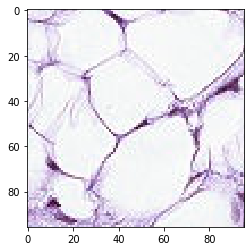

label= 0


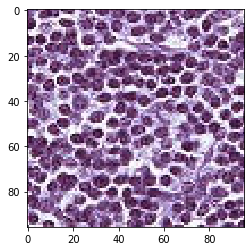

label= 0


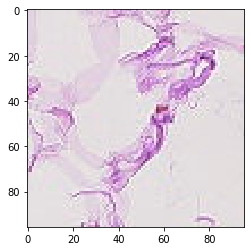

label= 0


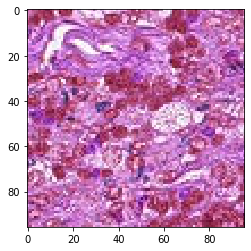

label= 1


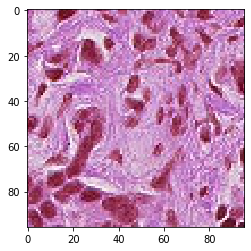

In [34]:
import random
for i in range(5):
    j=random.randint(100,2500)
    print('label=',y[j])
    plt.imshow(X[j])
    plt.show()

In [35]:
#count positive and negative samples
label1=(y==1).sum()
label0=(y==0).sum()

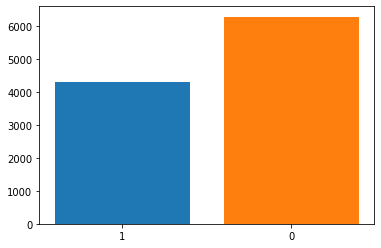

In [36]:
plt.bar('1',label1)
plt.bar('0',label0)
plt.show()

In [37]:
#split data into train and test 
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [39]:
#define the model
model = Sequential()

model.add(Conv2D(16,kernel_size=3,activation='relu',input_shape=(96,96,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))

model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))

model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
#clean garbage
positives_samples = None
negative_samples = None
gc.collect()

13277

In [41]:
model.compile(optimizer=keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
#to save the best performing model 
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_accuracy',mode='max', save_best_only=True,verbose=1)
#to stop traing if accuracy stagnates
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
#to change learning rate when accuracy does stagnate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001,verbose=1,)
#fit model with these conditions 
history=model.fit(xtrain,ytrain,validation_split=0.1, epochs=40 , batch_size=50,verbose=0, callbacks=[es,reduce_lr,checkpoint])



Epoch 00001: val_accuracy improved from -inf to 0.69976, saving model to weights.hdf5

Epoch 00002: val_accuracy improved from 0.69976 to 0.72104, saving model to weights.hdf5

Epoch 00003: val_accuracy did not improve from 0.72104

Epoch 00004: val_accuracy improved from 0.72104 to 0.78842, saving model to weights.hdf5

Epoch 00005: val_accuracy did not improve from 0.78842

Epoch 00006: val_accuracy improved from 0.78842 to 0.79551, saving model to weights.hdf5

Epoch 00007: val_accuracy did not improve from 0.79551

Epoch 00008: val_accuracy did not improve from 0.79551

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00009: val_accuracy improved from 0.79551 to 0.82861, saving model to weights.hdf5

Epoch 00010: val_accuracy did not improve from 0.82861

Epoch 00011: val_accuracy did not improve from 0.82861

Epoch 00012: val_accuracy did not improve from 0.82861

Epoch 00013: val_accuracy did not improve from 0.82861

Epoch 00014: val_accura

In [43]:
#evaluate model on test data
from keras.models import load_model
modelfinal = load_model('weights.hdf5')
modelfinal.evaluate(xtest, ytest)

2113/2113 [==============================] - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 58s - ETA: 56 - ETA: 54 - ETA: 52 - ETA: 51 - ETA: 49 - ETA: 48 - ETA: 47 - ETA: 45 - ETA: 45 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 31 - ETA: 30 - ETA: 29 - ETA: 28 - ETA: 27 - ETA: 26 - ETA: 26 - ETA: 25 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 57s 27ms/step


[0.3384523726700044, 0.8518694043159485]

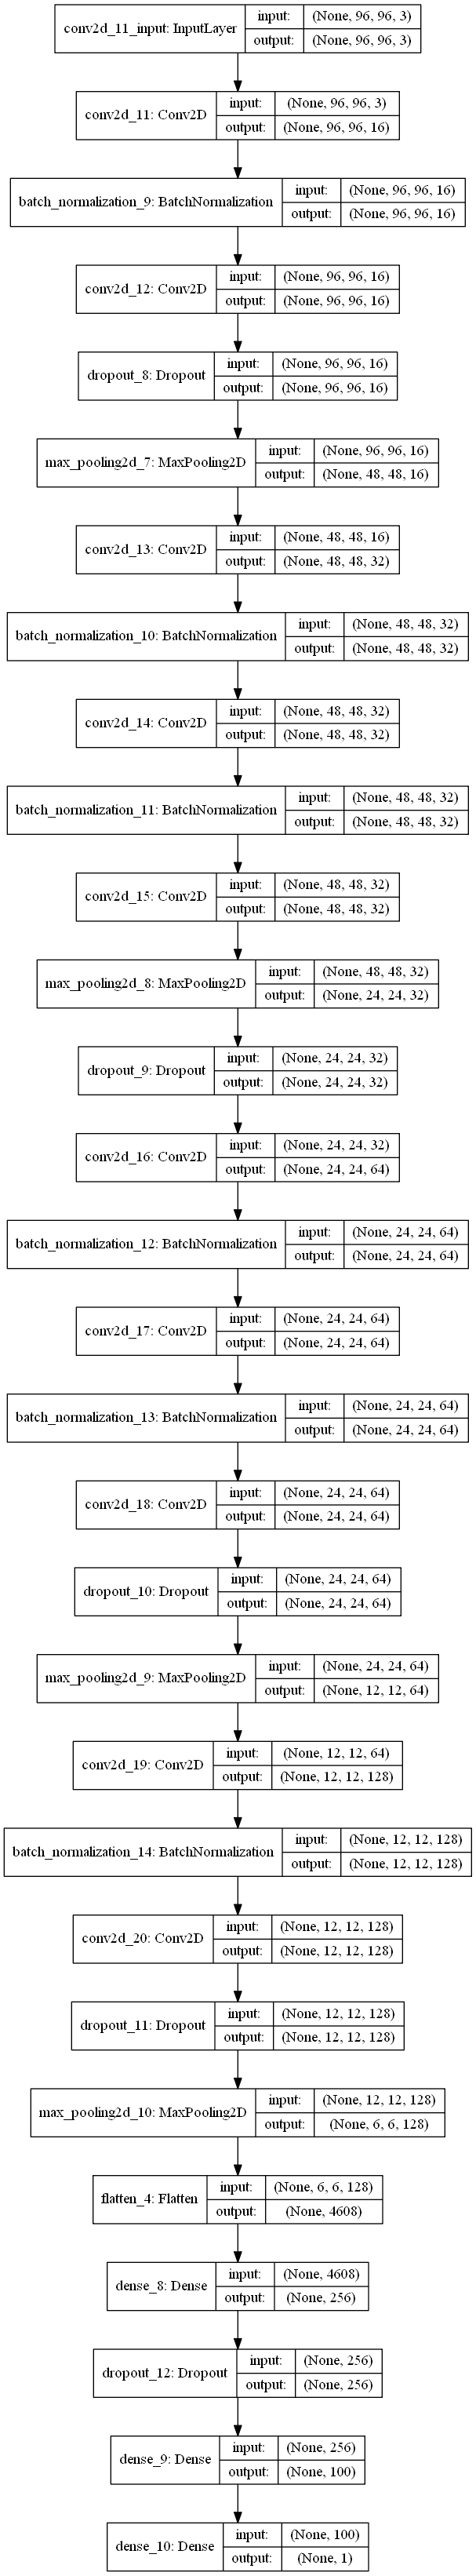

In [44]:
from keras.utils.vis_utils import plot_model
plot_model(modelfinal, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

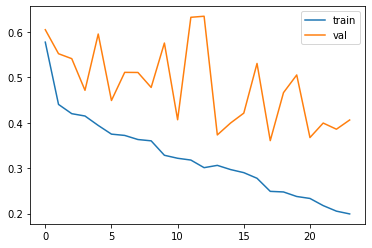

In [45]:
#plot loss curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

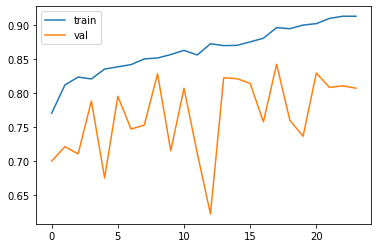

In [46]:
#plot accuracy cirve
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

In [ ]:
#visualize kernels and convolutions
conv1 = modelfinal.layers[12]
weights1 = conv1.get_weights()
kernels1 = weights1[0]
kernels1.shape
kernel1_1 = kernels1[:, :,
0, 0]

In [ ]:
plt.imshow(kernel1_1)

In [ ]:
test_image = xtest[365, :, :, 0]
plt.imshow(test_image)

In [ ]:
from astropy.convolution import convolve
filtered_image = convolve(test_image, kernel1_1,normalize_kernel=False)
plt.imshow(filtered_image)